## Part 2: Audience Clustering (Optional)
 
A csv file of the same dataset is attached on this email so you can work locally. A notebook-style step-by-step analysis is preferred, but we are open to whatever tools or ways you want to present your analytical process, visuals, and findings with. Please attach your outputs in your reply.
 
What we want to see is how you would cluster our members based solely on the shows they watch (or don’t watch).
 
You are free to explore and choose the learning algorithm and hyperparameters including the number of clusters, selected/engineered features, etc. preferably with brief rationale/justification. Be mindful that there are dozens of different ways of doing this exercise without any clear answer to which is best and hardly any objective criteria of success. Instead of spending your precious weekend geeking out on this problem, demonstrate your ability in executing an end-to-end sprint of the analytics life-cycle.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np 
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

### Data ETL

In [2]:
# read file
df=pd.read_csv('tbl_plays.csv')

In [3]:
# check data 
df.tail()

,date,memberid,showname
214493,2021-04-24,OScgrT+28umQnBMcYVrDpA,Coronation Street
214494,2021-04-24,PjIZLkMFdM/2kPTECpyFmg,Coronation Street
214495,2021-04-24,4FBFqb0KFAJxmRMA1MdfFQ,Popstars
214496,2021-04-24,3fp7sgIc4FMb3CFmY3sSGA,Popstars
214497,2021-04-24,4FBFqb0KFAJxmRMA1MdfFQ,Popstars


In [4]:
# check columns
df.columns

Index(['date', 'memberid', 'showname'], dtype='object')

In [5]:
# check datatype
df.dtypes

date        object
memberid    object
showname    object
dtype: object

In [6]:
#change date
df['date']=pd.to_datetime(df['date'])

In [7]:
df2 = df.groupby('showname').nunique()

df2.head()

,date,memberid,showname
showname,,,
1 NEWS Special: Government Updates,3,9,1
1 NEWS Special: Prince Philip Obituary,4,25,1
1 NEWS Tonight,24,50,1
1 NEWS at Midday,26,65,1
1 NEWS at Six,30,561,1


In [8]:
# Summary of our features
df.describe()

,date,memberid,showname
count,214498,214498,214434
unique,30,8087,1092
top,2021-04-26 00:00:00,F7pQIqGEzl+JC22at3TX5Q,Bluey
freq,8278,1193,15555
first,2021-04-01 00:00:00,NaN,NaN
last,2021-04-30 00:00:00,NaN,NaN


Add day of the week to see the difference between weekday, weekend

In [9]:
#add day

df['weekday'] = df[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%a'), axis=1)

In [10]:
df.tail()

,date,memberid,showname,weekday
214493,2021-04-24,OScgrT+28umQnBMcYVrDpA,Coronation Street,Sat
214494,2021-04-24,PjIZLkMFdM/2kPTECpyFmg,Coronation Street,Sat
214495,2021-04-24,4FBFqb0KFAJxmRMA1MdfFQ,Popstars,Sat
214496,2021-04-24,3fp7sgIc4FMb3CFmY3sSGA,Popstars,Sat
214497,2021-04-24,4FBFqb0KFAJxmRMA1MdfFQ,Popstars,Sat


#### add column: total views per day/ total views for this show per day/ total views by member per day/ total view this show by member perday

In [11]:
df.groupby(['showname','date'])['memberid'].count()

showname                                date      
1 NEWS Special: Government Updates      2021-04-06    17
                                        2021-04-07     1
                                        2021-04-10     2
1 NEWS Special: Prince Philip Obituary  2021-04-10    15
                                        2021-04-11    12
                                                      ..
Éternité                                2021-04-03     2
                                        2021-04-04     1
                                        2021-04-18     3
                                        2021-04-21     1
                                        2021-04-30     2
Name: memberid, Length: 11661, dtype: int64

### Exploratory Data Analysis

In [12]:
df.groupby('date')['memberid'].count()
#change date
df['date']=pd.to_datetime(df['date'])

In [13]:
df3=pd.merge(df.groupby('date')['memberid'].count().to_frame('totalview').reset_index(),df.groupby('date')['memberid'].nunique().to_frame('totaluniqueview').reset_index(), on='date')
df3.head()

,date,totalview,totaluniqueview
0,2021-04-01,6476,1772
1,2021-04-02,7220,1743
2,2021-04-03,5818,1454
3,2021-04-04,6468,1507
4,2021-04-05,7777,1985


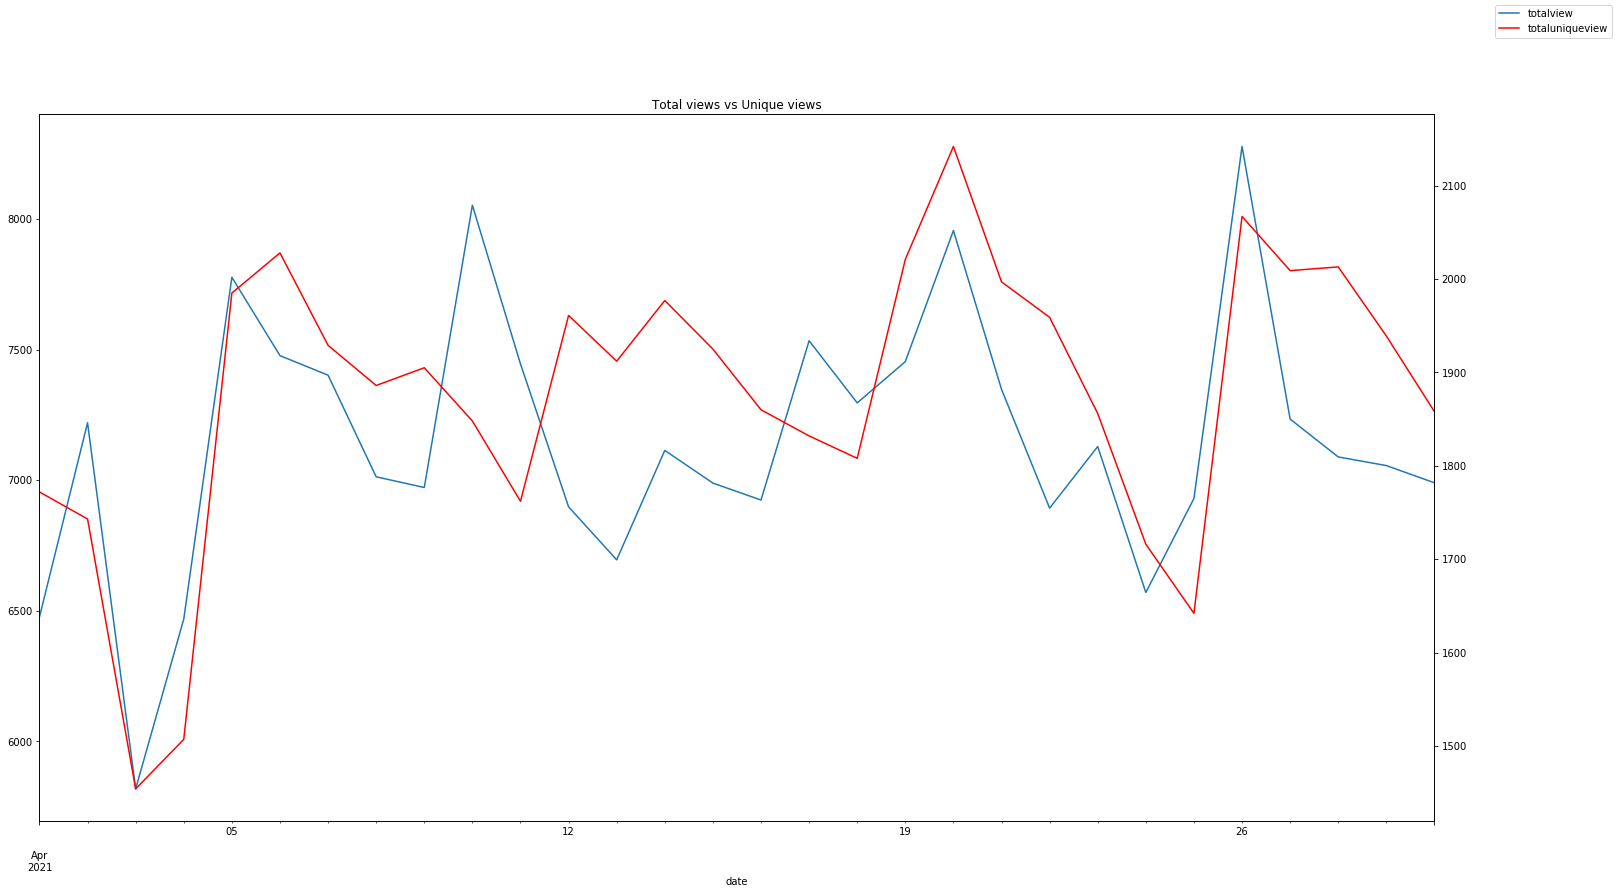

In [14]:
# plot 
ax = df3.plot(x="date", y="totalview", legend=False)
ax2 = ax.twinx()
df3.plot(x="date", y="totaluniqueview", ax=ax2, legend=False, color="r")
ax.figure.legend()
fig = plt.gcf()
plt.title('Total views vs Unique views')
fig.set_size_inches(25,13)
plt.show()




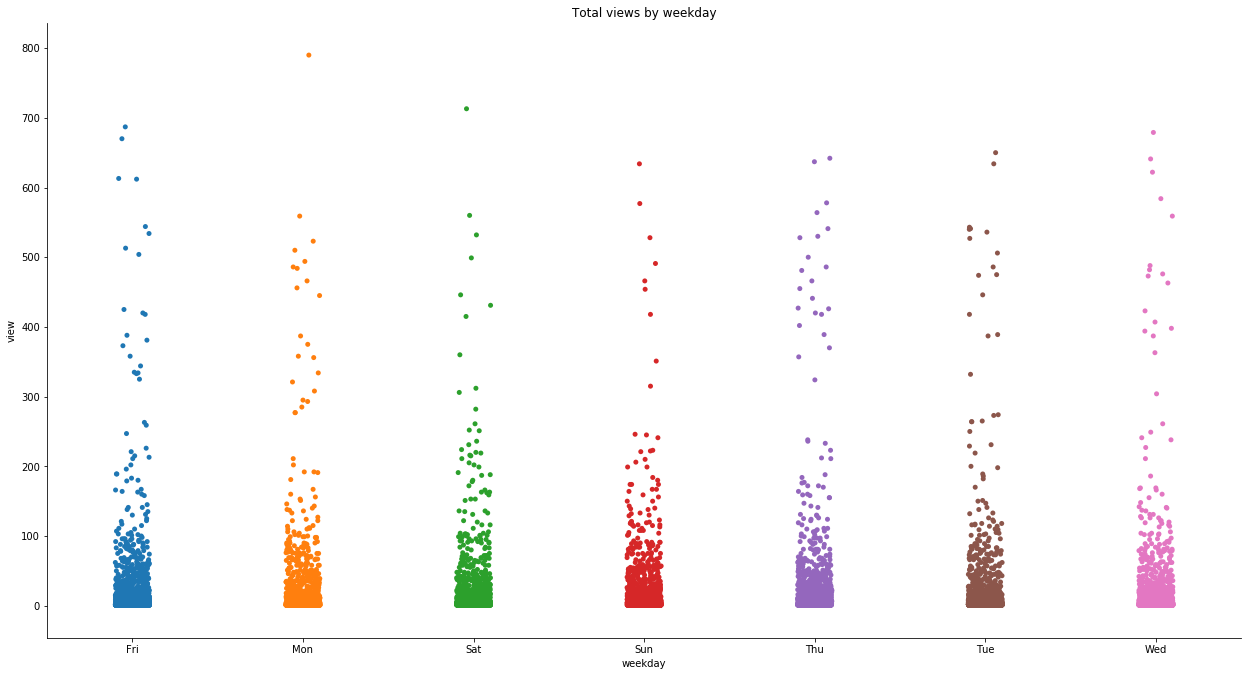

In [15]:
# get view per day

sns.catplot(x="weekday", y="view", data=df.groupby(['weekday','date','showname'])['memberid'].agg('count').to_frame('view').reset_index())
fig = plt.gcf()
plt.title('Total views by weekday')
fig.set_size_inches(20,10)
plt.show()


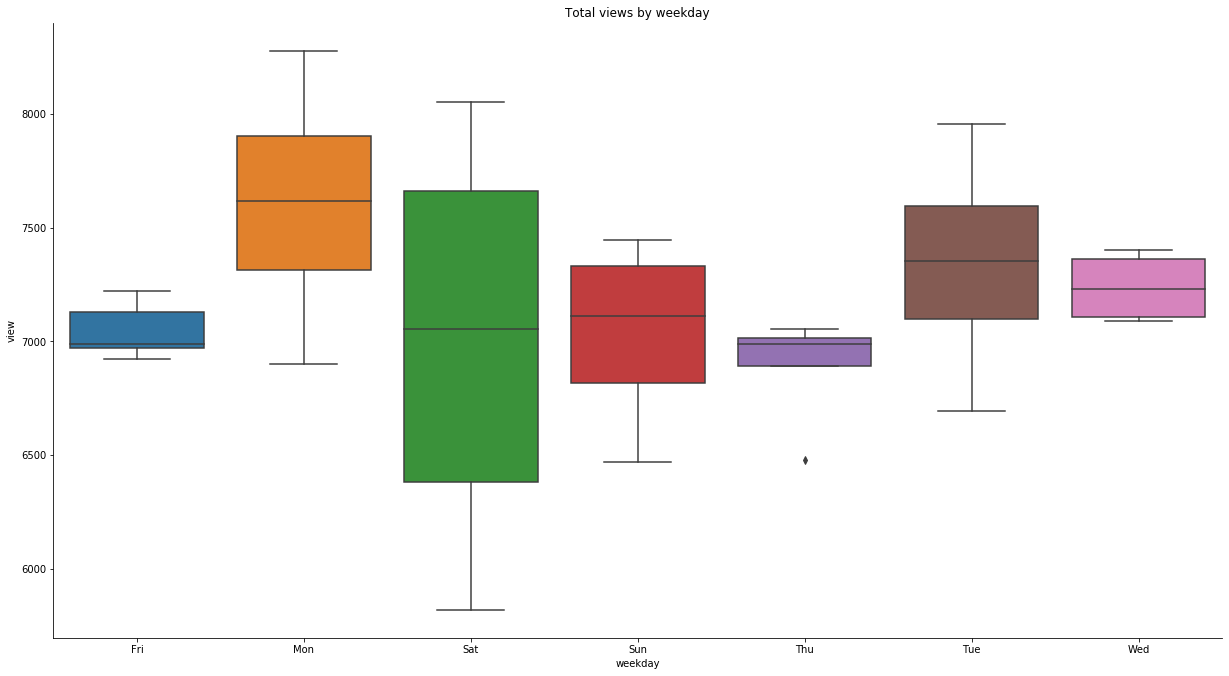

In [16]:
# get view per day

sns.catplot(x="weekday", y="view", kind="box", data=df.groupby(['weekday','date'])['memberid'].agg('count').to_frame('view').reset_index())
fig = plt.gcf()
plt.title('Total views by weekday')
fig.set_size_inches(20,10)
plt.show()



/Users/andy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


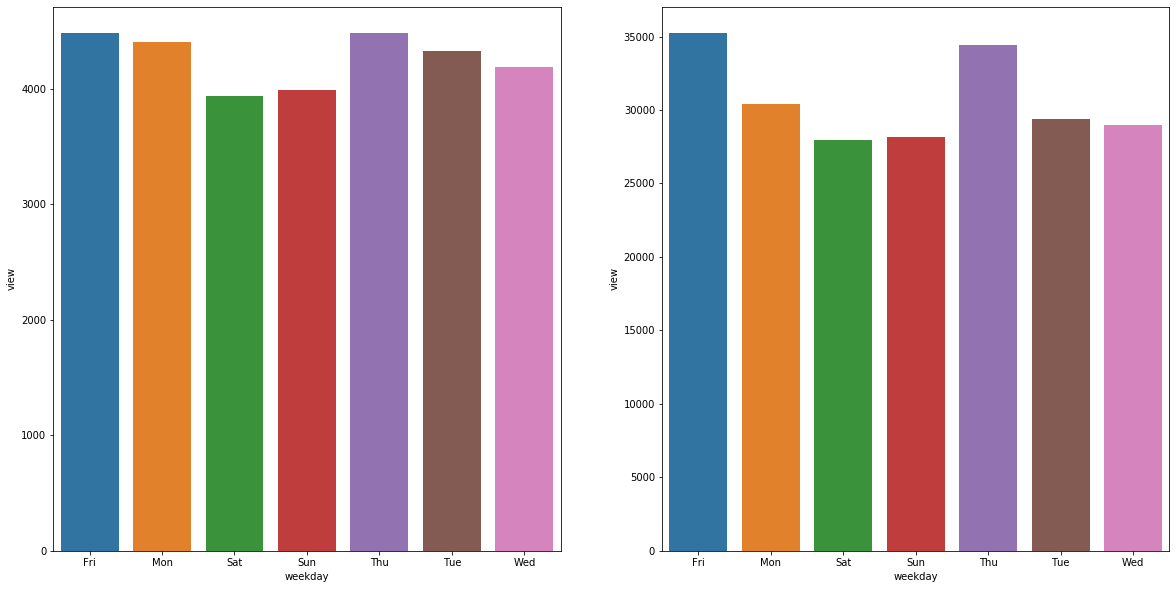

In [17]:
# unique view vs total views by Weekday
fig, ax =plt.subplots(1,2)
sns.barplot(x="weekday",y="view",  data=df.groupby('weekday')['memberid'].nunique().to_frame('view').reset_index(), ax=ax[0])
sns.barplot(x="weekday", y="view", data=df.groupby('weekday')['memberid'].agg('count').to_frame('view').reset_index(), ax=ax[1])
fig = plt.gcf()

fig.set_size_inches(20,10)
fig.show()

/Users/andy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


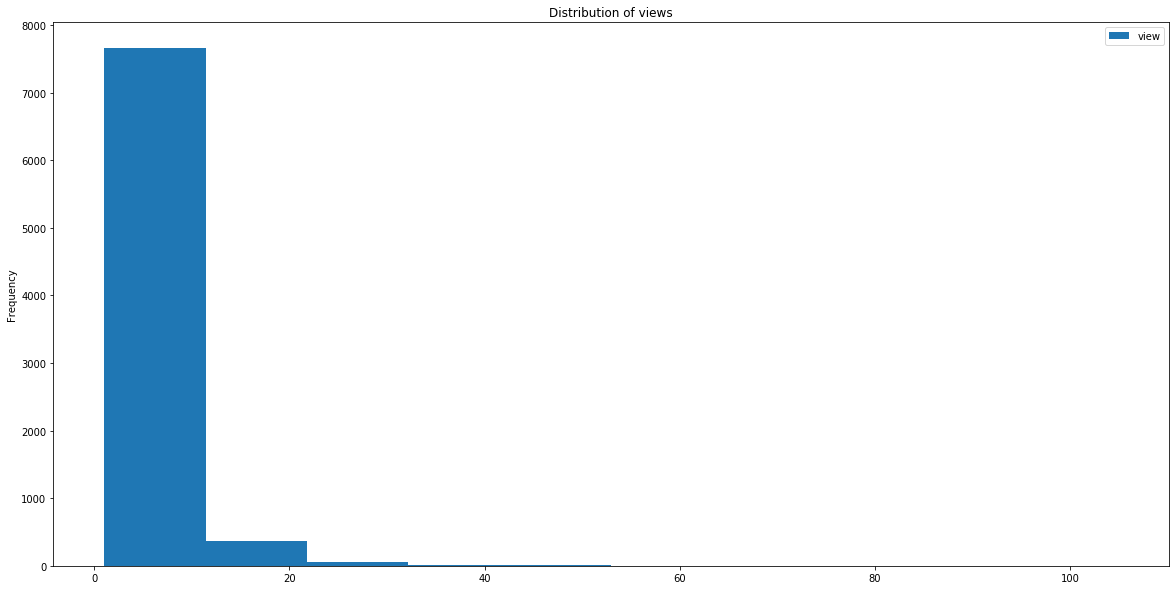

In [18]:
df.groupby('memberid')['showname'].nunique().to_frame('view').reset_index().plot.hist()
#show the plot
fig = plt.gcf()
plt.title('Distribution of views')
fig.set_size_inches(20,10)
fig.show()
plt.show()

# Features engineering

We will transpose Showname to column -> then calculate total view by unique user


In [19]:
df4=df.groupby(['memberid','showname'])['memberid'].agg('count').to_frame('view').reset_index()

In [20]:
# transpose all shows to columns
newdf = df4.pivot(index='memberid', columns='showname', values='view').reset_index()
#print to check
newdf.head()

showname,memberid,1 NEWS Special: Government Updates,1 NEWS Special: Prince Philip Obituary,1 NEWS Tonight,1 NEWS at Midday,1 NEWS at Six,1 News Tonight,1 News at Midday,1 News at Six,10 Years Younger in 10 Days,...,Young Sheldon,Your Home Made Perfect,Yours Faithfully,Yukon Gold,Zak Storm,Zama,Zoey's Extraordinary Playlist,Zoo Tales,[Rec]²,Éternité
0,+/n7iZA4iq/7UsShq3W+3A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,+/ovNvx8POrxYuY9mNOKXg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,+/rEjYCc4BS1xWpwb7s4JA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,+0BiLg5HEw/LgVSssR2OwA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,+1MBRUwioEoze6UY71NW3Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#replace NanN with 0
newdf=newdf.fillna(0)

In [22]:
newdf.head()

showname,memberid,1 NEWS Special: Government Updates,1 NEWS Special: Prince Philip Obituary,1 NEWS Tonight,1 NEWS at Midday,1 NEWS at Six,1 News Tonight,1 News at Midday,1 News at Six,10 Years Younger in 10 Days,...,Young Sheldon,Your Home Made Perfect,Yours Faithfully,Yukon Gold,Zak Storm,Zama,Zoey's Extraordinary Playlist,Zoo Tales,[Rec]²,Éternité
0,+/n7iZA4iq/7UsShq3W+3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,+/ovNvx8POrxYuY9mNOKXg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,+/rEjYCc4BS1xWpwb7s4JA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,+0BiLg5HEw/LgVSssR2OwA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,+1MBRUwioEoze6UY71NW3Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Sum columns
df2['total']=pd.DataFrame(newdf.drop(['memberid'], axis=1).sum(axis = 0, skipna = True) )

#sort
df2.sort_values(by=['total'], inplace=True,ascending=False)

In [24]:
#Top watched shows
df2['total'].head(20)


showname
Bluey                       15555.0
Shortland Street            13906.0
TVNZ 1 Live                 13416.0
Home and Away                9858.0
TVNZ 2 Live                  6974.0
Burden of Truth              4708.0
Desperate Housewives         3762.0
Coronation Street            3743.0
1 NEWS at Six                3486.0
Grey's Anatomy               3370.0
The Gloaming                 3128.0
The Bridge                   2846.0
Peppa Pig                    2802.0
Nikita                       2699.0
Unforgotten                  2427.0
Young Sheldon                2349.0
Queen Sugar                  2300.0
The Bachelor New Zealand     2220.0
The Casketeers               2219.0
TVNZ DUKE Live               2219.0
Name: total, dtype: float64

In [25]:
#Least watched shows
df2['total'].tail(20)

showname
The Doctor Will Kill You Now               1.0
How Not To Get Cancer                      1.0
Breathless                                 1.0
Denver the Last Dinosaur                   1.0
Dear Murderer                              1.0
Only the Dead                              1.0
Motoka                                     1.0
Freefall                                   1.0
Q + A                                      1.0
London: 2000 Years Of History              1.0
Anzac Day 2020 - Stories of Remembrance    1.0
Moving Out With Tamati                     1.0
Stand Up Aotearoa                          1.0
Stalked By a Reality Star                  1.0
As One                                     1.0
The Inertia                                1.0
The Koi Boys                               1.0
Crime and Punishment                       1.0
The Late Night Big Breakfast               1.0
Finding Prince Charming                    1.0
Name: total, dtype: float64

#### Get top 5 most common show per clients

In [26]:
num_top_show = 5

for hood in newdf['memberid']:
    print("----"+hood+"----")
    temp = newdf[newdf['memberid'] == hood].T.reset_index()
    temp.columns = ['show','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_show))
    print('\n')

----+/n7iZA4iq/7UsShq3W+3A----
                                          show  freq
0                                   Starstruck   7.0
1                     The Bachelor New Zealand   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----+/ovNvx8POrxYuY9mNOKXg----
                   show  freq
0  Desperate Housewives  32.0
1             Emmerdale  24.0
2     Coronation Street  16.0
3           Black Sails  11.0
4    The White Princess   9.0


----+/rEjYCc4BS1xWpwb7s4JA----
                       show  freq
0                  Popstars  11.0
1  The Bachelor New Zealand   4.0
2          A Perfect Planet   1.0
3               TVNZ 2 Live   1.0
4         Secret Nazi Bases   0.0


----+0BiLg5HEw/LgVSssR2OwA----
                                 show  freq
0                        The Gloaming   8.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Baile

                                 show  freq
0                         TVNZ 1 Live   3.0
1                         TVNZ 2 Live   2.0
2                           The Chase   1.0
3            The Bachelor New Zealand   1.0
4  1 NEWS Special: Government Updates   0.0


----+SOmWQUxvel1HUCKpOJf1A----
                                 show  freq
0                       Young Sheldon   2.0
1  1 NEWS Special: Government Updates   0.0
2                  Seeds of Yesterday   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----+SYc02OZkyrBskXxqlKEow----
                                 show  freq
0                        Line of Duty   1.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----+TISCVvqhAs3tTFQ5gT18g----
                          show  freq
0                  TVNZ 1 Live   1.0
1                  TVNZ 2 Live   1.

                          show  freq
0         Defending the Guilty   2.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----+xUEOh6cTi12Tp+mhNG9Mg----
                          show  freq
0                  TVNZ 1 Live   5.0
1                  TVNZ 2 Live   1.0
2            Secret Nazi Bases   0.0
3  Secret Diary of a Call Girl   0.0
4                       Scrubs   0.0


----+xXrXd7ibGxC9374XwAp+A----
                          show  freq
0                 Line of Duty   4.0
1                    The Savoy   3.0
2             Grand Designs UK   3.0
3  Nigella's Cook, Eat, Repeat   2.0
4                    The Split   1.0


----+xbtvQctNYHAqDasUeQHBA----
                                 show  freq
0                       Young Sheldon   9.0
1  1 NEWS Special: Government Updates   0.0
2                  Seeds of Yesterday   0.0
3                     Secret Scotland   0.0
4              

                                 show  freq
0                               Vegas   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----/QC0i4rxtKdFIgYzjtyTpw----
           show  freq
0        Luther  54.0
1    The Bridge  34.0
2   TVNZ 1 Live  13.0
3  Line of Duty  11.0
4    Taskmaster  10.0


----/RoKfDLkFce/wVITgw5T+w----
                                               show  freq
0                   8 Out Of 10 Cats Does Countdown   4.0
1                               Would I Lie To You?   4.0
2                                      Hypothetical   4.0
3               Lock, Stock and Two Smoking Barrels   2.0
4  Teenage Mutant Ninja Turtles: Out Of The Shadows   1.0


----/SIADB6K0NXbuX4XzBDsBQ----
                                          show  freq
0                        RuPaul's Drag Race UK   6.0
1                                     Éternité   2.

                                 show  freq
0                        The Gloaming   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----/jHTv1Ow5W2VAu7fv5yIgw----
                                 show  freq
0                         TVNZ 1 Live   5.0
1            Hyundai Country Calendar   2.0
2            The Bachelor New Zealand   1.0
3                         TVNZ 2 Live   1.0
4  1 NEWS Special: Government Updates   0.0


----/jmj/o7VWEnlhgXUoWu/1A----
                                          show  freq
0                               Patriot Brains   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----/jvIYc5tXz9eYBTPUf5DKg----
                show  freq
0        Unforgotten   9.0
1

                                               show  freq
0                                    Grey's Anatomy   6.0
1  Teenage Mutant Ninja Turtles: Out Of The Shadows   1.0
2                                      The Resident   1.0
3                                Seeds of Yesterday   0.0
4                                   Secret Scotland   0.0


----0+zvhuN+DZH9s8RZ9wziWw----
                                 show  freq
0            Hyundai Country Calendar   1.0
1              Drive Thru New Zealand   1.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4                     Secret Scotland   0.0


----0/42b4mFYs+o4lYveqKwig----
                                          show  freq
0                                        Bluey  17.0
1                     Clifford the Big Red Dog   5.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


--

                                          show  freq
0                                    Creamerie   2.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----0GaEiZB7Phhl8najumPP4A----
                       show  freq
0  The Bachelor New Zealand   5.0
1               TVNZ 1 Live   2.0
2              Booze Patrol   2.0
3            Scott & Bailey   0.0
4           Secret Scotland   0.0


----0HS91/yibeRTxtpLBgT5qg----
                                          show  freq
0                      Talking Tom and Friends   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----0HenCrC9O1+IVpRem+d13w----
                          show  freq
0                  TVNZ 

4        Neighbours   7.0


----0XgTPzRtDpghQqXhBIvYuA----
                                 show  freq
0                    Shortland Street   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----0XwyX6Sznhdchgi60iebGA----
                                 show  freq
0                        Line of Duty   6.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----0YHYfDgl4QwOqKytoCT+PQ----
                                          show  freq
0                                One Last Deal   1.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----0YZw5dv5hreWWr4//TFk5A-

                                 show  freq
0                         TVNZ 2 Live   3.0
1                            Popstars   2.0
2  1 NEWS Special: Government Updates   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----0nLSrMJSEXY/f34zSSwx9g----
                                 show  freq
0                       Home and Away   8.0
1                         TVNZ 2 Live   1.0
2  1 NEWS Special: Government Updates   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----0nQpNvPQxLwcN6iOfPoniw----
                                 show  freq
0                            Popstars   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----0pTlv0yngHwc5KGmUjyRzA----
                                     show  freq
0                               Creamerie  10.0
1            

4                   Secret Nazi Bases   0.0


----14eheyrmjRCTHot2ihsMBA----
                          show  freq
0                  TVNZ 1 Live   1.0
1    Shihad: Beautiful Machine   1.0
2               Science on Ice   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----1523/o2rWrrutqgilt/mVw----
                                 show  freq
0                    Shortland Street   4.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----152cujkCQfcFvw2LaE16NQ----
                                 show  freq
0                         TVNZ 1 Live  10.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----15HE/MG+9vqbEA1kptBvLQ----
                                          show  freq
0                    

                                          show  freq
0                             1 NEWS at Midday   5.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----1KuDlrWUw8soZlsB2LnFvA----
                                 show  freq
0                         TVNZ 1 Live   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----1Liws4xZZnQnZpJomXDqhg----
              show  freq
0  Burden of Truth  59.0
1       The Bridge  56.0
2    Home and Away  35.0
3      TVNZ 1 Live  15.0
4       Station 19   5.0


----1Luc7yxnyw3n2eB+K5vzww----
                                          show  freq
0                                    Creamerie   6.0
1           1 NEWS Special: Government Updates   0.0
2  Scratch

4         Secrets of the Driving Test   0.0


----1YPuHT+DisXkN3HziTgN5g----
                                 show  freq
0                         Moon and Me   8.0
1  1 NEWS Special: Government Updates   0.0
2                            Seinfeld   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----1ZPyjZ0Dcym3JdRxhpQEqQ----
                              show  freq
0  Have You Been Paying Attention?   1.0
1                    Scream Queens   0.0
2               Seeds of Yesterday   0.0
3      Secrets of the Driving Test   0.0
4                  Secret Scotland   0.0


----1biesvuUFJBT/qlso/uspw----
                                          show  freq
0                                     Legacies   4.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----1c922ZZZO23eD91MTuga0Q-

                                          show  freq
0                                Lap of Luxury   2.0
1                             Shortland Street   2.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----1vWIfncHq+6F9NAjtb7qOQ----
               show  freq
0     Home and Away  12.0
1  Shortland Street   8.0
2       TVNZ 2 Live   5.0
3  The Walking Dead   2.0
4    TVNZ DUKE Live   2.0


----1vfLSCsi8fjKJ2DUfP+7+A----
                      show  freq
0          Burden of Truth  36.0
1           Scott & Bailey  11.0
2           Grey's Anatomy   6.0
3               Station 19   6.0
4  Lady Chatterley's Lover   4.0


----1xBox9wnKjj1dluXbWqWwg----
                                   show  freq
0                Aqua Teen Hunger Force  42.0
1       Harvey Birdman, Attorney at Law  40.0
2           Paranormal Caught on Camera  14.0
3                     Bohemian Rhapsody   3.0

                                 show  freq
0                     The Repair Shop   2.0
1  1 NEWS Special: Government Updates   0.0
2                     Secret Scotland   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----2CcXdLIeW131dkYJgTRLNw----
                   show  freq
0           TVNZ 1 Live  45.0
1       Burden of Truth  43.0
2           Whitechapel  17.0
3           The Capture   6.0
4  Defending the Guilty   5.0


----2Cl54hiudqhfeRpegm1K+g----
                                                show  freq
0        The Unauthorised Beverly Hills, 90210 Story   2.0
1  The Diana Interview: The Truth Behind the Scandal   2.0
2                 1 NEWS Special: Government Updates   0.0
3        Scratched: Aotearoa's Lost Sporting Legends   0.0
4                                    Secret Scotland   0.0


----2E5iE9KUKOiTF/YcYS1jow----
                                 show  freq
0                           Educators   1.0
1  1 NEWS Speci

                     show  freq
0        Shortland Street  37.0
1        The Walking Dead   2.0
2    SPW WrestleFest 2020   0.0
3            Samurai Jack   0.0
4  Saudi Arabia Uncovered   0.0


----2MkjEH5tsUu/Wbu5rEVkcA----
                                 show  freq
0       Zoey's Extraordinary Playlist   5.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----2NEU0rap/zNd4sN3jsCocw----
                                          show  freq
0                             Shortland Street  11.0
1                              Motorway Patrol   6.0
2                                 Police Ten 7   1.0
3                                1 NEWS at Six   1.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----2Nl+9HkuX2bhPy4yfH1mYg----
                         show  freq
0                 Shipwrecked  18.0
1  The Amazing Race Australia   4.0
2            The Cr

            show  freq
0  Young Sheldon  18.0
1   LEGO Ninjago  16.0
2   Almost Never   3.0
3        Friends   1.0
4        Kung Fu   1.0


----2fVX3MmrhatltTZcBmnGxg----
              show  freq
0         The Nest  13.0
1       Taskmaster   4.0
2    Single Father   3.0
3   Scott & Bailey   0.0
4  Secret Scotland   0.0


----2g1x34hrsj18w6qmd0QjiA----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----2ghtmcuU3RW/UV+6j4Cg+w----
                                 show  freq
0                            Popstars   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----2hPgaYvAuBGbx93m7WGmuA----
                                 show  freq
0       

             show  freq
0          Scrubs  39.0
1       The Watch   8.0
2         Kung Fu   4.0
3  TVNZ DUKE Live   1.0
4     TVNZ 1 Live   1.0


----2xBvIhQf4oCHK/O7LgGgWw----
                                          show  freq
0                       Dog Squad Puppy School   7.0
1                                 Police Ten 7   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----2xlZ5WcG/2OVhpzUmdgPtA----
                        show  freq
0                      Vegas   6.0
1                     Coyote   6.0
2  Hunt for the Wilderpeople   2.0
3               Prodigal Son   2.0
4     Saudi Arabia Uncovered   0.0


----2yn/prZhb5O6gTK69Q8hfQ----
               show   freq
0             Bluey  107.0
1     Home and Away   26.0
2  Shortland Street   20.0
3       TVNZ 2 Live    8.0
4   Border Security    7.0


----2zALc9dXIguZvqD1SYSqHw----
                                 s

             show  freq
0     TVNZ 1 Live  59.0
1   1 NEWS at Six  27.0
2     TVNZ 2 Live  12.0
3  TVNZ DUKE Live   9.0
4     Seven Sharp   4.0


----3B9VnCzjWo4BllJTApEHmg----
                            show  freq
0                     Station 19  12.0
1               Shortland Street   2.0
2  Zoey's Extraordinary Playlist   2.0
3                          Vegas   1.0
4                 Scott & Bailey   0.0


----3BH21g8OngZTX/ADP6fmEg----
                                          show  freq
0                          In the Night Garden   2.0
1                               TVNZ DUKE Live   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----3BU/cnMCaBz7RQelxJbzwg----
                     show  freq
0             TVNZ 1 Live  18.0
1             TVNZ 2 Live   1.0
2                 42 to 1   1.0
3  Saudi Arabia Uncovered   0.0
4             Savage Wild   0.0


----3BU7Vhk

                                 show  freq
0     8 Out Of 10 Cats Does Countdown   6.0
1                 The Eric Andre Show   1.0
2  1 NEWS Special: Government Updates   0.0
3                            Seinfeld   0.0
4         Secrets of the Driving Test   0.0


----3TG1GWKe98LdI+RNjfOprw----
                show  freq
0       Wife Swap NZ   5.0
1      Home and Away   1.0
2   Shortland Street   1.0
3     Science on Ice   0.0
4  Secret Nazi Bases   0.0


----3TIwfS10OmFomC59zpS0vA----
                                          show  freq
0                                  TVNZ 1 Live   5.0
1                           Masha and the Bear   2.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----3W+3B+1T4oS5FOr/PZBn3Q----
                       show  freq
0  Hyundai Country Calendar   9.0
1                 Wentworth   5.0
2               TVNZ 2 Live   1.0
3               TVNZ 

4                            Secret Nazi Bases   0.0


----3p8n2aBOFwseabTo0VDd9g----
            show  freq
0   Prodigal Son  47.0
1     Station 19   8.0
2  Young Sheldon   7.0
3            Mom   6.0
4   The Resident   4.0


----3pinqPWssqgZsLGk9qP0JA----
                         show  freq
0  The Amazing Race Australia   8.0
1                 TVNZ 1 Live   6.0
2                 TVNZ 2 Live   2.0
3                Samurai Jack   0.0
4      Saudi Arabia Uncovered   0.0


----3pip0DnagQbteEGKvogkhw----
                            show   freq
0                Burden of Truth  116.0
1                    Unforgotten   11.0
2  Eat Well For Less New Zealand    2.0
3               Call The Midwife    1.0
4                  Scream Queens    0.0


----3qKVptNM/Sm2bWjTPzB83Q----
                                          show  freq
0                                1 NEWS at Six  17.0
1                  The Fresh Prince of Bel-Air   1.0
2                                1 News at Six   1.0
3  Scratc

               show  freq
0     Home and Away   3.0
1  Shortland Street   2.0
2     1 NEWS at Six   1.0
3    Scott & Bailey   0.0
4   Secret Scotland   0.0


----43m+2IuSacXzlxLBXCBCoQ----
                                 show  freq
0                          Taskmaster   6.0
1     Hamish & Andy's Perfect Holiday   1.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4         Secrets of the Driving Test   0.0


----44ChuG/OiJe4lETm2Eqk9Q----
                                 show  freq
0                     Superman & Lois   3.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----44U4JWFws9QkiW48EowtTA----
                                 show  freq
0                    Wild Kai Legends   3.0
1                NZ Hunter Adventures   2.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0

              show  freq
0      Queen Sugar  11.0
1  Border Security   8.0
2      TVNZ 2 Live   6.0
3        Creamerie   6.0
4     All American   5.0


----4FBFqb0KFAJxmRMA1MdfFQ----
                                 show  freq
0                            Popstars   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----4FHpVvQmQ7+02KKHyEN9CQ----
                                          show  freq
0                                      Friends   4.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----4HQ4rDJdw6wBh86Qg6yrgw----
                                          show  freq
0                                   Taskmaster  32.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2         

                                 show  freq
0                    Shortland Street  19.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----4X1VSVAzAmxVQWERnHgJGA----
                                          show  freq
0                                     Seinfeld  17.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----4XYxzo1+EsM8a8PeMjO9oQ----
                      show  freq
0                    Vegas   2.0
1              Unforgotten   2.0
2                    Press   2.0
3  Lady Chatterley's Lover   1.0
4           Scott & Bailey   0.0


----4YB2uOMHqE43zFMhMyYYgw----
                                 show  freq
0                    Shortland Street  21.0
1                         TVNZ 2 

                          show  freq
0                  TVNZ 2 Live   3.0
1                  TVNZ 1 Live   1.0
2            Secret Nazi Bases   0.0
3  Secret Diary of a Call Girl   0.0
4                       Scrubs   0.0


----4mr9OOVr9MEphsD43wfwAQ----
                                 show  freq
0                      The Casketeers   4.0
1  1 NEWS Special: Government Updates   0.0
2                     Secret Scotland   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----4nDPiM9zCzlhWGB0gvAicA----
                     show  freq
0             TVNZ 1 Live  38.0
1       Project Blue Book   3.0
2            Samurai Jack   0.0
3  Saudi Arabia Uncovered   0.0
4             Savage Wild   0.0


----4nxfjRN3hxYqUDh7tyBWPA----
                                          show  freq
0                                Home and Away  44.0
1                    David Bowie: Finding Fame   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratche

                                 show  freq
0                   Coronation Street  14.0
1                      Patriot Brains   1.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4                     Secret Scotland   0.0


----55FsFpwIBD67sSQjLsKIPA----
                                 show  freq
0                            Hardball  22.0
1                     Superman & Lois  12.0
2                 Prank You Very Much   5.0
3                            The Cube   4.0
4  Bradley Walsh: Happy 60th Birthday   1.0


----55TJ9anxzR53u4E/cOKNKA----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----57Nxm1PVsGB0LXF5HJ3aeQ----
                          show  freq
0        RuPaul's Drag Race UK   5.0
1                   Family Guy   2.

                show  freq
0         Full House  35.0
1        TVNZ 2 Live   1.0
2  Dragon Ball Super   1.0
3     TVNZ DUKE Live   1.0
4  Secret Nazi Bases   0.0


----5f0484KUQ102KrcwWwh85w----
                                          show  freq
0                                   Taskmaster   1.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----5f3wdhL51ZsUrNxUTpfJSw----
                         show  freq
0  The Amazing Race Australia   6.0
1              Grey's Anatomy   5.0
2            My Māori Midwife   4.0
3            Call The Midwife   1.0
4               Scream Queens   0.0


----5fJzq0c0ydRN2dfJYBmW+A----
                                 show  freq
0                         TVNZ 1 Live   2.0
1                      Built To Shred   1.0
2              The Ultimate Accessory   1.0
3  1 NEWS Special: Government

                         show  freq
0  The Amazing Race Australia   3.0
1       RuPaul's Drag Race UK   1.0
2                    Popstars   1.0
3              Scott & Bailey   0.0
4           Secret Nazi Bases   0.0


----5qGuzUYmcgX6iTP0CS1mYQ----
           show  freq
0     Emmerdale  28.0
1   TVNZ 2 Live   8.0
2  The Gloaming   6.0
3         Vegas   3.0
4   TVNZ 1 Live   1.0


----5r3HTjscvfesDQnfzojS+A----
                    show  freq
0           The Gloaming  77.0
1       Shortland Street  36.0
2           Little Birds  10.0
3              Peppa Pig   9.0
4  Building the Ultimate   4.0


----5rENXNh9MVys3iQfV+/Ajw----
                          show  freq
0                           Us   6.0
1                         Life   6.0
2                  Unforgotten   1.0
3                       Coyote   1.0
4  The Secret of Crickley Hall   1.0


----5rMlJMz/BsEfFOagAKX/MQ----
                                          show  freq
0                                Home and Away  23.0
1     

                      show  freq
0           Grey's Anatomy  19.0
1           The Casketeers  17.0
2               Station 19  10.0
3  Why Do I Put On Weight?   2.0
4         My Māori Midwife   2.0


----60hCgMGroFbRdoPOrXz+cw----
                          show  freq
0                  TVNZ 1 Live   1.0
1                  TVNZ 2 Live   1.0
2            Secret Nazi Bases   0.0
3  Secret Diary of a Call Girl   0.0
4                       Scrubs   0.0


----61/hBkok7ptLi4eGyEKL5Q----
                                          show  freq
0                                 What Remains   3.0
1                    David Bowie: Finding Fame   1.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----6183wAfxfkBN7wFBnqWQ7g----
                   show  freq
0         Home and Away  27.0
1      Shortland Street  23.0
2          Hypothetical   5.0
3  Defending the Guilty   2.0
4           T

                                          show  freq
0                 Care Bears: Unlock the Magic  17.0
1                 The Adventures of Paddington   6.0
2                                        Bluey   2.0
3                     The Bachelor New Zealand   2.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----6GmLKVRDaWkKVleLm4fo/g----
              show  freq
0    Doctor Doctor  17.0
1  Burden of Truth  13.0
2       Station 19  11.0
3     The Gloaming   2.0
4     The Resident   2.0


----6H9pD1JssFOBCkw8w9lSIw----
                                 show  freq
0            The Bachelor New Zealand   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----6HkSLaz9f9Ch9ojm2oPiYA----
                 show  freq
0            The Fall  42.0
1        The Gloaming  23.0
2  The White Princess  14.0
3        Hotel Sacher   8.0
4           Creamerie   7.0



                                 show  freq
0                         TVNZ 1 Live   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----6oXm3tT339amt0viqdNzvw----
                              show  freq
0                  The White Queen  14.0
1             Defending the Guilty  10.0
2                       Starstruck  10.0
3               The White Princess   8.0
4  Have You Been Paying Attention?   7.0


----6pTx3cJuMybf4+2zqYJLPw----
                                    show  freq
0                             The Bridge   2.0
1  Amazing Hotels: Life Beyond the Lobby   2.0
2     1 NEWS Special: Government Updates   0.0
3                               Seinfeld   0.0
4            Secrets of the Driving Test   0.0


----6ptvs9Kknp3xNKtC3bCNuA----
             show  freq
0     Queen Sugar   9.0
1        Manifest   8.0
2  Grey's Anatomy   5.0
3    The Resi

                          show  freq
0                  TVNZ 1 Live   1.0
1                  TVNZ 2 Live   1.0
2            Secret Nazi Bases   0.0
3  Secret Diary of a Call Girl   0.0
4                       Scrubs   0.0


----6yJJrL+yoGsqBVlMjd0IyA----
                          show  freq
0                    Creamerie   7.0
1                        Vegas   3.0
2                Scream Queens   0.0
3           Seeds of Yesterday   0.0
4  Secrets of the Driving Test   0.0


----6yeOztBZTGqWYcsdljFgAA----
                 show  freq
0     The White Queen  16.0
1  The White Princess  12.0
2            Batwoman   3.0
3              Nikita   3.0
4             Love Me   2.0


----6zIKfYoA0ClsN7gK1/5lEg----
             show  freq
0     TVNZ 1 Live  37.0
1    Prodigal Son   4.0
2  TVNZ DUKE Live   4.0
3        Manifest   4.0
4  The Casketeers   4.0


----6zxdiAGP+GV3mWR93U9OAA----
                                          show  freq
0                                 The Gloaming  11.0
1     

                          show  freq
0                     Manifest  25.0
1                   Station 19   3.0
2  The Secret of Crickley Hall   2.0
3                  Killing Eve   2.0
4            Secret Nazi Bases   0.0


----7N6b7L21SVfxuxxadcCHPw----
                          show  freq
0                    Emmerdale  12.0
1               The Casketeers   3.0
2                     Seinfeld   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----7NDqEO+JliBvIOfNL++DXg----
                       show  freq
0                The Bridge  15.0
1                  The Fall   7.0
2  The Bachelor New Zealand   2.0
3                     Vegas   1.0
4              The Gloaming   1.0


----7NvA9zspEYci30Znli9uzw----
                   show  freq
0              The Fall   8.0
1   Gardening with Soul   2.0
2  MasterChef Australia   1.0
3              Popstars   1.0
4     Jamie Cooks Italy   1.0


----7OELK0HILUofbx+zHHFm0Q----
                                        

                       show  freq
0             1 NEWS at Six   4.0
1  The Bachelor New Zealand   2.0
2                   Fair Go   2.0
3               TVNZ 1 Live   2.0
4             1 News at Six   1.0


----7fHjOo4ijiv4DeDTtF2Qeg----
                                 show  freq
0                Desperate Housewives  57.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----7hpjFvO8Cxx6BoK4Q/6oXQ----
                          show  freq
0   The Amazing Race Australia   6.0
1            Heartbreak Island   1.0
2                Scream Queens   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----7huQgR+dTWftMfYsBYXtog----
                          show  freq
0                    The Watch   2.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call 

4         Secrets of the Driving Test   0.0


----7w2XLTvM+ywAg5GYoLCU5A----
                                  show  freq
0                         All American   3.0
1                     Shortland Street   2.0
2                                Vegas   1.0
3  Lock, Stock and Two Smoking Barrels   1.0
4                          TVNZ 2 Live   1.0


----7wFyz2WVGC8AndRn+COhAA----
                                  show  freq
0                      Burden of Truth  62.0
1                       Jonathan Creek  12.0
2                                Press  11.0
3                 Defending the Guilty   9.0
4  Bradley Walsh and Son: Breaking Dad   2.0


----7wT039Jvefrbl0AcBtxrDA----
                                 show  freq
0                              Sunday   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----7xJJ9n+SAVbBX4iX4UxtPQ----
                show

4  Secret Diary of a Call Girl   0.0


----8DBXsK1wAVQZc7uOqEU8Jw----
                                          show  freq
0                                   The Bridge   2.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----8F0TNK9XPP0hgTcx3KpZbw----
                                 show  freq
0                              Nikita  34.0
1                             Kung Fu   3.0
2                          The Bridge   1.0
3                            Banished   1.0
4  1 NEWS Special: Government Updates   0.0


----8FqlA4j/UisSNW9znY9hXg----
                                          show  freq
0                                Home and Away   1.0
1                             Shortland Street   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                

4     It's a Sin   9.0


----8VdU4th40vn/5SQhp/CZkQ----
                        show  freq
0                Queen Sugar   6.0
1                 Station 19   4.0
2             Grey's Anatomy   3.0
3  David Bowie: Finding Fame   2.0
4             Science on Ice   0.0


----8VyID45xfwl39pJR1em04A----
                                 show  freq
0                               Vegas   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----8WIltXfgCZ2T8eBiMs7/Rg----
                                 show  freq
0                   Coronation Street  14.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----8WY77qrLXmuhKAYHfXxieg----
                          show  freq
0                  TVNZ 1 Live   2.0
1                  TVNZ 2 Live   

                                          show  freq
0                                1 NEWS at Six   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----8vEzCfAl0Dfn/yGxRBxJSA----
                                     show  freq
0                Robot Chicken: Star Wars   4.0
1                          Patriot Brains   1.0
2                           1 NEWS at Six   1.0
3  The Life and Trials of Oscar Pistorius   1.0
4      1 NEWS Special: Government Updates   0.0


----8vhAGH3AHu9oEPQMkzGLrQ----
                                 show  freq
0                       1 NEWS at Six   1.0
1                         TVNZ 1 Live   1.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                     Secret Scotland   0.0


----8x4drUv3B5OhUlsJPTmfQQ----
                         show  

                                          show  freq
0                                     Legacies   2.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----98zLK3l+7XJBJ00L8TSHBg----
                          show  freq
0               Schitt's Creek  28.0
1                  Unforgotten   8.0
2               Science on Ice   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----99rBi3RAPFuXp4UnptxB0A----
                                 show  freq
0                               Vegas   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----9AHXgPXS2v4eORFw4PkSUQ----
                     show  freq
0            LEGO Ninjago  30.0
1         LEGO Monkie Kid  30.0
2

                              show  freq
0                    Home and Away  32.0
1                 Shortland Street  32.0
2  Have You Been Paying Attention?   1.0
3               American Housewife   1.0
4                    Scream Queens   0.0


----9Y4VmZ0NbK/qUX2niipyVw----
                       show  freq
0        The White Princess  10.0
1  The Bachelor New Zealand   9.0
2                 Love Life   8.0
3            Scott & Bailey   5.0
4                Taskmaster   4.0


----9YTAVOdl47HCv2y+On1qHg----
                        show  freq
0                TVNZ 1 Live   5.0
1  David Bowie: Finding Fame   1.0
2                     Sunday   1.0
3               The Gloaming   1.0
4            Secret Scotland   0.0


----9Z95/vS0GXzbMXQLH7GElQ----
                show  freq
0   Shortland Street   4.0
1              Vegas   2.0
2     The Casketeers   2.0
3    Secret Scotland   0.0
4  Secret Nazi Bases   0.0


----9b/stKfz1bReEKdTICamXg----
                                          show

4                     Secret Scotland   0.0


----9rXTFmNfxlKNKP6sPOOnsg----
                                          show  freq
0                                 The Resident  19.0
1                                 Born To Kill   6.0
2                  The Secret of Crickley Hall   4.0
3           1 NEWS Special: Government Updates   0.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----9rZa69IE/VbZshDt4FUMLA----
                                 show  freq
0                     Superman & Lois   5.0
1                           Creamerie   2.0
2                           The Watch   1.0
3                        Ring of Fire   1.0
4  1 NEWS Special: Government Updates   0.0


----9tmQ9+eid40UC1zY9vMYhg----
                 show  freq
0        The Gloaming  52.0
1      Grey's Anatomy  28.0
2  The White Princess   9.0
3    The Walking Dead   2.0
4          The Bridge   1.0


----9uB47x06qGPY2dU4w9LMtQ----
                                            show  freq
0                  

                                 show  freq
0                    Shortland Street   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----A2tlEj2rfTESw/6qVFC23Q----
                                          show  freq
0                                    Creamerie   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----A3eTBZAgw8TngXoX5v6WEw----
                          show  freq
0             The Walking Dead   1.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----A3r0Z3j0OgNwXeYz5VvryQ----
                                          show  freq
0                        Wellington Paranorm

                                 show  freq
0            The Bachelor New Zealand   7.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----AF4TMQX6gFQeBaCuoJmNiA----
                                          show  freq
0                                   Station 19   2.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----AFjUZee++oC6FX0e2Supkw----
            show  freq
0  Young Sheldon  28.0
1    TVNZ 1 Live  18.0
2       Primeval  10.0
3       Legacies   7.0
4      Creamerie   7.0


----AGM8sHXDPv3SInVjGL8qrw----
                                 show  freq
0                        Police Ten 7   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3    

4                              Secret Scotland   0.0


----AT4M3cEgR1vYdkcX7mx5Ww----
                                 show  freq
0                       Home and Away  29.0
1            Waterfront House Masters   1.0
2               Wellington Paranormal   1.0
3  1 NEWS Special: Government Updates   0.0
4                       Scream Queens   0.0


----ATaGVsaWhpEvA4M9f55qPw----
               show  freq
0  Shortland Street  41.0
1       TVNZ 1 Live  11.0
2    TVNZ DUKE Live   5.0
3          Popstars   3.0
4       TVNZ 2 Live   2.0


----AUATlYXOz0kA6iWZYH7WIQ----
                                          show  freq
0                        Wellington Paranormal   3.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----AUfaa0W0Zvodj44b/l4whg----
                        show  freq
0           Shortland Street  19.0
1      

             show  freq
0   Home and Away  25.0
1      Station 19   7.0
2  Grey's Anatomy   5.0
3        Popstars   3.0
4           Vegas   2.0


----Ai/V0HI4eIa9QaQdCaukoQ----
                              show  freq
0                    Taskmaster NZ   9.0
1                      TVNZ 2 Live   6.0
2                   TVNZ DUKE Live   3.0
3                      TVNZ 1 Live   3.0
4  8 Out Of 10 Cats Does Countdown   1.0


----AiSodzDDznafmRXYQs7tHw----
                                          show  freq
0                         Q + A with Jack Tame   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----AiW4T5akhUPCwA4XAHTP3w----
                                 show  freq
0                    Shortland Street  16.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                

                            show  freq
0  Zoey's Extraordinary Playlist  21.0
1               The Walking Dead  11.0
2                     Full House  11.0
3                 Scott & Bailey   0.0
4                Secret Scotland   0.0


----AwMeHZsFH4c418yZIXJV7g----
                                 show  freq
0        The Bachelorette New Zealand  28.0
1                            Popstars   8.0
2                         TVNZ 2 Live   6.0
3                         TVNZ 1 Live   5.0
4  1 NEWS Special: Government Updates   0.0


----AwOBGpXu8Aj6HraFKBgQjw----
                 show  freq
0       Young Sheldon  25.0
1               Vegas   2.0
2  Seeds of Yesterday   0.0
3     Secret Scotland   0.0
4   Secret Nazi Bases   0.0


----Ay4/IPAuVUORJG6fkz5UNA----
              show  freq
0            Vegas   6.0
1         Ahikāroa   3.0
2      TVNZ 1 Live   1.0
3  The White Queen   1.0
4      Whale Rider   1.0


----AyGICSyjj3qlsZPdOfBlbw----
                       show  freq
0  The Bachelor Ne

                          show   freq
0                        Bluey  310.0
1                    Peppa Pig    1.0
2  Secrets of the Driving Test    0.0
3              Secret Scotland    0.0
4            Secret Nazi Bases    0.0


----BA+6ye0QKXemq8AHXaK5fw----
                     show  freq
0                   Bluey  57.0
1       Coronation Street  14.0
2  Your Home Made Perfect   2.0
3             TVNZ 1 Live   1.0
4             Savage Wild   0.0


----BBCYQObz15zwcioM90U/sA----
                          show  freq
0               A Deadly Union   1.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----BBN1IMjpKgieKcuAbaJLmQ----
                                          show  freq
0                                    Creamerie   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test 

               show  freq
0          Manifest  76.0
1     Home and Away  36.0
2       TVNZ 2 Live  12.0
3   Burden of Truth   8.0
4  Shortland Street   7.0


----BO/U2Hl9Gi1wFvHyE4h+pw----
                          show  freq
0                      Pokémon   1.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----BOetlunefDNLFAYpOu4TkA----
                                          show  freq
0                                     Legacies  26.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----BOj+U45PgzcFp2iQwv6F2A----
                                                show  freq
0                                   Grand Designs UK   6.0
1                                        TVNZ 1 Live   2.0
2  The Diana Interview: The 

                            show  freq
0               Shortland Street   9.0
1                          Vegas   2.0
2  Eat Well For Less New Zealand   2.0
3                    TVNZ 2 Live   2.0
4                       Popstars   1.0


----Bc5mjdQj7B1L6JCWn5Zrow----
                          show  freq
0                         Life   8.0
1                    Creamerie   8.0
2                Scream Queens   0.0
3           Seeds of Yesterday   0.0
4  Secrets of the Driving Test   0.0


----BcMfUQnTqSLxvT0wi9fhiA----
                          show  freq
0         NZ Hunter Adventures   6.0
1                  TVNZ 1 Live   1.0
2               Science on Ice   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----BcwkEmSpKTC2eduM3eq0jQ----
                                 show  freq
0                         TVNZ 2 Live   1.0
1                            Popstars   1.0
2  1 NEWS Special: Government Updates   0.0
3                   Secret Nazi Bases   0.0
4  

                   show  freq
0             Peppa Pig   7.0
1          Tumeke Space   6.0
2  The Barefoot Bandits   4.0
3    Masha and the Bear   4.0
4    Masha And The Bear   1.0


----BxOCH+lp95wIU3NOA3GcFA----
                            show  freq
0  Eat Well For Less New Zealand   2.0
1                  Scream Queens   0.0
2             Seeds of Yesterday   0.0
3    Secrets of the Driving Test   0.0
4                Secret Scotland   0.0


----ByBdulKlXMJWZl2TIl64mg----
                      show  freq
0               The Bridge  49.0
1            Only the Dead   1.0
2             The Gloaming   1.0
3             Living Dolls   1.0
4  A Surrogate's Nightmare   1.0


----ByfVp3HUbYsKwWA+ISAmKQ----
                          show  freq
0  The Secret of Crickley Hall   4.0
1                    Praise Be   3.0
2  Secrets of the Driving Test   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----C+rvdhd55wIUOYPwX8bo9A----
                          show  fr

                                          show  freq
0  Scratched: Aotearoa's Lost Sporting Legends  10.0
1                                    Creamerie   6.0
2                            Bohemian Rhapsody   2.0
3                                Scream Queens   0.0
4                  Secrets of the Driving Test   0.0


----CEJkzUwSwJWonj204MTAmQ----
                                 show  freq
0                       Young Sheldon   4.0
1  1 NEWS Special: Government Updates   0.0
2                  Seeds of Yesterday   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----CEP9oaDM0PcDoxJv3fULKA----
                                          show   freq
0                                  Queen Sugar  142.0
1                                   Neighbours   37.0
2                             Shortland Street    6.0
3  Scratched: Aotearoa's Lost Sporting Legends    0.0
4                              Secret Scotland    0.0


----CF6L+K6Q3RmJ6yNxZaXAzw

                                 show  freq
0                         TVNZ 1 Live   3.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----CWG3wW1PI6hAYBNkgoJFkA----
                          show  freq
0         Desperate Housewives  31.0
1                Home and Away  29.0
2                1 NEWS at Six   1.0
3                Scream Queens   0.0
4  Secrets of the Driving Test   0.0


----CWZOgqQleHt6ggUCK+6L9w----
                                          show  freq
0                                     Manifest   7.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----CWrEapQWQ2MUb/n+jm4llA----
                         show  freq
0  The Amazing Race Australia  14.0
1    The Bachelor New Zea

                                  show  freq
0                           Neighbours  12.0
1                           Mr Pickles   3.0
2                         Samurai Jack   1.0
3                          Shoplifters   1.0
4  Lock, Stock and Two Smoking Barrels   1.0


----ClwGYvqDlxK1z4SODVTUwQ----
                                 show   freq
0                Desperate Housewives  106.0
1                         TVNZ 2 Live    3.0
2                          Family Guy    1.0
3  1 NEWS Special: Government Updates    0.0
4                     Secret Scotland    0.0


----CmC9pAzmkOn0Iz9jDMwfdQ----
                     show  freq
0             TVNZ 1 Live   3.0
1          Grey's Anatomy   2.0
2            Samurai Jack   0.0
3  Saudi Arabia Uncovered   0.0
4             Savage Wild   0.0


----CmYHvnfWLthi0J7+uHczbw----
                                 show  freq
0                              Sunday   6.0
1                         Seven Sharp   1.0
2  1 NEWS Special: Government Updates

                       show  freq
0                  The Fall  28.0
1               Unforgotten  17.0
2                   The End  17.0
3            Scott & Bailey   8.0
4  The Bachelor New Zealand   4.0


----CzPkCAi2v+eiwBN3OkTd1g----
                show  freq
0      Taskmaster NZ   1.0
1         The Office   1.0
2     Scott & Bailey   0.0
3    Secret Scotland   0.0
4  Secret Nazi Bases   0.0


----CzsT+WJPvJzIntOajBZAbw----
                                 show  freq
0                    King in the Ring  14.0
1                          Family Guy   1.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4         Secrets of the Driving Test   0.0


----D++a3iJTxVbVJ2fMT28UlQ----
               show  freq
0         Peppa Pig  39.0
1  Shortland Street  24.0
2             Vegas  17.0
3          Hardball  12.0
4    The Casketeers  11.0


----D+Q6Nwi9l0AygY9XgkjQIg----
                                 show  freq
0                         Unforgotten 

                                          show  freq
0                                       Scrubs   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----DJ+g4n7m94xqDXpKPXDy1Q----
                                          show  freq
0                                        Bluey  92.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----DJGRZiUGdOyJDOkmqwU2MA----
                                 show  freq
0                         TVNZ 1 Live   5.0
1                                 Mom   4.0
2                 The Vicar of Dibley   2.0
3  1 NEWS Special: Government Updates   0.0
4                   Secret Nazi Bases   0.0


----DJiy2exxvyKaebBVevpThw----
 

                            show  freq
0         Rich House, Poor House   8.0
1                          Vegas   3.0
2          RuPaul's Drag Race UK   1.0
3  RuPaul's Drag Race Down Under   1.0
4              Impossible Builds   1.0


----DWMOyh1rE6kz+/4FMROk8A----
                 show  freq
0       The Dog House   6.0
1            Seinfeld   5.0
2       1 NEWS at Six   4.0
3  Inside Taronga Zoo   1.0
4       Scream Queens   0.0


----DWQYTdb82vsPD5mh+DBLWQ----
                                 show  freq
0                        Police Ten 7   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----DX5pE2K+lA16ERiHfzttvA----
               show  freq
0  Shortland Street  22.0
1               Mom  18.0
2          Popstars   8.0
3             Vegas   1.0
4    Scott & Bailey   0.0


----DXC2+Zyr52P4gYnWXH/chA----
                 show  freq
0         TVNZ 1 L

4                       Scrubs   0.0


----DpfIKpLDVt3jy6tHC/x5HQ----
                       show  freq
0               TVNZ 1 Live   9.0
1            Schitt's Creek   8.0
2  From Straight A's to XXX   2.0
3             1 NEWS at Six   2.0
4                 Community   1.0


----DpjzgyaNfa19n9FXfIuUww----
                                          show  freq
0                                  Seven Sharp   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----DpnODyskRXW9v4Lqzntdxw----
                                          show  freq
0                                   Station 19   5.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----DrInRKyMASFNMqvOo9

                                 show  freq
0            The Bachelor New Zealand   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----E2Dc1g3yBE/Ek1KYGLLTdQ----
                show  freq
0  Coronation Street  12.0
1   Shortland Street  11.0
2        Queen Sugar  10.0
3        TVNZ 1 Live   4.0
4        TVNZ 2 Live   3.0


----E2oZ16iBuFF2Kkrhj2BzpA----
                                 show  freq
0                               Press   2.0
1                           The Savoy   2.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                   Secret Nazi Bases   0.0


----E362ZowgAuzSCT7PCC6hdw----
                                     show  freq
0                       Coronation Street  17.0
1                      The White Princess   3.0
2  Interior Design Masters with Alan Carr   3.0
3                  

4                  Whale Rider   3.0


----EHN/Ma5sKCyDVt6wpq8o9g----
                                          show  freq
0                             Shortland Street  26.0
1                                    Creamerie   7.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                  Secrets of the Driving Test   0.0


----EI3mu/ZdeSyAwcIGZjCfpw----
                                 show  freq
0                       The Mentalist  79.0
1                          Station 19  10.0
2                        The Resident   4.0
3       Zoey's Extraordinary Playlist   2.0
4  1 NEWS Special: Government Updates   0.0


----EICENMV5MkrxjJN2HnHZ+Q----
             show  freq
0  Scott & Bailey  12.0
1         Kung Fu   5.0
2      Pennyworth   4.0
3    Prodigal Son   2.0
4          Coyote   2.0


----EIEYfD71kcC3v/7VQLwcdg----
                    show  freq
0            TVNZ 1 Live  37.0
1              Educators  11.0
2           

4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----EovpKEFsrK7iabg9yJB6vA----
                                 show  freq
0                    Shortland Street  11.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----EpSVapeyDMOs53JpyDwsQg----
                                 show  freq
0                   Coronation Street  18.0
1         The Secret of Crickley Hall   3.0
2  1 NEWS Special: Government Updates   0.0
3                            Seinfeld   0.0
4         Secrets of the Driving Test   0.0


----EpUQZnvlRjsNYXJWcGKCcA----
                                 show  freq
0                    Shortland Street  65.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----EpVnp3ePNv0TydSNHg+5XQ----
                       

                                          show  freq
0                               Grey's Anatomy   5.0
1          Bradley Walsh and Son: Breaking Dad   3.0
2                                1 NEWS at Six   1.0
3           1 NEWS Special: Government Updates   0.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----F2NNOmuCG/W1UXmBuOnApA----
                                 show  freq
0                      TVNZ DUKE Live  25.0
1                         TVNZ 2 Live  16.0
2                              Scrubs   3.0
3                    Grand Designs UK   2.0
4  Terminator 3: Rise of the Machines   2.0


----F3LZZ8ZQbQMpjkDZoWc2XQ----
                                 show  freq
0                    Shortland Street   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----F3tfsWl9lmsVylxqutgM1A----
                          show  freq
0                 

                          show  freq
0                 All American   3.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----FFQLw62uK+G/ValtbiY2FA----
                          show  freq
0               Grey's Anatomy   2.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----FFzBjaxCnRFBecu+hPjL2A----
                          show  freq
0            Betty and Coretta   1.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----FG3mIw29lbrGoXU2/Dyixw----
                show  freq
0      Home and Away  30.0
1          Emmerdale  25.0
2         Neighbours  24.0
3  Coronation Street  17.0
4        Broadchurch  15.0


----FH/RSjqIDMK93J5688OOlw----
                                        

4                   The Savoy   6.0


----FWI0NjP/BKdUm/y+ase/tg----
                                      show  freq
0                             Topp Country  13.0
1  The Secret Life of 4, 5 and 6 Year Olds   3.0
2                         Grand Designs UK   2.0
3       1 NEWS Special: Government Updates   0.0
4                            Scream Queens   0.0


----FWPDcsi7baj5X+tPeoJB/A----
                          show  freq
0             The Walking Dead   6.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----FWYrjWkVqhe3Lvc8DNMJ9Q----
                                 show  freq
0                    Shortland Street  19.0
1                   Coronation Street  17.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4         Secrets of the Driving Test   0.0


----FWsvLPCec9y0RmvHpz6LdQ----
                                 show  freq
0       

4              Secret Scotland   0.0


----FkholjmzVV0Nd8eToZILnQ----
                                 show  freq
0                    Chasing Monsters   8.0
1                    Grand Designs UK   3.0
2     8 Out Of 10 Cats Does Countdown   2.0
3  1 NEWS Special: Government Updates   0.0
4                       Scream Queens   0.0


----Fl/4244lurgyoo7z0fo5nw----
                                          show  freq
0                       Dog Squad Puppy School   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----Fm8Dkzs3MJk/I0jb7RriQA----
                                          show  freq
0                                 Tumeke Space   9.0
1                                   Ricky Zoom   2.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                

                          show  freq
0                Young Sheldon   5.0
1               Grey's Anatomy   4.0
2                     Seinfeld   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----FzScA8f0red7XgR5zuVQyg----
                           show  freq
0                    It's a Sin   5.0
1                  Line of Duty   3.0
2              Grand Designs UK   1.0
3  Anne Frank: Parallel Stories   1.0
4                Schitt's Creek   0.0


----Fzo/r2MU1hvat/hfVQBJzA----
                                          show  freq
0                                1 NEWS at Six   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----G+T1ZDdY7WhdmGMIXMgCNQ----
                                 show  freq
0                            Popstars   8.0
1  1 NEWS Special: Government Updates   0.0
2

                show  freq
0          Emmerdale  31.0
1              Bluey  24.0
2  Coronation Street  18.0
3         Full House  12.0
4    Superman & Lois  11.0


----GDRnkXl5auVZWEs9aTZgbA----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----GDf/zakKmV3smuDyaz4nCA----
                                 show  freq
0                          It's a Sin   4.0
1               The Dog and Pony Show   1.0
2                      Gangsta Granny   1.0
3  1 NEWS Special: Government Updates   0.0
4                     Secret Scotland   0.0


----GDknUWuAhLk7RChiGFgonw----
                                 show  freq
0                        The Gloaming   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotla

                          show  freq
0                     The Nest   6.0
1                Informer 3838   4.0
2  The Secret of Crickley Hall   3.0
3                 The Gloaming   2.0
4                        Press   2.0


----GT/SNVxoRXOilmqLLHR6vg----
                                 show  freq
0                           Cold Case   1.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----GTDyEgsejajjjOJ+OMXBqA----
               show  freq
0     Home and Away  33.0
1       TVNZ 2 Live  24.0
2  Shortland Street  12.0
3             Vegas   5.0
4    The Dead Lands   2.0


----GTJCvj8D/uQu4wNZ9xAi9Q----
                              show  freq
0                   Resident Alien  19.0
1  One Born Every Minute Australia   8.0
2                        Why Am I?   3.0
3                     Line of Duty   3.0
4                        Creamerie   3.0


----GTYsIKJ

                          show  freq
0                  TVNZ 1 Live  27.0
1                  TVNZ 2 Live   1.0
2            Secret Nazi Bases   0.0
3  Secret Diary of a Call Girl   0.0
4                       Scrubs   0.0


----Gi/yuJmQZoXBALF0ACjmYg----
                show  freq
0        TVNZ 1 Live   6.0
1          Creamerie   1.0
2     Scott & Bailey   0.0
3    Secret Scotland   0.0
4  Secret Nazi Bases   0.0


----GiRB/nsCU6aVeUCuMVay8Q----
                                  show  freq
0                     Call The Midwife   5.0
1        Eat Well For Less New Zealand   2.0
2                       The Blood Pact   1.0
3  Bradley Walsh and Son: Breaking Dad   1.0
4                        Scream Queens   0.0


----GifcvuheCK4i1zdksJpU0g----
        show  freq
0   Manifest  37.0
1   Batwoman  18.0
2  The Watch  13.0
3   Top Gear   5.0
4   Legacies   3.0


----Gj7VleV1dt9sJGeWKWhqlw----
                                 show  freq
0                    Shortland Street  25.0
1  1 NEWS Sp

4                            Secret Nazi Bases   0.0


----GwoEn2/DT05kdrsfQUyQVw----
                                              show  freq
0                                   TVNZ DUKE Live   5.0
1                                       Family Guy   3.0
2                           Saudi Arabia Uncovered   0.0
3                                      Savage Wild   0.0
4  Scarlet Woman: The True Story of Mary Magdalene   0.0


----Gx4MwDFizOgvLagl2yw+KQ----
                                          show  freq
0                                 Little Birds   2.0
1                                  TVNZ 1 Live   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----GxGTKQiCX+Xd32tIbZ1Fgg----
                            show  freq
0                     Taskmaster  12.0
1                The Repair Shop   3.0
2  Zoey's Extraordinary Playlist   2.0
3         Big Fat Gypsy Weddings

                                 show  freq
0                         Moon and Me  10.0
1  1 NEWS Special: Government Updates   0.0
2                            Seinfeld   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----H8wHCZfctwTzP/geU3R0Mw----
            show  freq
0         Coyote   4.0
1     The Victim   4.0
2  Doctor Doctor   4.0
3   Little Birds   2.0
4  1 NEWS at Six   1.0


----H8zyPgaf8KsWO3DtD+xLCA----
                         show  freq
0              The Casketeers   9.0
1  The Duke: In His Own Words   3.0
2            My Māori Midwife   2.0
3                       Simon   1.0
4     Talking Tom and Friends   1.0


----H9CArHIUy701etyT4vEYTA----
                                          show  freq
0                        Fishing and Adventure   2.0
1                             Wild Kai Legends   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                 

                          show  freq
0               TVNZ DUKE Live   4.0
1                  TVNZ 1 Live   1.0
2                  TVNZ 2 Live   1.0
3               Rural Delivery   0.0
4  Secret Diary of a Call Girl   0.0


----HOKRfG2Zl4oy6014X0/hhg----
                                 show  freq
0                         Unforgotten   8.0
1                       Doctor Doctor   3.0
2                        The Gloaming   2.0
3  1 NEWS Special: Government Updates   0.0
4                       Scream Queens   0.0


----HOMGW6E25joJFRRgpbDwcA----
                                          show  freq
0                   The Amazing Race Australia   9.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----HOgpejHKSqw+7r8Gnwbd+g----
                                 show  freq
0            The Bachelor New Zealand   1.0
1  1 NEWS

                show  freq
0          Creamerie   2.0
1        TVNZ 1 Live   1.0
2     Scott & Bailey   0.0
3    Secret Scotland   0.0
4  Secret Nazi Bases   0.0


----Hic1qU75YAYxPxAc3af7Pg----
                                 show  freq
0                    Shortland Street  25.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----HjLKrXTMX1uNA+stXWmHtw----
             show  freq
0   Home and Away  17.0
1  Grey's Anatomy   7.0
2      Station 19   4.0
3     TVNZ 1 Live   4.0
4     TVNZ 2 Live   2.0


----HjgNIDkwRxXeKkJ94W+19w----
                                          show  freq
0                                1 NEWS at Six   2.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----HkNnydV

                                 show  freq
0                          Neighbours  19.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----Hy0whDLuinyk0P0ANzcFiA----
                           show  freq
0      Hyundai Country Calendar   6.0
1            National Treasures   6.0
2  O Tātou Ngāhere - Our Forest   2.0
3                        Scrubs   0.0
4            Seeds of Yesterday   0.0


----HzAe3wq+EENjDCpsvQVH6w----
                                                show  freq
0                                      Home and Away   6.0
1                             Dog Squad Puppy School   1.0
2  The Diana Interview: The Truth Behind the Scandal   1.0
3                 1 NEWS Special: Government Updates   0.0
4        Scratched: Aotearoa's Lost Sporting Legends   0.0


----I+0knrJU/HHvFTlKi7ZR8Q----
             show  freq
0     TVNZ 2 Live   7.0
1  Resi

4                   Secret Nazi Bases   0.0


----IBncbDD0KtLhFZ+GIcYYqw----
                         show  freq
0             Burden of Truth  17.0
1                 Unforgotten   6.0
2  The Amazing Race Australia   2.0
3              Grey's Anatomy   1.0
4   David Bowie: Finding Fame   1.0


----ICEIznOEWiZlpu6/HtHa3g----
                                          show  freq
0                                  TVNZ 1 Live  25.0
1                                 Line of Duty  24.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----IDClnB3HsQFq7gGBO4/cyA----
                show  freq
0           Batwoman   1.0
1           Legacies   1.0
2     Scott & Bailey   0.0
3    Secret Scotland   0.0
4  Secret Nazi Bases   0.0


----IDDK9xGsvF0AL1BIYFECRg----
                                 show  freq
0            The Bachelor New Zealand   2.0
1                      The Casketeers   

4         Line of Duty   3.0


----IPAzSfZkK9hL/2bz03XUmA----
              show  freq
0            Bluey  29.0
1  Carter's W.A.R.  11.0
2   Rick and Morty   7.0
3    Young Sheldon   6.0
4           Mystic   4.0


----IPQu581zOorKh3uYUCheBQ----
                                 show  freq
0                        Line of Duty  19.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----IQ5JU9cn5upwPoIQPxsmvg----
                          show  freq
0                    The Watch  18.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----IR22CVOf53bZ7vmMmUCSQg----
                          show  freq
0                  TVNZ 1 Live   1.0
1                  TVNZ 2 Live   1.0
2            Secret Nazi Bases   0.0
3  Secret Diary of a Call Girl   0.0
4                 

                       show  freq
0                 Peppa Pig  73.0
1            Darwin & Newts  37.0
2                     Bluey  37.0
3  Clifford the Big Red Dog   8.0
4          Monchhichi Tribe   7.0


----IkelEoTaZZ5fjdOxRBwCTQ----
                                 show  freq
0                               Vegas   4.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----Im+C2P8iINRgDEKJlrli2A----
                                              show  freq
0                                    Lap of Luxury   2.0
1                                       On Surfari   2.0
2                             Defending the Guilty   1.0
3  Scarlet Woman: The True Story of Mary Magdalene   0.0
4                                   Schitt's Creek   0.0


----ImAIog9o4ITDRQD6KX3ThA----
                          show  freq
0               Grey's Anatomy  11.0
1             Cal

4           Secret Scotland   0.0


----J+USUPw81ckz9rH/dXCP2g----
                    show  freq
0         The Casketeers  10.0
1  Off the Grid with Pio   8.0
2                   Kura   6.0
3            The Walkers   4.0
4   Living with the Boss   3.0


----J/LCvCbE6FUASfQVZHxVKA----
                                          show  freq
0                                     Legacies  11.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----J0nkrr3Mn5CG2ls9FXC4RQ----
                                 show  freq
0            The Bachelor New Zealand   4.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----J1HiZ0jai3J9EDWrnHfVSw----
                                 show  freq
0                     

4            Samurai Jack   0.0


----JG0Ci9ZvqtceIvznQAxvQQ----
                                          show  freq
0                                     Hoarders   5.0
1                                     Popstars   2.0
2               George Clarke's Amazing Spaces   1.0
3           1 NEWS Special: Government Updates   0.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----JG1ctHp51Ey1zm+L5oh3JA----
                                          show  freq
0                             Shortland Street  35.0
1                            Dragon Ball Super   2.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----JGG15ncIEYHu8kG8pC20aQ----
                                                show  freq
0                                         It's a Sin  15.0
1                               Defending the Guilty   8.0
2                         Location Location Location   3

                                          show  freq
0                                     Manifest   5.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----JTh7BSvMTyKvVI7ZN0Um5Q----
                              show  freq
0                   Anzac Day 2021   3.0
1  Have You Been Paying Attention?   2.0
2                   Patriot Brains   2.0
3                       Starstruck   2.0
4             Q + A with Jack Tame   1.0


----JU1dj7KJTGcEjFHdWbAiRg----
               show  freq
0  Shortland Street  25.0
1     Doctor Doctor  16.0
2        Station 19   4.0
3           The End   4.0
4      The Resident   4.0


----JVXo/SRmSA1Ge4650H9vzw----
                                                show  freq
0                                          Cold Case   5.0
1                           Australian Crime Stories   2.0
2   

                                 show  freq
0                             Fair Go   2.0
1                             Renters   2.0
2       Eat Well For Less New Zealand   1.0
3  1 NEWS Special: Government Updates   0.0
4                       Scream Queens   0.0


----JlT7fVUxHOi+mYSjJWHy2Q----
                                 show  freq
0                   Coronation Street  22.0
1                      The Casketeers   6.0
2                        The Bachelor   4.0
3                           Dog Squad   1.0
4  1 NEWS Special: Government Updates   0.0


----JlwpxKAAwsbctD4cxGfU3w----
                                 show  freq
0                         TVNZ 1 Live  25.0
1                         Unforgotten  17.0
2                              Extras   6.0
3                           The Chase   4.0
4  1 NEWS Special: Government Updates   0.0


----JlxOlPxctjldHnhJUxtsjQ----
                                 show  freq
0                  National Treasures   1.0
1  1 NEWS Special: Go

                                          show  freq
0                                     Popstars   3.0
1                                     The Fall   2.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----K+piaRId7zxhdL85mtYi6g----
               show  freq
0  Shortland Street   7.0
1             Vegas   3.0
2             20/20   3.0
3       TVNZ 2 Live   2.0
4          Legacies   1.0


----K0xVJp5c0C29oPGCnLn5nQ----
                                 show  freq
0                  Sex Life of Plants   2.0
1             Lady Chatterley's Lover   1.0
2                                Zama   1.0
3                            Madame K   1.0
4  1 NEWS Special: Government Updates   0.0


----K1JZPHOrzR1tq8cwksCjqA----
                                 show  freq
0                               Vegas   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & 

                                 show  freq
0            The Bachelor New Zealand   4.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----KEIFobmkLmQVIqoSAic0WA----
                                 show  freq
0                               Vegas   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----KELy0a9zQ3QLr5EofHjLUw----
                                          show  freq
0                                   Starstruck   6.0
1                            We Are Who We Are   2.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                            Secret Nazi Bases   0.0


----KEjPw6k7Ly8AXak5mMTrMg----
                                               show  fr

                                          show  freq
0                                    The Savoy   2.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----KQicGXm5ahEQbTIl4HVhjg----
                                          show  freq
0                         NZ Hunter Adventures   6.0
1                     Hyundai Country Calendar   4.0
2                             Wild Kai Legends   2.0
3                                        Vegas   1.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----KTXCwAbVAd+QhaROPjbM7g----
             show  freq
0         Trapped  35.0
1    The Gloaming  23.0
2      Starstruck  10.0
3  Scott & Bailey   6.0
4    Line of Duty   6.0


----KTbUBV9x2sABz6zGbDtaGQ----
                          show  freq
0                        Vegas   1.0
1                Home and Away   1.0
2         

                     show  freq
0             TVNZ 1 Live   7.0
1          Grey's Anatomy   1.0
2            Samurai Jack   0.0
3  Saudi Arabia Uncovered   0.0
4             Savage Wild   0.0


----KiKyuClYXzl3J6KMtv6tTg----
                          show  freq
0               Grey's Anatomy   2.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----KinuieZXPWCoD34BFjdykg----
                                          show  freq
0                                1 NEWS at Six   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----KkUJLvlclI12ZoSJXN6ejg----
                          show  freq
0             The Walking Dead   2.0
1                   Family Guy   2.0
2                Scream Queens   0.0
3           Seeds of 

                show  freq
0     The Casketeers  29.0
1   Shortland Street  12.0
2           Popstars   4.0
3             Coyote   1.0
4  Coronation Street   1.0


----L+/8n4ljhu8t4SqVtFxPrA----
                                 show  freq
0                         TVNZ 1 Live   5.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----L/Mpih4LrNO1AyELXTB9IA----
                                 show  freq
0                    Shortland Street  33.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----L/e8ZrWqNPlrwB1r8BJ+WQ----
                          show  freq
0         Defending the Guilty   1.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scot

4                   Manifest   1.0


----LGU0i3v8PcxZrwcNQ6PNBg----
                                          show  freq
0                               Patriot Brains   4.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----LH7I7akmeLGh4hWYjEHd7w----
             show  freq
0     TVNZ 1 Live  91.0
1     TVNZ 2 Live  83.0
2  TVNZ DUKE Live  20.0
3     Unforgotten  18.0
4        Top Gear   5.0


----LHl2TJcS9oFfmRwje9DRfg----
                                          show  freq
0                          The Eric Andre Show   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----LHlslskFDPuFyGw3jklHeA----
                       show  freq
0               TVN

                                 show  freq
0                                 Boy   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----LPhIoI2k4DngRZvqObrNZA----
                                          show  freq
0                   The Amazing Race Australia   4.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----LQppCOhR7alNG9YyAtQsww----
                                 show  freq
0                             Kung Fu  11.0
1                     Superman & Lois   9.0
2                           The Watch   8.0
3  Terminator 3: Rise of the Machines   2.0
4                         TVNZ 2 Live   1.0


----LR1y5NPAuSh3Qd2ckYbOKw----
                                 show  freq
0          

4                       Code Fun    6.0


----LcPzoGD0DjJwarlRwwYttg----
                          show  freq
0                  TVNZ 2 Live   1.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----Lcn2tpwCvQcUyrMQj/Wlew----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----Ld56QaIJZZo7g06QRS+yXQ----
                                 show  freq
0                          Full House   2.0
1          The Duke: In His Own Words   1.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4         Secrets of the Driving Test   0.0


----LeIz5XEXqKcZqS6twAC43g----
                                 show  freq
0            Hyundai Country Calen

                         show  freq
0    The Bachelor New Zealand   4.0
1  The Amazing Race Australia   3.0
2              Scott & Bailey   0.0
3             Secret Scotland   0.0
4           Secret Nazi Bases   0.0


----LtKlttYMN+Be37G6mtdRVA----
                                          show  freq
0  Scratched: Aotearoa's Lost Sporting Legends   7.0
1                              One Lane Bridge   5.0
2                    David Bowie: Finding Fame   2.0
3                           Seeds of Yesterday   0.0
4                  Secrets of the Driving Test   0.0


----LtguWQeR4V72+1qQfnerlQ----
                                 show  freq
0                           Educators  43.0
1               Wellington Paranormal  25.0
2  1 NEWS Special: Government Updates   0.0
3                            Seinfeld   0.0
4         Secrets of the Driving Test   0.0


----Lu2VRGz2SHVH3UNLsSomjQ----
                                 show  freq
0                   Coronation Street  27.0
1              

4           Guilt   1.0


----M38p9w/YE8Sii+a3sUrgmg----
                show  freq
0              Bluey  56.0
1      Home and Away   8.0
2        TVNZ 1 Live   1.0
3   Shortland Street   0.0
4  Secret Nazi Bases   0.0


----M4QhV/d2Npi7xMgZag0ylw----
           show  freq
0   TVNZ 1 Live  14.0
1  Line of Duty   7.0
2        Coyote   3.0
3    Starstruck   2.0
4    The Bridge   2.0


----M4RZ3GYp84IUaFBJacqfRg----
                          show  freq
0                  TVNZ 1 Live   3.0
1                  TVNZ 2 Live   2.0
2            Secret Nazi Bases   0.0
3  Secret Diary of a Call Girl   0.0
4                       Scrubs   0.0


----M5f9AO9L83QCQRSo9kqvNw----
                            show  freq
0                  Home and Away  30.0
1                       Manifest   6.0
2                     Station 19   5.0
3               Shortland Street   5.0
4  Asia Unplated with Diana Chan   5.0


----M6OcRIpleBI/kUj/h+P83A----
              show  freq
0        The Savoy   4.0
1    Young 

                  show  freq
0            The Watch   5.0
1      Superman & Lois   5.0
2  Would I Lie To You?   2.0
3       Scott & Bailey   0.0
4    Secret Nazi Bases   0.0


----MJNvZ5C4zxaYmxvKzqe53g----
                                 show  freq
0                  The White Princess   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----MJdyVuK2rkPBMunhi+Odwg----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----MKHfomyZGGwNMZP8HuvNnw----
                          show  freq
0                  TVNZ 1 Live   8.0
1                  TVNZ 2 Live   1.0
2            Secret Nazi Bases   0.0
3  Secret Diary of a Call Girl   0.0
4             

                                  show  freq
0  Lock, Stock and Two Smoking Barrels   1.0
1   1 NEWS Special: Government Updates   0.0
2                        Scream Queens   0.0
3          Secrets of the Driving Test   0.0
4                      Secret Scotland   0.0


----MW+JERoUmyV5G8d04C7KtQ----
                                          show  freq
0                                    Creamerie   7.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----MWgOHHRjlRzNuEkjLE6U7Q----
                          show  freq
0                    The Watch   3.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----MWo/KT1Uft6yvw+FKHEj+w----
                    show  freq
0  RuPaul's Drag Race UK   7.0
1             Taskmaster   5.

               show   freq
0  The Venture Bros  144.0
1         The Watch   13.0
2       TVNZ 1 Live    4.0
3    Resident Alien    2.0
4        Family Guy    2.0


----MjhlPKFH0Ihjm8feNSsYzg----
                                          show  freq
0                                    Creamerie   7.0
1                               Grey's Anatomy   5.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----Mkvj8A17/vo/WcE9c/lrGA----
            show  freq
0    Suburgatory  13.0
1        Upright  11.0
2   All American   8.0
3  Young Sheldon   3.0
4      The Watch   2.0


----MlQp/MLJBlj8CtNVkg764g----
                                 show  freq
0                            Popstars   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----Mlu3UpSZy7wUP

4                       The Casketeers   2.0


----Mya8dqlmiLuqn8XoChntbA----
                                          show  freq
0                                 5 Gold Rings   2.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----Myn01nPu3tb/QEiHMshMHQ----
                  show  freq
0     Wild Kai Legends   4.0
1        Young Sheldon   3.0
2      Church of Trump   1.0
3  Chernobyl Reclaimed   1.0
4           Motherland   1.0


----MywNBvtp+rVdfRQhcZYrHQ----
             show  freq
0  Scott & Bailey  11.0
1         The End   4.0
2         Kung Fu   2.0
3   1 NEWS at Six   1.0
4   Scream Queens   0.0


----MzAmyectiDhvOMqYC7mpQg----
                           show  freq
0              Wild Kai Legends  30.0
1      Hyundai Country Calendar  11.0
2         Country House Hunters   7.0
3              Grand Designs UK   3

4                              Secret Scotland   0.0


----NEhyKMbeR9ALo6ZjyU7PjA----
                                 show  freq
0                    My Māori Midwife   5.0
1                      The Casketeers   2.0
2                               Marae   1.0
3  1 NEWS Special: Government Updates   0.0
4                     Secret Scotland   0.0


----NFQs7ZiPKNI9XiM5jOEaNQ----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----NH6NI/G3Ukh5WzBTub+duw----
                                       show  freq
0                               TVNZ 1 Live   5.0
1  The World's Most Scenic Railway Journeys   1.0
2        1 NEWS Special: Government Updates   0.0
3               Secret Diary of a Call Girl   0.0
4                                    Scrubs   0.0


----NHAnF9KNXPGvRY

4                   Secret Nazi Bases   0.0


----NVMs0SAObmMzkKya0cmj+w----
                                 show  freq
0                      Scott & Bailey  20.0
1                            The Fall  14.0
2                         Unforgotten   4.0
3                       The Last Post   1.0
4  1 NEWS Special: Government Updates   0.0


----NVo+X3dbtGjO+mEgpn6FqA----
                                 show  freq
0                         TVNZ 1 Live   7.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----NW+WoPGWxiQV1XyqPm+ZMQ----
                show  freq
0  Coronation Street  30.0
1               Back   7.0
2              Guilt   2.0
3       The Gloaming   1.0
4    Spies of Warsaw   1.0


----NX5EsqhMMgW83+iJa/wfaA----
                          show   freq
0                Young Sheldon  102.0
1                 The Eggplant    4.0
2  The Fresh Prince 

                          show  freq
0               Grey's Anatomy   1.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----Nm/4EnmkdOeZ1aBts3NksA----
                                          show  freq
0                                Home and Away  49.0
1                                   Station 19   6.0
2                Zoey's Extraordinary Playlist   5.0
3                               Grey's Anatomy   4.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----Nn9FrwSSSYnww0/YLpH6fw----
             show  freq
0        Seinfeld  58.0
1        The Fall  23.0
2         Trapped  13.0
3  Schitt's Creek  12.0
4   Single Father   4.0


----NnGxQ/ljUQpIZj5r53sz5g----
                         show  freq
0          National Treasures   2.0
1  The Duke: In His Own Words   1.0
2                       20/20   1.0
3                      Scrubs   0.0
4          Seeds of Yesterday   0.0



                                          show  freq
0                                   Starstruck   6.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----O16adXGbkDcvE1wkWsaWfw----
                                          show  freq
0                                Lap of Luxury  10.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----O1D1c/5GQsDJsIZ91gxcCg----
                                          show  freq
0                                   Full House   4.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Se

                          show  freq
0  The Secret of Crickley Hall   2.0
1                    The Watch   2.0
2                  TVNZ 1 Live   2.0
3    David Bowie: Finding Fame   1.0
4               Scott & Bailey   0.0


----OGXJ/23cHlcqS1D5G+swfw----
                                          show  freq
0                         NZ Hunter Adventures   8.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----OGcckeDmtg9dNuxFUrEynQ----
                                 show  freq
0            The Bachelor New Zealand   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----OGjgGIWlmqS5Ng92ad4DHA----
                                          show  freq
0                                   Station 

4                              Secret Scotland   0.0


----OTyiPrUgC1uD2a/5ANLcjA----
                show  freq
0        TVNZ 2 Live  11.0
1        TVNZ 1 Live   9.0
2  Bohemian Rhapsody   5.0
3           Manifest   4.0
4     TVNZ DUKE Live   3.0


----OUQinAa8ybKE+CxBFiA3fw----
                                          show  freq
0                                        Bluey   9.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----OUcBvvjMgOZUREmxBuZihw----
                                 show  freq
0                                 Boy   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----OV/iR/m1A8MY/ocOf6k4YQ----
             show  freq
0  Scott & Bailey  12.0
1    The Gloaming   9.0

4  David Bowie: Finding Fame   1.0


----Ogfgv9RbEudpcHQitXR8AA----
                                 show  freq
0                      The Dead Lands   6.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----Ogg+cMc3ehMCwY2iOykCpA----
                                               show  freq
0                                      Nanny Killer   3.0
1                                   Motorway Patrol   1.0
2                                   Mistress Hunter   1.0
3  Teenage Mutant Ninja Turtles: Out Of The Shadows   1.0
4                                     Scream Queens   0.0


----OhQsspWictgwWQFJi30IRQ----
                                 show  freq
0                         TVNZ 1 Live   3.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Ba

                                 show  freq
0            The Bachelor New Zealand   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----OvsH38hzKjUhXzSqX1Fklg----
                 show  freq
0               Claws  18.0
1    Baby Mama's Club   1.0
2  The Wiggles' World   1.0
3      In Dark Places   1.0
4              Scrubs   0.0


----OxKVYImLuTJiT0cC2efVig----
                                          show  freq
0                            Bohemian Rhapsody   1.0
1            Abducted: The Carlina White Story   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----OxMNZDwOA/GDEbnBUP2woQ----
                   show  freq
0  Defending the Guilty  15.0
1       The White Queen   9.0
2       The Repair Shop   9.0
3          The Gloaming   9.0
4

                                          show  freq
0                                  Pure Fly NZ   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----PAXOewtb8O83ZKjhXucsvQ----
                                          show  freq
0                                       Coyote   2.0
1                                   Pennyworth   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----PAraYFRCWiaWkilJ3D6CuA----
                                 show  freq
0                     Judge John Deed  13.0
1                         Whitechapel   2.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                   Secret Nazi Bases   0.0


----PBCeWKbLXJRZ7GswZtoEhw----
 

4           Secret Nazi Bases   0.0


----PPQbtK76OjEzQ8/UAt5VDw----
                                          show  freq
0                                 The Gloaming   5.0
1                            Coronation Street   2.0
2                                Home and Away   1.0
3           1 NEWS Special: Government Updates   0.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----PPXQZXE8zEYm0liiiPIyww----
                                          show  freq
0                                Home and Away  22.0
1                                 All American   4.0
2                     The Bachelor New Zealand   1.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                  Secrets of the Driving Test   0.0


----PR1ggXKiYy0PcquaUgR+fA----
                                          show  freq
0                                  TVNZ 1 Live   2.0
1                             Grand Designs UK   1.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                

4                      Coyote   2.0


----PbHMmSNuA7Yjbj6X7Y9p/Q----
                  show  freq
0           Paper Boys   4.0
1  Code 37: Sex Crimes   1.0
2        Love is Blind   1.0
3             Banished   1.0
4      The Repair Shop   1.0


----Pbzbj2Ug5Y2HSMENr4+qxA----
                                          show  freq
0                                       Scrubs  79.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----PcFtVOUo3TgTwDRu1ttlUA----
                   show  freq
0        Scott & Bailey  59.0
1  Desperate Housewives  29.0
2     Coronation Street  23.0
3           Unforgotten  16.0
4  Defending the Guilty   1.0


----PcR1P7QIP1idaYPrHNs+Pw----
                          show  freq
0                  TVNZ 1 Live  11.0
1               TVNZ DUKE Live   2.0
2            Bohemian Rhapsody   1.0
3  The Secre

                                    show  freq
0  Amazing Hotels: Life Beyond the Lobby   6.0
1     1 NEWS Special: Government Updates   0.0
2                          Scream Queens   0.0
3            Secrets of the Driving Test   0.0
4                        Secret Scotland   0.0


----Pq16Huift6wusYpB1UF0+g----
                                          show  freq
0                   Jodi Picoult's Salem Falls   3.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----PquHLiMzwWmr0hlUzEkB+w----
                       show  freq
0                    Nikita   9.0
1                 Dog Squad   6.0
2        Spiky Gold Hunters   5.0
3  The Bachelor New Zealand   4.0
4          Grand Designs UK   4.0


----PsK/DmtMh1M6Rn6fgI62vA----
                                 show  freq
0                      Grey's Anatomy   6.0
1        

4                            Secret Nazi Bases   0.0


----Q63LkhrFBglnDQFTa6ENiA----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----Q7J9wkJOOOhacR64qsCKYw----
                                          show  freq
0                                     Legacies   2.0
1                             Shortland Street   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                  Secrets of the Driving Test   0.0


----Q7vWvDFfMGsAYY0XQFgGRg----
                                          show  freq
0                        Wellington Paranormal   8.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4

4       TVNZ 1 Live   9.0


----QQLjkJ3nhlbb/d+4TadN7g----
                   show   freq
0  Desperate Housewives  116.0
1                UnREAL   61.0
2         Home and Away   33.0
3        Grey's Anatomy    8.0
4           Unforgotten    6.0


----QQQmGrg1smNqTH7MEJa9OQ----
                          show  freq
0                        Vegas   1.0
1                  TVNZ 2 Live   1.0
2               Scott & Bailey   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----QQsuyXxmdUp1ooMpFOr0SA----
              show  freq
0           Nikita  87.0
1  Burden of Truth  46.0
2      Whitechapel  26.0
3        The Split  20.0
4      Unforgotten  11.0


----QR37jnZqyMs7vZmDjNz/0Q----
                                   show  freq
0                              Banished   5.0
1  Victoria Gotti: My Father's Daughter   4.0
2                            The Bridge   1.0
3                                 Vegas   1.0
4               Talking Tom and Friends   1.0


----QS

4                  Secrets of the Driving Test   0.0


----Qf+Rh1f53Mm2s2LpBbAvOg----
                show  freq
0      Border Patrol   2.0
1       Police Ten 7   1.0
2     Scott & Bailey   0.0
3    Secret Scotland   0.0
4  Secret Nazi Bases   0.0


----Qf5ECiHznAk072W2i3BsKA----
                            show  freq
0          Wellington Paranormal   4.0
1                    TVNZ 1 Live   2.0
2                     Taskmaster   1.0
3  Zoey's Extraordinary Playlist   1.0
4                 TVNZ DUKE Live   1.0


----QfBC4Cga8L1Cph2Mctt26g----
             show  freq
0   1 NEWS at Six   8.0
1      Station 19   7.0
2  Grey's Anatomy   5.0
3     TVNZ 1 Live   2.0
4     Savage Wild   0.0


----Qff4bk5WJ0iyoYxlk6UtGA----
               show  freq
0       Unforgotten  50.0
1      Line of Duty  17.0
2       TVNZ 2 Live  10.0
3       TVNZ 1 Live   6.0
4  Shortland Street   2.0


----Qgg+/4pZ9TcWIXiVX8re8A----
             show  freq
0            Bang   8.0
1      Love, Nina   7.0
2    Back to L

                                     show  freq
0                  Dog Squad Puppy School   4.0
1                        Grand Designs UK   4.0
2                          Patriot Brains   1.0
3                             TVNZ 1 Live   1.0
4  The Life and Trials of Oscar Pistorius   1.0


----Qx3c46YHnYeoqDEXb5jing----
                                 show  freq
0                         TVNZ 1 Live  58.0
1                         TVNZ 2 Live  29.0
2                           Creamerie  12.0
3        Care Bears: Unlock the Magic   2.0
4  1 NEWS Special: Government Updates   0.0


----QxU9emP0lp7/4ZuzIaEi5w----
                show  freq
0        TVNZ 1 Live  87.0
1            Friends  25.0
2       The Resident   7.0
3    The Repair Shop   4.0
4  Bohemian Rhapsody   3.0


----Qxe6Sh8ISr7mLzS6UH4dRw----
                          show  freq
0             The Walking Dead   5.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4 

                                          show  freq
0                                  TVNZ 2 Live   2.0
1                     Hyundai Country Calendar   1.0
2                     The Bachelor New Zealand   1.0
3           1 NEWS Special: Government Updates   0.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----R89yUcoMKUPlqe8VAhJ9sA----
                          show  freq
0                       Nikita  80.0
1          Conan The Barbarian   1.0
2                       Scrubs   0.0
3           Seeds of Yesterday   0.0
4  Secrets of the Driving Test   0.0


----R8Oo7CuMqCUyNYHdl405/Q----
                                 show  freq
0                    Shortland Street  12.0
1    Shortland Street: Summer Holiday   1.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                     Secret Scotland   0.0


----R8Y/xZg07K+3PB/yYqF/8A----
                                 show  freq
0                Desperate Housewives  25.0
1  1 NEWS

              show  freq
0           Nikita  28.0
1      TVNZ 1 Live  10.0
2        Creamerie   8.0
3       Pennyworth   7.0
4  The White Queen   5.0


----RK8qOzKKWaVQPAIr47uMSw----
                                 show  freq
0                         Unforgotten   5.0
1                            Madame K   3.0
2  1 NEWS Special: Government Updates   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----RMqtgT47r5T35rxhiPgvdw----
                   show  freq
0       The Repair Shop  20.0
1  NZ Hunter Adventures   3.0
2              Popstars   3.0
3             Creamerie   2.0
4         1 NEWS at Six   1.0


----RNJaUkfjGROLikcKCIQbgw----
                                 show  freq
0                    Shortland Street  37.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----RNWwiWDVqF7iCg3RRaEJNw----
          

4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----RbPs2l0SIw/yOrCSgTuTmA----
                                 show  freq
0               Murder in the Outback   9.0
1                        Line of Duty   4.0
2                         TVNZ 1 Live   1.0
3  1 NEWS Special: Government Updates   0.0
4                       Scream Queens   0.0


----Rbf3D8xKRwt5bfG9sbUcpg----
                                 show  freq
0             The Extreme Cake Makers   2.0
1             It's Your Fault I'm Fat   1.0
2  1 NEWS Special: Government Updates   0.0
3                  Seeds of Yesterday   0.0
4                     Secret Scotland   0.0


----Rbt4RT04d2X0TJHjAkmMPw----
                                 show  freq
0                    Call The Midwife   1.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----Re8wmQKLfMKsFNBP7QLtGQ----
                       

                                 show  freq
0                            Popstars   3.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----RoHUxbMmqSXouCPcZeXWCg----
                                       show  freq
0                               Killing Eve   4.0
1           The Obsession of Carter Andrews   2.0
2  Outbreak: The Virus that Shook the World   1.0
3                               Seven Sharp   1.0
4                                   42 to 1   1.0


----RoUvdeHgvh4x6+2eVcfOKA----
                                 show  freq
0                            Popstars   7.0
1                    Shortland Street   2.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                   Secret Nazi Bases   0.0


----Rogc7IjW7capZ6Kao3z7fw----
                                                show  freq
0             

4                              Secret Scotland   0.0


----RxvyaWa1SomD/eFn5BUYog----
                          show  freq
0                  TVNZ 2 Live  39.0
1  Paranormal Caught on Camera  12.0
2             The Walking Dead  10.0
3                  TVNZ 1 Live   7.0
4               TVNZ DUKE Live   4.0


----RxzEZyyEqOtwKZXA5+3OQg----
                                          show  freq
0                                    Te Karere   3.0
1                                        Marae   2.0
2                         Q + A with Jack Tame   1.0
3                                  TVNZ 1 Live   1.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----Ry4A+MYFeV93Wr7N4DavKA----
                                 show  freq
0                           Emmerdale   6.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----RyiMIESWKqGi7+DtD2R1Jw----
           

4                 Savage Wild   0.0


----SA1mvONc9WBULwJjWAXs1g----
                                 show  freq
0                              Nikita   8.0
1                       The Last Post   8.0
2  Fleming: The Man Who Would Be Bond   6.0
3                     Burden of Truth   4.0
4                        The Gloaming   4.0


----SAjjZMKGilL4QHWoRF76+g----
                                 show  freq
0                         TVNZ 1 Live   5.0
1                    Grand Designs UK   1.0
2             The Extreme Cake Makers   1.0
3                      TVNZ DUKE Live   1.0
4  1 NEWS Special: Government Updates   0.0


----SBTM1HGzflUBu954sh8qMw----
                                 show  freq
0                          Yukon Gold   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----SBieGLgs3PJgwYktGY892g----
                                        

4              Secret Scotland   0.0


----SMtT1akYv3CxcMfYA4FsVg----
                          show  freq
0             The Walking Dead   5.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----SNrBCC7gZSC7FXcMcsIHGQ----
                                          show  freq
0                                  TVNZ 1 Live   7.0
1                            Coronation Street   2.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----SOWazP2hPJGU5cBhnDiESA----
                                          show  freq
0                                        Flack  16.0
1                    David Bowie: Finding Fame   1.0
2       Interior Design Masters with Alan Carr   1.0
3         Victoria Gotti: My Father's Daughter   1.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----

                                          show  freq
0                    David Bowie: Finding Fame   1.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----SbNfFwaIt7SCKEnkpPjRaQ----
                                          show  freq
0                             The Drawing Show   6.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----SbrFF21iik2Weh/WgZUILQ----
                                          show  freq
0                                     Seinfeld   2.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secr

4                     Secret Scotland   0.0


----SsY2X0qK68xoRcUkUjDegw----
                          show  freq
0                  TVNZ 1 Live   8.0
1                  TVNZ 2 Live   4.0
2               TVNZ DUKE Live   1.0
3               Rural Delivery   0.0
4  Secret Diary of a Call Girl   0.0


----StBG4OqygwAfw4gcFyC7YQ----
                                 show  freq
0                      TVNZ DUKE Live   2.0
1                         TVNZ 2 Live   1.0
2  1 NEWS Special: Government Updates   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----SuQYiC+qfhCHs8VKSOBTqg----
                                 show  freq
0                         TVNZ 1 Live   9.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----Sv937f1UaP20U/EldXSjgg----
                       show  freq
0          Shortland Street  16.0
1  The

4              The Gloaming   6.0


----T7jtxR+FqLHol1nZ5Hcr+A----
                                 show  freq
0                          Station 19  16.0
1                      Grey's Anatomy  12.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4         Secrets of the Driving Test   0.0


----T7qqzrPhHLY5bW91qhAZvQ----
                          show  freq
0    Travel Guides New Zealand   1.0
1               The Casketeers   1.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----T87s03KAOY3dYaAS0stvTA----
                          show  freq
0                    The Watch   7.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----T8P/bDMyY0NR/hiPlrCSrQ----
             show  freq
0        Top Gear  53.0
1     TVNZ 1 Live  13.0
2  TVNZ DUKE Live  11.0
3  Beyblade Burst   6.0
4     

                          show  freq
0        Fishing and Adventure   1.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----TNfYUiISQGXDn1MoWH4Zew----
                                 show  freq
0                        Little Birds   1.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----TOn2CHYdQGaLx/YKxEbsmQ----
                                 show  freq
0                      Grey's Anatomy   5.0
1                          Station 19   3.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4         Secrets of the Driving Test   0.0


----TOpux+dFViQa7mKCbNFSjw----
                           show  freq
0             Coronation Street  11.0
1  The Bachelorette New Zealand   5.0
2                     Extreme E   1.0

                       show  freq
0           Judge John Deed  30.0
1            Grey's Anatomy   6.0
2  The Salisbury Poisonings   4.0
3                Doc Martin   3.0
4              The Gloaming   1.0


----Talp6M7hlS/BwLaNbhelPQ----
                   show  freq
0           TVNZ 1 Live  20.0
1       The White Queen  13.0
2  Defending the Guilty  10.0
3         Informer 3838   3.0
4          Line of Duty   3.0


----TbkChVrfA1Q7RvHjAAo46A----
                                 show  freq
0                        Line of Duty   8.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----TcgaQjA/K5PbnDRlZLBN+g----
                    show  freq
0                    Mom   8.0
1              Creamerie   3.0
2        Nothing Trivial   1.0
3  Wellington Paranormal   1.0
4                 Scrubs   0.0


----TciOzK9bqSThxWQn0ECrdA----
                                 s

                                 show  freq
0                               Vegas   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----TuM6bnJTCXDno/Aqud8efQ----
                              show  freq
0              The Royals Revealed  19.0
1  8 Out Of 10 Cats Does Countdown   3.0
2                 Call The Midwife   2.0
3                      TVNZ 1 Live   1.0
4                      Savage Wild   0.0


----TvLnnmRulvuYQesn7np1AA----
                         show  freq
0                 TVNZ 1 Live  34.0
1                 TVNZ 2 Live  11.0
2             Border Security   8.0
3  The Amazing Race Australia   3.0
4                5 Gold Rings   3.0


----TvQ366CmJ77KZw8IInI0Ug----
        show  freq
0     Nikita  16.0
1  The Watch   9.0
2    Fair Go   9.0
3   Popstars   8.0
4  Creamerie   5.0


----TwFPoa4f5PIF8pzzfxpDRA----
                            

                            show  freq
0                       Reprisal  12.0
1                Superman & Lois   8.0
2                       Catch-22   7.0
3  Zoey's Extraordinary Playlist   3.0
4               Grand Designs UK   3.0


----U9vqEelOkPp7T2Gp5peL4w----
                                 show  freq
0                        Wife Swap NZ   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Science on Ice   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----UB19+YFu2zLbhFZfTKZJnw----
                        show  freq
0  World's Most Secret Homes   7.0
1           Grand Designs UK   6.0
2                TVNZ 1 Live   4.0
3              Lap of Luxury   1.0
4           Naked Attraction   1.0


----UC1WQ5pGE1SrVpWqQXWw6A----
                                 show  freq
0                  National Treasures   1.0
1               Wellington Paranormal   1.0
2  1 NEWS Special: Government Updates   0.0
3                

                                 show  freq
0                  National Treasures   1.0
1  1 NEWS Special: Government Updates   0.0
2         Secrets of the Driving Test   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----UT31IYY5WvuX/p2e2ojrPw----
                                          show  freq
0                             The Walking Dead   2.0
1                                Masha's Tales   2.0
2                             Beat the Chasers   1.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----UTjRea6spF9YSCK/RE07WA----
               show  freq
0     Home and Away   9.0
1  Shortland Street   8.0
2          Legacies   4.0
3   Border Security   4.0
4       TVNZ 1 Live   2.0


----UU0ViM304SOQVzv1+Eb72g----
                                          show  freq
0                         NZ Hunter Adventures   5.0
1           1 NEWS Special: Government Updates   0.0
2  S

                                          show  freq
0                                 Line of Duty   5.0
1                       Aqua Teen Hunger Force   2.0
2                                 The Resident   2.0
3           1 NEWS Special: Government Updates   0.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----Ugxtrgjqvy7qu9YSWSKOSw----
                          show  freq
0                   Station 19   8.0
1               Grey's Anatomy   5.0
2         Defending the Guilty   3.0
3             Grand Designs UK   3.0
4  The Secret of Crickley Hall   1.0


----Uh/8IEXQSYGT40mXwbQRrg----
                     show  freq
0                 Friends   8.0
1              Taskmaster   6.0
2             TVNZ 1 Live   3.0
3              Starstruck   1.0
4  Saudi Arabia Uncovered   0.0


----UhHUwSQvhvAAHP33ET6T7A----
                   show  freq
0          The Gloaming   2.0
1            The Bridge   1.0
2  Desperate Housewives   1.0
3            Lotto Draw   1.0
4              Bani

                                          show  freq
0                                Doctor Doctor   4.0
1                                1 NEWS at Six   2.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                  Secrets of the Driving Test   0.0


----Uul5wYsx2gBJH2diiznyOw----
                                          show  freq
0                                     Manifest   7.0
1                                     Legacies   5.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----Uvgr19L1bAnsdQeLZXueiA----
             show  freq
0           Simon  43.0
1  TVNZ DUKE Live  42.0
2     TVNZ 2 Live  42.0
3   George and Me  28.0
4     TVNZ 1 Live  18.0


----Uw2t1T5vbb5sygZFbGwpqw----
                         show  freq
0               1 NEWS at Six  49.0
1               1 News at Six   3.0
2            

4  Eat Well For Less New Zealand   1.0


----V94oGehzb6im4vRxd+wtKg----
                          show  freq
0            Coronation Street  10.0
1           The White Princess   4.0
2                Scream Queens   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----V9IFfAifmW7gpMa4f/g2xw----
                show  freq
0              Bluey  95.0
1     Grey's Anatomy   4.0
2        TVNZ 1 Live   2.0
3  Dragon Ball Super   1.0
4          Peppa Pig   1.0


----V9LqUIhmHg5vfY8DMVMjog----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----V9lTGHNRfvXcxwdUkSJBmA----
                                 show  freq
0                         Queen Sugar  18.0
1  1 NEWS Special: Government Updates   0.0
2                     Secret Scotland   0.0
3    

4                                 Love Me   3.0


----VK6lvfR77n3UdefAbMSO2A----
                 show  freq
0     The White Queen  28.0
1               Press  18.0
2         Unforgotten  16.0
3         TVNZ 1 Live  15.0
4  The White Princess   8.0


----VKRTb8dllJSw08UyTdLbBA----
                                 show  freq
0                        The Gloaming  10.0
1                   South Seas Spearo   3.0
2                NZ Hunter Adventures   1.0
3                                Kiwi   1.0
4  1 NEWS Special: Government Updates   0.0


----VKsJXNWN6ehfxQJD5622gw----
                   show  freq
0      Wild Kai Legends  13.0
1     South Seas Spearo   5.0
2  NZ Hunter Adventures   3.0
3    Spiky Gold Hunters   1.0
4           TVNZ 1 Live   1.0


----VL9OvsJQf0VoZfQDZYK1bQ----
                          show  freq
0                  TVNZ 1 Live   1.0
1                  TVNZ 2 Live   1.0
2            Secret Nazi Bases   0.0
3  Secret Diary of a Call Girl   0.0
4                      

                          show  freq
0                  TVNZ 1 Live   1.0
1               TVNZ DUKE Live   1.0
2                  TVNZ 2 Live   1.0
3               Rural Delivery   0.0
4  Secret Diary of a Call Girl   0.0


----VXTH70XRNubxsaoH0BmTmw----
                                          show  freq
0                                    Wentworth   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----VXmg1aQaO6Fx0wbzZMR1VA----
                                 show  freq
0                          Station 19   8.0
1                      Grey's Anatomy   6.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4         Secrets of the Driving Test   0.0


----VY2SByYwyJhqvtJ48S4TkA----
                                 show  freq
0                         TVNZ 1 Live  10.0
1        

                                          show  freq
0                     Robot Chicken: Star Wars   3.0
1                         NZ Hunter Adventures   1.0
2                                   Taskmaster   1.0
3           1 NEWS Special: Government Updates   0.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----VkpEuZ6S15z8wLQh3yZO2g----
                                 show  freq
0                            Top Gear   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----VmIBA8sqJpUgipLRnSgkMg----
                                          show  freq
0                                     Primeval  11.0
1                                    The Watch   5.0
2  Valerian and the City of a Thousand Planets   4.0
3                                     Legacies   2.0
4                     Robot Chicken: Star Wars   1.0


----Vmwjqgm0a95Y4eW9FTtLqQ----
 

4      Unforgotten   3.0


----W0pzE2ISjCIBVf1aPJ7Swg----
                          show  freq
0                 Line of Duty   5.0
1         Q + A with Jack Tame   3.0
2                   The Bridge   1.0
3           Seeds of Yesterday   0.0
4  Secrets of the Driving Test   0.0


----W1BhMrbx3Lr+WNX9Rbi9UQ----
                show  freq
0        TVNZ 1 Live  36.0
1  Secret Nazi Bases   4.0
2      1 NEWS at Six   3.0
3    The Repair Shop   2.0
4         Gold Fever   2.0


----W1qLaXsbnEG7Z2byCKn+Eg----
                          show  freq
0  Junior MasterChef Australia  11.0
1              Kitchen Science   5.0
2              Secret Scotland   4.0
3              The Repair Shop   3.0
4                     Seinfeld   2.0


----W3o4vM+a2VtZ623mYnMq/w----
                                 show  freq
0                    Shortland Street   4.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                

4                       Scream Queens   0.0


----WJRPwxGsXQwaJBG/TvcRtA----
                                          show  freq
0              One Born Every Minute Australia   5.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----WK+TfKmIgQDB0Vf83aPbYw----
                                          show  freq
0                        Wellington Paranormal   5.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----WKXWZRA7TYr4MQnOG6EnkQ----
                                 show  freq
0                      The Casketeers   2.0
1  1 NEWS Special: Government Updates   0.0
2                     Secret Scotland   0.0
3                   Secret Nazi Bases   0.0
4

             show  freq
0          Nikita   8.0
1        For Life   3.0
2    Line of Duty   3.0
3    The Gloaming   1.0
4  Resident Alien   1.0


----WWfgoDD8S9UG/VpANWxYqQ----
                                 show  freq
0                         TVNZ 1 Live   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----WWgXd8VJqIXsjsxapEw8MA----
                          show  freq
0                 All American  16.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----WWiTopn78/4Pw/7yISG7Vg----
                show  freq
0   Shortland Street  18.0
1        TVNZ 2 Live   8.0
2  Bohemian Rhapsody   4.0
3     TVNZ DUKE Live   4.0
4           Popstars   3.0


----WXCHNnOdOkYGpFQQRFz21w----
                                 show  freq
0            The Bachelor New Ze

               show  freq
0  Shortland Street  26.0
1     Home and Away  19.0
2       TVNZ 2 Live  14.0
3               Mom   5.0
4     Young Sheldon   4.0


----WnQoeYaFMqI+WRSezUaMJw----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----Wo3ijy/Ys1ee51CrJ22jJg----
                            show  freq
0                       Manifest  13.0
1                  1 NEWS at Six   6.0
2  Zoey's Extraordinary Playlist   4.0
3                 1 NEWS Tonight   4.0
4               1 NEWS at Midday   4.0


----WoCAf3is2NkG3Kiug4C+ug----
                   show  freq
0          All American  10.0
1        The Casketeers   6.0
2         Young Sheldon   5.0
3  Bend It Like Beckham   2.0
4       Sione's Wedding   1.0


----WoSMrkHasUUyePljgZHAjw----
                          show  fr

               show  freq
0  Shortland Street  23.0
1    Grey's Anatomy   4.0
2        Station 19   4.0
3       TVNZ 2 Live   2.0
4   Secret Scotland   0.0


----Wzk9HrPMTXBAK8CBz87n9g----
                                          show  freq
0                        Wellington Paranormal  31.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----X+c3DE5nImmcuTMw6hYrQQ----
                                          show  freq
0                                     Manifest   2.0
1                          The Royals Revealed   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----X+wvtxJs0239ylpQY3/H8A----
                       show  freq
0          Shortland Street  30.0
1                  Popstars   6.0
2  Anik

4  Secrets of the Driving Test   0.0


----XBQR0eFcJBE7Of+zskOEFg----
             show  freq
0  Grey's Anatomy   6.0
1           Vegas   4.0
2            Kura   3.0
3  1 NEWS Tonight   2.0
4   1 NEWS at Six   2.0


----XBkKcUxOhYO1S7U2mJWFRw----
                          show  freq
0           The White Princess   7.0
1                   It's a Sin   4.0
2  Secrets of the Driving Test   0.0
3              Secret Scotland   0.0
4            Secret Nazi Bases   0.0


----XCFucVOQWCsDV8p2StIOMw----
                 show  freq
0    The Walking Dead   2.0
1        Little Birds   1.0
2  National Treasures   1.0
3              Sunday   1.0
4         Shipwrecked   0.0


----XCNQl1NTZ5EIxHKYizMElw----
                                          show  freq
0                             Grand Designs UK   3.0
1                       Your Home Made Perfect   1.0
2              One Born Every Minute Australia   1.0
3                                  TVNZ 1 Live   1.0
4  Scratched: Aotearoa's Lost Sp

4                              Secret Scotland   0.0


----XSEVAqYdYj9njDLK7xKePA----
                                 show  freq
0                               Vegas   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----XSuunFnjLtcnJgw0NzdKVw----
                                 show  freq
0                            Popstars   3.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----XT358P9Aog2GX9UkaKRdOw----
                                          show  freq
0                                   Taskmaster   1.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0




4                   Secret Nazi Bases   0.0


----Xka69MGdIfCne9wv5nIsEw----
                                 show  freq
0                         TVNZ 1 Live   4.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----XkxPgY+yH/I0qdbiXjdV8g----
                            show  freq
0                  The Last Post   9.0
1  Alaska's Ultimate Bush Pilots   9.0
2             Backcountry Rescue   5.0
3                   Bushwhacked!   1.0
4                      Creamerie   1.0


----XlwN03Al3tDveuM7F1BHwg----
                                 show  freq
0                         Unforgotten   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Science on Ice   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----Xm10km0uFDkNUEd2QTgbzw----
                                 show  freq
0                 

                                          show  freq
0                                 The Resident   3.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----XyDHyCgWJFQZhKC0kKc4xA----
                                 show  freq
0                            Manifest  10.0
1                        The Gloaming   5.0
2                      Patriot Brains   1.0
3  1 NEWS Special: Government Updates   0.0
4                       Scream Queens   0.0


----XzqpyjQGjPHZha9Q4Els6w----
                                          show  freq
0                                1 NEWS at Six   2.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----XztysCrpUhgLZgzNYLhBgQ----
 

                                 show  freq
0                            Roadkill   1.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----YJ44wU0AoQKTj+N2MDKT+Q----
                                          show  freq
0                                     Popstars   7.0
1                             Call The Midwife   2.0
2                    Travel Guides New Zealand   1.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----YJ7xxPs3GmHqwYAFo9z7pA----
                  show  freq
0                20/20   2.0
1   National Treasures   2.0
2  The Vicar of Dibley   1.0
3        Doctor Doctor   1.0
4      The Repair Shop   1.0


----YJE3i+YAa1jP5f4QYLbb8A----
                                          show  freq
0                              The Repair Shop   2.0
1                    Travel Guides New 

                                                show  freq
0  The Beatles, Hippies and Hells Angels: Inside ...   1.0
1                 1 NEWS Special: Government Updates   0.0
2        Scratched: Aotearoa's Lost Sporting Legends   0.0
3                                    Secret Scotland   0.0
4                                  Secret Nazi Bases   0.0


----YYH7dzRwb55AsumQSSrJZw----
                show  freq
0     The Casketeers  11.0
1         Yukon Gold   3.0
2              Vegas   2.0
3    Motorway Patrol   2.0
4  The Spirit of '45   2.0


----YYZ2clWatIyPcW2rRKL5xg----
                                 show  freq
0                              Nikita   4.0
1                             Kung Fu   1.0
2  1 NEWS Special: Government Updates   0.0
3                              Scrubs   0.0
4         Secrets of the Driving Test   0.0


----YZ1bfjCuTeEYKmhfMs1wlw----
                       show  freq
0               TVNZ 2 Live   7.0
1             Home and Away   3.0
2  The Bachelor New

                                 show  freq
0                    Shortland Street   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----YszhbHqsDlW3Bf4GSQUqiQ----
                                 show  freq
0                           Emmerdale  17.0
1                   Coronation Street  13.0
2  1 NEWS Special: Government Updates   0.0
3                            Seinfeld   0.0
4         Secrets of the Driving Test   0.0


----YuVjNaoGDDEOp9P8mwDhVA----
                                 show  freq
0         Nigella's Cook, Eat, Repeat   1.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----YvkN3OkV/IIeTVLgv+CdJA----
                show  freq
0           The Fall  30.0
1  Coronation Street  11.0
2        Unforgotten   7.0
3

                          show  freq
0               Grey's Anatomy   2.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----ZBa58sm7yoWv8F2RILd7/Q----
                                 show  freq
0                Desperate Housewives   9.0
1                           First Day   2.0
2  1 NEWS Special: Government Updates   0.0
3                            Seinfeld   0.0
4         Secrets of the Driving Test   0.0


----ZDAyhgI22LbJ3z93nJGobg----
                                          show  freq
0                                Home and Away   2.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----ZDPo3iw7cjO21sPEVDylCw----
                                    show  freq
0                    The Royals Revealed  17.0
1  

                          show  freq
0                  TVNZ 2 Live   8.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----ZTLKTK4QxTp/AleVABsPyQ----
                                 show  freq
0                  The White Princess   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----ZToGUORXIJipZjXVnC8JNw----
                                 show  freq
0                    Shortland Street  21.0
1       Zoey's Extraordinary Playlist  11.0
2                        The Resident   3.0
3  1 NEWS Special: Government Updates   0.0
4                      Scott & Bailey   0.0


----ZTv6xu9t7+F2K0a1IzlvFA----
                show  freq
0              Bluey  37.0
1       Love Monster   2.0
2     Scott & Bailey   0.0
3    Secret Scotland   0.0
4  Secret Nazi B

              show  freq
0      TVNZ 2 Live  17.0
1  Motorway Patrol   7.0
2        Dog Squad   6.0
3            20/20   4.0
4          Renters   3.0


----Zlb2bKz2/R1jeKMHzvmjjg----
                                          show  freq
0                                    Creamerie   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----ZlbxhpCTOcJstAD4DI6fKQ----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----Zlw3HYI3oQrsNIM+PJEwqw----
                                 show  freq
0                         TVNZ 1 Live   4.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey

4  Burden of Truth   1.0


----ZwbEewCoZih6/40JxUGa4w----
             show  freq
0     TVNZ 1 Live  17.0
1      It's a Sin   7.0
2  Resident Alien   6.0
3    Line of Duty   3.0
4   1 NEWS at Six   2.0


----ZwrVqIesJg7WOvaGd/DbCw----
              show   freq
0      Queen Sugar  109.0
1       The Bridge   43.0
2  Burden of Truth   26.0
3          The End   16.0
4     The Gloaming    3.0


----Zx8r+yHFWcZMNhT59vT6iQ----
                show  freq
0       Line of Duty   9.0
1          Emmerdale   2.0
2  We Are Who We Are   1.0
3       The Gloaming   1.0
4             Scrubs   0.0


----ZxA3zIXRtpqVGbdqDXsmNg----
                                          show  freq
0                                   Taskmaster   1.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----ZxK1EpiZu2aLdRqCsU73Dw----
                   show  freq


                                       show  freq
0  The World's Most Scenic Railway Journeys   1.0
1        1 NEWS Special: Government Updates   0.0
2                         Secret Nazi Bases   0.0
3               Secret Diary of a Call Girl   0.0
4                                    Scrubs   0.0


----aUpyWI22e5wd/GhYPhAWeg----
                       show  freq
0                  Popstars  11.0
1  The Bachelor New Zealand  11.0
2             1 NEWS at Six   8.0
3         The Voice Kids UK   5.0
4            The Casketeers   4.0


----aVyvfy9/iqPtvDk8rsNjzg----
                                 show  freq
0                    Shortland Street  10.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----aWQgRLupS4Gg80w/2Vt5Jw----
                                 show  freq
0            The Bachelor New Zealand   6.0
1  1 NEWS Special: Government Updates   0.0
2

                                 show  freq
0                          Family Guy   3.0
1     8 Out Of 10 Cats Does Countdown   1.0
2                            Top Gear   1.0
3                         TVNZ 1 Live   1.0
4  1 NEWS Special: Government Updates   0.0


----aqSNcMcDABAvqxMPNYBTig----
               show  freq
0     1 NEWS at Six  10.0
1  1 NEWS at Midday   8.0
2       TVNZ 1 Live   7.0
3       TVNZ 2 Live   2.0
4    TVNZ DUKE Live   1.0


----as347aI7Uusvj5gsIXnHTg----
                                 show  freq
0                       Home and Away  35.0
1                              Coyote   8.0
2                    Wild Kai Legends   2.0
3                        The Gloaming   1.0
4  1 NEWS Special: Government Updates   0.0


----aw1zd3QjWmhPdNSIVollRg----
                                           show  freq
0                                   TVNZ 1 Live   5.0
1                                      Popstars   3.0
2  Dolly Parton & Friends: 50 Years at the Opry   2.0
3

               show  freq
0           Renters  88.0
1  Shortland Street  18.0
2        Neighbours  16.0
3       TVNZ 1 Live  11.0
4  Beat the Chasers   9.0


----bEMUlxZHrkTA8dKXwWQhYQ----
                                 show  freq
0                        The Gloaming   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----bG7R/18NlPKNBUZeVbB1bA----
                                 show  freq
0                         TVNZ 1 Live   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----bG8Fhos7QXA8+0PolB5oIQ----
                                 show  freq
0            The Bachelor New Zealand   7.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0

4                                Home and Away   1.0


----bU57attu5AwizoebUVbx+A----
                          show  freq
0                Home and Away   4.0
1  10 Years Younger in 10 Days   4.0
2                  TVNZ 1 Live   2.0
3                   Maidentrip   1.0
4                        20/20   1.0


----bUw51UCixumEf8SCfQtYCw----
                  show  freq
0           Starstruck   3.0
1          TVNZ 1 Live   2.0
2       TVNZ DUKE Live   1.0
3  Bill Bailey Standup   1.0
4          TVNZ 2 Live   1.0


----bV0jsD0Cluyq5ROmTlvULQ----
                                 show  freq
0                         TVNZ 1 Live   7.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----bWATSGS335VThiEf/7mMaw----
                                          show  freq
0                                  TVNZ 1 Live  23.0
1        Amazing Hotels: Life Beyond the Lobby   

               show  freq
0       TVNZ 1 Live  79.0
1     Home and Away  35.0
2  Shortland Street  32.0
3       TVNZ 2 Live  27.0
4    TVNZ DUKE Live  27.0


----c1Ewo8Dci5TWyANfNCtJHg----
              show  freq
0        Breakfast   5.0
1        The Watch   4.0
2         Manifest   3.0
3   Scott & Bailey   0.0
4  Secret Scotland   0.0


----c1GkXarjeojBH50Z4oweTw----
                          show  freq
0                  TVNZ 1 Live   3.0
1                  TVNZ 2 Live   2.0
2             Naked Attraction   1.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----c1t7oKZol+Qp95e0fSWayQ----
                                 show  freq
0      Sione's 2: Unfinished Business   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----c3XuXRbP1N673uGpD6McnQ----
                                  show  freq
0                            Do

               show  freq
0  Shortland Street  31.0
1     Home and Away  29.0
2        Neighbours  24.0
3       TVNZ 2 Live  16.0
4             Vegas   8.0


----cJn6EwuW2tTk7YChsjfaMw----
                          show  freq
0          Wild Work: Aotearoa   3.0
1               Patriot Brains   1.0
2               Scott & Bailey   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----cMF8ScTgsHU3iK69z65PVg----
                              show  freq
0                   The Casketeers   9.0
1                        The Watch   6.0
2        David Bowie: Finding Fame   2.0
3  Have You Been Paying Attention?   1.0
4                         Popstars   1.0


----cMMb2EgiWRXhiUSx/7Jomw----
                                 show  freq
0                    Wild Kai Legends   3.0
1  1 NEWS Special: Government Updates   0.0
2                      Science on Ice   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----cMRfsCr

                                 show   freq
0                              Scrubs  222.0
1                        Prodigal Son    6.0
2  Fleming: The Man Who Would Be Bond    3.0
3                       Scream Queens    0.0
4         Secrets of the Driving Test    0.0


----cYb+ch9xLxr7WqEJ6gBHvg----
                                 show  freq
0                    Shortland Street   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----cYm9CEROuEWJ5dA4ryghSg----
                                 show  freq
0            The Bachelor New Zealand   8.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----cZBzjsO7/mPT0FAMDG3t4A----
                                          show  freq
0                                 Line of Duty   4

                       show  freq
0          Beat the Chasers   4.0
1             Lap of Luxury   3.0
2      NZ Hunter Adventures   3.0
3        Watts on the Grill   2.0
4  Hyundai Country Calendar   2.0


----cm5j41HizJ86aUXpQRjhMg----
                                 show  freq
0                         TVNZ 1 Live   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----cnhN6hU7ECpAlMs15Ga55A----
                         show  freq
0  The Duke: In His Own Words   2.0
1              The Casketeers   1.0
2             Motorway Patrol   1.0
3                       20/20   1.0
4               Casualty 24/7   1.0


----coZ88ne2hPn/eXHbUwElHQ----
                                 show  freq
0            The Bachelor New Zealand   5.0
1                    Call The Midwife   1.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0

4   Would I Lie To You?   3.0


----d2/HRNsBa7gu/30jlQzZGg----
                                          show  freq
0                        Wellington Paranormal   3.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----d2srFjGwGNetmBX4DzA6jA----
           show  freq
0       The End  14.0
1  The Gloaming   8.0
2    The Bridge   4.0
3     The Savoy   3.0
4   Unforgotten   1.0


----d4G511U0b49Pn78HwuBxMA----
                                               show  freq
0  Teenage Mutant Ninja Turtles: Out Of The Shadows   1.0
1                1 NEWS Special: Government Updates   0.0
2       Scratched: Aotearoa's Lost Sporting Legends   0.0
3                                   Secret Scotland   0.0
4                                 Secret Nazi Bases   0.0


----d4q0Q+5unzDk8aVIKLgEIQ----
                                 show  f

                                 show  freq
0                    Call The Midwife   1.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----dKpBpfPQszqeq/vsihmQUQ----
                          show  freq
0                 All American   3.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----dL2/JV5x9CIS3KFj6Zaf1w----
                                 show  freq
0                           Emmerdale   4.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----dM1KNu37qYtZcMxs1eFDUw----
                show  freq
0        TVNZ 1 Live   1.0
1    The Bachelor UK   1.0
2     Scott & Bailey   0.0
3    Secret Scotland   0.0
4  Secret Nazi B

                                 show  freq
0                               Vegas   4.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----danaTrpWVnYfvi2Txw+jyg----
                                 show  freq
0                    Shortland Street   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----dbbt7xlCxOs8ymq5nnqjJQ----
                      show  freq
0  The Extreme Cake Makers   2.0
1              TVNZ 1 Live   1.0
2       Seeds of Yesterday   0.0
3          Secret Scotland   0.0
4        Secret Nazi Bases   0.0


----dbt/s8AlfFvuXzjfupHwFQ----
                                 show  freq
0                    Shortland Street   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0

                                 show  freq
0                      The Casketeers   4.0
1  1 NEWS Special: Government Updates   0.0
2                     Secret Scotland   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----dpKKow+esR4W7+mi2a1r6A----
                       show  freq
0               Killing Eve  28.0
1             Doctor Doctor  24.0
2          Shortland Street   4.0
3  The Bachelor New Zealand   4.0
4                  Manifest   4.0


----dpzt87vHWofNmkZBpS3YfQ----
                                 show  freq
0                              Luther   3.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----dr7ft3PzLzGVijrBhuqZiw----
                  show  freq
0  Roswell, New Mexico  27.0
1              Friends  27.0
2            Zak Storm  25.0
3        Home and Away  16.0
4          Filthy Rich  

4                   Secret Nazi Bases   0.0


----eIiKl6HR/EwCD7ZOKpYpfg----
                                          show  freq
0  Valerian and the City of a Thousand Planets   1.0
1                               Scott & Bailey   0.0
2                              Secret Scotland   0.0
3                            Secret Nazi Bases   0.0
4                  Secret Diary of a Call Girl   0.0


----eK20pQRSUGRPZCai//BkMA----
                                 show  freq
0                             Revenge  48.0
1                          Station 19   2.0
2                        The Resident   1.0
3  1 NEWS Special: Government Updates   0.0
4         Secrets of the Driving Test   0.0


----eKIOFGGO15QFEbGt57GO6w----
                          show  freq
0         Defending the Guilty   8.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----eKkSPn5VqYTLQzntqp8m5Q----
                    

                       show  freq
0  Hyundai Country Calendar   2.0
1                  Top Gear   2.0
2           The Repair Shop   2.0
3          Grand Designs UK   2.0
4            Resident Alien   1.0


----eaYQvCzRnMvPbscsQMhOxw----
                                          show  freq
0                                 5 Gold Rings   6.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----eaajp2YbT7jqwAp+mg5vwA----
                          show  freq
0               Grey's Anatomy   4.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----eb10F5N2L8zi3Nigz5eImg----
                          show  freq
0               Grey's Anatomy   4.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secret

                                 show  freq
0                    Shortland Street   2.0
1                         TVNZ 2 Live   1.0
2  1 NEWS Special: Government Updates   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----es/tzlsxU6O3/coZclKDdg----
                          show  freq
0             The Walking Dead   2.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----esQu1ja0eRQO+Yp4TlYOGw----
                          show  freq
0               Grey's Anatomy  14.0
1            Coronation Street   1.0
2                Scream Queens   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----esi9+TrbQd0z+vguwvhlvA----
                                 show  freq
0            The Bachelor New Zealand   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                

                 show  freq
0   Impossible Builds   3.0
1               Vegas   1.0
2  Seeds of Yesterday   0.0
3     Secret Scotland   0.0
4   Secret Nazi Bases   0.0


----f4bem1JQn+t9E6UV5lMBqg----
                                          show  freq
0                    David Bowie: Finding Fame   2.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----f59PbcyX1phkQf8KRlkdsg----
                          show  freq
0           Spiky Gold Hunters   7.0
1            South Seas Spearo   2.0
2                Scream Queens   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----f5AGtMyzgoWARIUgEY0HgA----
                            show  freq
0                    TVNZ 1 Live  13.0
1                    TVNZ 2 Live   1.0
2  Eat Well For Less New Zealand   1.0
3               Call The Midwife   1.

                                 show  freq
0                           First Day   3.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----fMNl6bxH9cKbrRM092A7fw----
                                          show  freq
0                                     Top Gear   3.0
1  Valerian and the City of a Thousand Planets   1.0
2                                       Kóblic   1.0
3                                  Shoplifters   1.0
4                                    MacGruber   1.0


----fNJM/kc964qWV3oMsY5cqg----
                     show  freq
0          Grey's Anatomy   8.0
1             TVNZ 1 Live   1.0
2            Samurai Jack   0.0
3  Saudi Arabia Uncovered   0.0
4             Savage Wild   0.0


----fNewTMcyO7BZt7Twul88RA----
                                 show  freq
0                               Vegas  12.0
1  1 NEWS Special: Government Updates  

4     The Casketeers   3.0


----fYfjzGfE2BwSz585sVp7AA----
                                          show  freq
0                                   Taskmaster   4.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----fYwW0++Bh01vzdXqcfAMug----
                 show  freq
0            Manifest  10.0
1        The Gloaming   9.0
2        Prodigal Son   1.0
3       Scream Queens   0.0
4  Seeds of Yesterday   0.0


----fZ21NrvL3q8An2d0u3YYOg----
                                          show  freq
0                                The Mentalist   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----fZOBi0NTXvLTETI8Q1iFcQ----
                                 show

                     show  freq
0          Schitt's Creek   9.0
1                   Bluey   5.0
2            Kiri and Lou   4.0
3  Saudi Arabia Uncovered   0.0
4             Savage Wild   0.0


----fpTT4r3/iSl1HDv9FcAQGQ----
                                 show  freq
0                        Ring of Fire   1.0
1                            Popstars   1.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                   Secret Nazi Bases   0.0


----fqAovhyL/aNSDlgJmlJXPw----
                                          show  freq
0                                Home and Away  26.0
1                             Shortland Street   6.0
2  The Unauthorised Beverly Hills, 90210 Story   1.0
3                                   Reef Break   0.0
4                               Scott & Bailey   0.0


----fr5w0+2tean+M3VAdP0wrA----
                                          show  freq
0                            Bohemian Rhapsody   6.0
1                    

4                     Secret Scotland   0.0


----g1rraxGsOC9+yDEv6jGleg----
                          show  freq
0                     Banished  12.0
1  The Secret of Crickley Hall   4.0
2    David Bowie: Finding Fame   1.0
3             The Walking Dead   1.0
4                       Sunday   1.0


----g200U9Y/HZdrqC8qNOef+w----
                                 show  freq
0                     Superman & Lois   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----g2GfCq57lkHBVFszn/5GPg----
                                          show  freq
0                                   Neighbours   6.0
1                             Shortland Street   4.0
2                                Home and Away   4.0
3           1 NEWS Special: Government Updates   0.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----g2HXLtkCYADsRvPyraz3Gg----
               show 

4  1 NEWS Special: Government Updates   0.0


----gHEW6vNlGmPhQ5xLUkcpQg----
             show  freq
0      The Bridge  33.0
1  TVNZ DUKE Live   7.0
2    The Gloaming   6.0
3     TVNZ 2 Live   6.0
4     Unforgotten   3.0


----gHI4FZnHUY39NIdDH8dLfg----
                           show  freq
0                   TVNZ 1 Live   3.0
1  The Late Night Big Breakfast   1.0
2             Secret Nazi Bases   0.0
3   Secret Diary of a Call Girl   0.0
4                        Scrubs   0.0


----gHZFQZr+LzP3gZDvDyWg6Q----
                                              show  freq
0                                    Home and Away  24.0
1                                Betty and Coretta   1.0
2                        David Bowie: Finding Fame   1.0
3                                     Ring of Fire   1.0
4  Scarlet Woman: The True Story of Mary Magdalene   0.0


----gIQojaCHx6rq4f/dEqQ3sg----
                                          show  freq
0                             Naked Attraction   1.0
1   

               show  freq
0  Shortland Street  15.0
1       TVNZ 2 Live   7.0
2    The Casketeers   6.0
3   LEGO Monkie Kid   4.0
4             Vegas   2.0


----gYR5b6ze0nDuIFje6axTXg----
                                 show  freq
0                    Shortland Street  21.0
1                       Home and Away  13.0
2                          The Bridge   2.0
3  1 NEWS Special: Government Updates   0.0
4                      Scott & Bailey   0.0


----gYTfStnhhSCpwZZzWVT5ag----
               show  freq
0  Shortland Street  29.0
1            Nikita  26.0
2     The Mentalist  15.0
3         BossBabes  15.0
4              Alex  15.0


----gYsxdDbze693Qb2eGK4ZRQ----
                                 show  freq
0                       Robot Chicken   5.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----gZ9sw7WNELKfTxXxy5cbdA----
               show  freq
0 

                                 show  freq
0                               Bluey  34.0
1                            Yap Trap  24.0
2                        Kiri and Lou  24.0
3                   Baby Chimp Rescue   6.0
4  1 NEWS Special: Government Updates   0.0


----glo2eQ8uvUR92jeZ9hoN4Q----
                                 show  freq
0                       Young Sheldon   4.0
1  1 NEWS Special: Government Updates   0.0
2                  Seeds of Yesterday   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----gmG2ztM9jRs83JSq0mlnNg----
                                 show  freq
0                            Popstars   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----gnOTRcwLd8mpIxisediFcQ----
                 show  freq
0   Coronation Street  16.0
1       Home and Away  12.0
2      TVNZ DUKE Live   1

               show  freq
0       TVNZ 1 Live   3.0
1       TVNZ 2 Live   2.0
2  Beat the Chasers   2.0
3     1 NEWS at Six   1.0
4    TVNZ DUKE Live   1.0


----h0aJKSOLwSgfJ/syxFFACw----
                                 show  freq
0                      Grey's Anatomy   2.0
1                     Street Hospital   1.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4         Secrets of the Driving Test   0.0


----h1QHdaixbmJ4LgV+ulCg4Q----
                 show  freq
0     Motorway Patrol  43.0
1            I'm Fine  41.0
2    Shortland Street  28.0
3          Family Guy  13.0
4  Filthy House S.O.S   8.0


----h1Yprj08/XzUOVOk6kmhOA----
                   show  freq
0         Home and Away  10.0
1        Grey's Anatomy   7.0
2            Station 19   6.0
3          Line of Duty   4.0
4  Q + A with Jack Tame   2.0


----h25s3qowcpIA9iPGpe8u5Q----
                                              show  freq
0                                      Blac

4                            Vegas   1.0


----hElt/uIplv1SNXf7pm9MtA----
                                 show  freq
0                   Coronation Street   8.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----hF46LPmxXTBzjmYhLDobww----
                                 show  freq
0                        The Gloaming   5.0
1                        Line of Duty   5.0
2                     The White Queen   2.0
3  1 NEWS Special: Government Updates   0.0
4                       Scream Queens   0.0


----hF6sirDvJJt9s5ALsS1IlA----
                show  freq
0   Shortland Street  11.0
1         Transplant   2.0
2           Popstars   1.0
3     Scott & Bailey   0.0
4  Secret Nazi Bases   0.0


----hFACBu+9AWkep67Q6A1mlQ----
                       show  freq
0           Motorway Patrol  37.0
1                 Dog Squad  12.0
2              Highway Cops   8.0
3

4                    TVNZ 2 Live   2.0


----hhxsNV6aXgsmdPYe2P/Ulg----
                                 show  freq
0                       1 NEWS at Six  28.0
1                         TVNZ 1 Live   1.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                     Secret Scotland   0.0


----hi0fnUbd/4fBLz7LuZtdXg----
                           show  freq
0                         Bluey  52.0
1  Care Bears: Unlock the Magic  50.0
2         The Not Too Late Show  12.0
3                   TVNZ 2 Live   6.0
4                The Casketeers   4.0


----hiw7q576Ezhf2VoASB5VsQ----
                                 show  freq
0            The Bachelor New Zealand   4.0
1                      Patriot Brains   3.0
2                   Heartbreak Island   1.0
3  1 NEWS Special: Government Updates   0.0
4                       Scream Queens   0.0


----hizBmYfAeXda2e3VRaNQkg----
                                 show  freq
0                   Coronatio

                                 show  freq
0                    Shortland Street  19.0
1                   Coronation Street  11.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4         Secrets of the Driving Test   0.0


----hyJI1FE1vmHlIuYjfO7w1w----
            show  freq
0  1 NEWS at Six  33.0
1    Seven Sharp  17.0
2        The End  11.0
3   The Gloaming  10.0
4   Line of Duty   9.0


----hyiiDVqCWeuVo3QV+6C1IQ----
                                          show  freq
0                                   Station 19   9.0
1                                     Manifest   4.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----i+echy6C5RCY2ZDMS2Vdrg----
                                  show  freq
0                          Whitechapel  30.0
1                         The Gloaming   7.0
2                          Unforgotten   6.0
3

                          show  freq
0              Motorway Patrol   5.0
1              The Repair Shop   4.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----iDXk4EmspjPbMVz/3tNiGA----
                                 show  freq
0            The Bachelor New Zealand   8.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----iDpVBRQRrjYaA4X/OyA/mQ----
                          show  freq
0                   Paper Boys   4.0
1            We Are Who We Are   3.0
2                Scream Queens   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----iEmtUKgMQKlva47Om3qaLg----
                                 show  freq
0                     Rainbow Rangers   3.0
1                       Home and Away   2.0
2  1 NEWS Special: Government Updates   0.0
3                

4   The Tender Trap   4.0


----iSUXGGJZvOM36dt+WP5H7w----
                                          show  freq
0                         NZ Hunter Adventures   5.0
1                                  Suburgatory   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----iSYhlzG39Ot864EMAoENMA----
                          show  freq
0                    The Watch   2.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----iT1DydqEtTtZ8mY6acy9tQ----
                                          show  freq
0                     Clifford the Big Red Dog   1.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----iUhlUZ9/WlK

4                   Secret Nazi Bases   0.0


----iwQFWWywEjlNBm4lOENZJQ----
                                          show  freq
0                             My Māori Midwife   3.0
1                Eat Well For Less New Zealand   2.0
2                     The Bachelor New Zealand   2.0
3                          Pride and Prejudice   2.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----iyXgFFl8n4ALxeHFY+wy1g----
               show   freq
0             Bluey  459.0
1  Shortland Street   38.0
2     Home and Away   28.0
3         Peppa Pig   22.0
4        Remy & Boo    6.0


----iyaG/HElRBhabzdRbIzmjg----
                                 show  freq
0                       Young Sheldon  13.0
1                            Legacies   6.0
2  1 NEWS Special: Government Updates   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----iz7WfIMKOkEecloM+4RVWA----
                                 show  freq
0                         TVNZ 1 Liv

4        Roadkill   1.0


----jB5eDymOEkcav3ZYDqEtgQ----
                                          show  freq
0                                1 NEWS at Six   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----jBc3NyL+bCzu08dxShKlcQ----
                                 show  freq
0                Desperate Housewives  10.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----jC2ctlwwk73UqAUimsCw4Q----
                                          show  freq
0           1 NEWS Special: Government Updates   5.0
1                                1 NEWS at Six   2.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                             

4  Secret Diary of a Call Girl   0.0


----jLKx/o2YfYe11PwJD7lwqw----
                                 show  freq
0            The Bachelor New Zealand   6.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----jLOTjUqqbAyCKUpLqXJ6UQ----
                            show  freq
0                          Bluey  25.0
1                  Tipping Point  13.0
2     The Amazing Race Australia  12.0
3              Book Hungry Bears  10.0
4  Eat Well For Less New Zealand   2.0


----jLWhq2h0UONr9kPdPlhlhA----
                                          show  freq
0                   The Duke: In His Own Words   3.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----jLdnMIcN5slXju+V/5eBgw----
               

                                 show  freq
0                    Shortland Street  31.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----jZ28+Il1L3bGz9UkhtNWqg----
              show  freq
0      Queen Sugar   8.0
1     All American   8.0
2   Gangster Squad   6.0
3            Vegas   4.0
4  The White Queen   3.0


----jZ9tWMx3LZJ2FRb9IMo5Qg----
                                          show  freq
0                   The Amazing Race Australia   1.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----jZD9Ra7OgdUe33orn/9nRA----
                                          show  freq
0                              Motorway Patrol   3.0
1                                  TVNZ 2 Live   2.0
2         

4                   Secret Nazi Bases   0.0


----joGnl3HseH3iljG5iqFVyg----
                                          show  freq
0                                    Creamerie   2.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----jobDRl9h62wTk7KUnsdJkg----
                                 show  freq
0            The Bachelor New Zealand   6.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----jobw+c2wsDBYrWWdIcQrdQ----
                                       show  freq
0                The Amazing Race Australia   6.0
1                 World's Most Secret Homes   6.0
2           Have You Been Paying Attention?   5.0
3                             1 NEWS at Six   3.0
4  The World's Most Sceni

                                          show  freq
0                                Home and Away  26.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----jy6/P4/Tn19q8mO+GuPeGQ----
                                     show  freq
0                                Reprisal   9.0
1  The Life and Trials of Oscar Pistorius   5.0
2                                  Coyote   4.0
3                           Scream Queens   0.0
4             Secrets of the Driving Test   0.0


----jyqrac6Pe/MTmboUWA26XQ----
              show  freq
0  Superman & Lois  14.0
1      Queen Sugar  10.0
2         Banished   8.0
3            Vegas   5.0
4         Legacies   3.0


----jzOD2nXTuxh+wIF2MnomfA----
                       show  freq
0    Dog Squad Puppy School  11.0
1  The Bachelor New Zealand   7.0
2            Darwin & Newts   6.0
3        

4                              Secret Scotland   0.0


----k8OBNScq542elmkN+wBmDg----
                                 show  freq
0                              Sunday   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----k8Zo9sl6fkMqMD8VJLU1kA----
                                          show  freq
0                           The White Princess   5.0
1                                 The Gloaming   2.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----k8wVyWQrT8sFwvG5OxAmmw----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0




4  Secret Nazi Bases   0.0


----kOleSILSO76Kc9gNI4xjCQ----
                                 show  freq
0                   Coronation Street  29.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----kQ+mCJrjvYMp4fQgb+Hf8Q----
                                 show  freq
0                Desperate Housewives  15.0
1                          It's a Sin   3.0
2  1 NEWS Special: Government Updates   0.0
3                            Seinfeld   0.0
4         Secrets of the Driving Test   0.0


----kQ8+Afe+Xs7om/TOcRoPhA----
                              show  freq
0                 Beat the Chasers   3.0
1                      TVNZ 1 Live   3.0
2                       Taskmaster   2.0
3  8 Out Of 10 Cats Does Countdown   1.0
4                   TVNZ DUKE Live   1.0


----kR5mdQ3tNzvlPp8tWTob1g----
                          show  freq
0               Grey's Anatomy

4         Secrets of the Driving Test   0.0


----keCuajbdrn+/gAEx1R6iRg----
                                          show  freq
0                                        Flack   7.0
1                Zoey's Extraordinary Playlist   5.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                  Secrets of the Driving Test   0.0


----keENxE1NafKWFYR0Quvw6Q----
                          show  freq
0               Grey's Anatomy   1.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----keXujDJydyOUAFToEGf4UA----
                          show  freq
0    Shihad: Beautiful Machine   3.0
1                  TVNZ 1 Live   2.0
2                 Little Birds   2.0
3  Nigella's Cook, Eat, Repeat   1.0
4                Scream Queens   0.0


----kezeBu5Dt17CTGlx9xNjNA----
                                 show  freq
0                 

4  Wellington Paranormal   1.0


----ktxA1XVmfLP9U0j+YwA48w----
              show  freq
0      TVNZ 1 Live  40.0
1      TVNZ 2 Live   3.0
2   TVNZ DUKE Live   1.0
3  Burden of Truth   1.0
4      Savage Wild   0.0


----kumkOEP1Txko8eoi9RlMug----
                                          show  freq
0                                  TVNZ 1 Live  23.0
1                     The Bachelor New Zealand   4.0
2                                1 NEWS at Six   1.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                  Secrets of the Driving Test   0.0


----kuo9wOBZGbRFpSjkuVutvg----
                                          show  freq
0  Valerian and the City of a Thousand Planets   3.0
1                               Scott & Bailey   0.0
2                              Secret Scotland   0.0
3                            Secret Nazi Bases   0.0
4                  Secret Diary of a Call Girl   0.0


----kuyHP6IzQt7JkmRBBBygfA----
                                 show  freq
0      

                        show  freq
0             Why Women Kill  11.0
1                TVNZ 2 Live   3.0
2  David Bowie: Finding Fame   2.0
3                TVNZ 1 Live   1.0
4           Shortland Street   1.0


----l6rQfIU87LFcW1dLy+PU9A----
                                          show  freq
0                                1 NEWS at Six  16.0
1                                        Vegas   1.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----l7z9WEroGbdxnNr2jbx/3w----
                                 show  freq
0            Hyundai Country Calendar   2.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----l8RUzoqzobOjLFWtOTJ2YA----
                                 show  freq
0                      Why Women Kill  11.0
1           Travel Gu

                                 show  freq
0                             Revenge  19.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----lOFk+ojWDr8g/X8LG+W10w----
                          show  freq
0                      Trapped  13.0
1                         Back   6.0
2         Defending the Guilty   4.0
3                       Casual   3.0
4  The Secret of Crickley Hall   3.0


----lOe9tupcfU84VPDB1z6atw----
                          show  freq
0                  TVNZ 1 Live   2.0
1                  TVNZ 2 Live   1.0
2            Secret Nazi Bases   0.0
3  Secret Diary of a Call Girl   0.0
4                       Scrubs   0.0


----lPkU09p18PkLkVtFatmjBA----
                                          show  freq
0                         NZ Hunter Adventures   2.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Spor

              show  freq
0  Burden of Truth  46.0
1       Station 19   7.0
2       Starstruck   7.0
3          Revenge   7.0
4           Nurses   3.0


----ld66fLXe8PragRChNlMZHA----
                                 show  freq
0                             Trapped  14.0
1                           Creamerie   1.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4         Secrets of the Driving Test   0.0


----ldIyre8sOKI5xrMSa6sKkQ----
               show  freq
0       TVNZ 2 Live  26.0
1       TVNZ 1 Live  19.0
2    TVNZ DUKE Live   5.0
3         Shop Talk   4.0
4  The Walking Dead   2.0


----ldZFLKrBcm+M62TRgjdUAg----
                                 show  freq
0                              UnREAL   5.0
1            Hyundai Country Calendar   3.0
2                            Popstars   3.0
3  1 NEWS Special: Government Updates   0.0
4                      Scott & Bailey   0.0


----lekQUb3j8zYqIT+gisrSFg----
                                 s

4  Secret Diary of a Call Girl   0.0


----lqf4wmHLO6pGRkIf7zWbTA----
                                          show  freq
0                                     The Fall  23.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----lr+NK0kcRqfc0zMnOp4Nzg----
                             show  freq
0     The Secret of Crickley Hall   4.0
1                  Scott & Bailey   3.0
2                         Fair Go   2.0
3                 The Bachelor UK   1.0
4  Confessions of a Serial Killer   1.0


----lrLdCqSYoJoRIRL+ST/ksw----
                            show  freq
0                     Station 19   4.0
1                 Grey's Anatomy   4.0
2                   The Resident   4.0
3  Zoey's Extraordinary Playlist   3.0
4                   All American   1.0


----lsd40rkqf4KhZcqVA8knTg----
                         show  freq
0  

4       The Tribe   1.0


----m1XwwRlRMUpNHIGtucppOA----
                                          show  freq
0                                  Unforgotten   2.0
1                          ANZAC - War Stories   1.0
2                                   The Bridge   1.0
3                                   The Sister   1.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----m2I4z593KMN24FaKLGiUKA----
                       show  freq
0  The Bachelor New Zealand   5.0
1                     Vegas   2.0
2                  Popstars   1.0
3            Scott & Bailey   0.0
4           Secret Scotland   0.0


----m2q1v7oMu9Wp9u2EN7AcTA----
              show  freq
0  Burden of Truth  67.0
1  The White Queen  27.0
2     All American  10.0
3      Queen Sugar   7.0
4            Vegas   6.0


----m2y/BMh21DNEZD4LDtN8Iw----
                                 show  freq
0                       Normal People  18.0
1                         Unforgotten  13.0
2                        The Gloaming  1

4                   Secret Nazi Bases   0.0


----mHaLGZBVrhYnBcCw6QV4cA----
                                 show  freq
0                              Nikita   1.0
1  1 NEWS Special: Government Updates   0.0
2                       Scream Queens   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----mHmPGbe2LW2vRucVbw/nkQ----
                                 show  freq
0                           LEGO City   5.0
1  1 NEWS Special: Government Updates   0.0
2                     Secret Scotland   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----mHyxHKWKEuBhmlpDb8+6bw----
                          show  freq
0              Burden of Truth  26.0
1                   Station 19   9.0
2                Scream Queens   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----mI+yEd3FdCByHYbsaaC80w----
                                 show  freq
0                       Home a

4  The Amazing Race Australia   3.0


----mW/4f1DmurqeeqRo+ypZhQ----
                                     show  freq
0                             TVNZ 1 Live   4.0
1  Interior Design Masters with Alan Carr   2.0
2                         The Bachelor UK   1.0
3                             TVNZ 2 Live   1.0
4      1 NEWS Special: Government Updates   0.0


----mWVC/2RklUPEUcwbuMyXkg----
                                 show  freq
0                               20/20   1.0
1  1 NEWS Special: Government Updates   0.0
2                            Seinfeld   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----mWoTlpXC521djtXp6ZU/XA----
                                 show  freq
0                       1 NEWS at Six   1.0
1                         TVNZ 1 Live   1.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                     Secret Scotland   0.0


----mWp0aq1x1T56riBgYLxBAw----
                

                                          show  freq
0                   The Duke: In His Own Words   1.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----mjTc0iZzi2iG19n3pXwJtg----
                                                show  freq
0  Location, Location, Location: 20 Years And Cou...  13.0
1                                   My Māori Midwife   3.0
2                                                 Us   1.0
3                                 Filthy House S.O.S   1.0
4    Scarlet Woman: The True Story of Mary Magdalene   0.0


----mkJIxHFthmCJ1QHkC96S4A----
                                 show  freq
0                    Shortland Street  23.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.

4                     Secret Scotland   0.0


----ms389zopOJT1lEE8PJnd9A----
                 show  freq
0   Coronation Street  25.0
1            The Fall  15.0
2    Call The Midwife   1.0
3            Seinfeld   0.0
4  Seeds of Yesterday   0.0


----msYkMMuf/WRssHUnxBKwjQ----
                                 show  freq
0                   Bohemian Rhapsody   2.0
1      Confessions of a Serial Killer   1.0
2            Robot Chicken: Star Wars   1.0
3  1 NEWS Special: Government Updates   0.0
4                  Seeds of Yesterday   0.0


----mtPxdrzMFFYeUUrv8k9hHw----
                    show   freq
0                  Bluey  514.0
1              Peppa Pig   31.0
2                  Simon   16.0
3                The Zoo    3.0
4  The Not Too Late Show    2.0


----muAPOTv7TiyzATy4I8kGdA----
                                          show  freq
0                                     Legacies   9.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Le

                            show  freq
0                    TVNZ 1 Live   7.0
1    10 Years Younger in 10 Days   5.0
2  Eat Well For Less New Zealand   4.0
3                          Vegas   2.0
4                       Popstars   2.0


----n5eL0u5iOtIq+yZB4y20DA----
                            show  freq
0                     The Bridge  26.0
1                   The Gloaming   8.0
2                    Unforgotten   7.0
3                      Creamerie   6.0
4  Eat Well For Less New Zealand   5.0


----n6EOw05J5dH+aTrZjQ/eSQ----
                                          show  freq
0                                  TVNZ 1 Live  16.0
1                               Resident Alien   3.0
2                          Conan The Barbarian   2.0
3  Valerian and the City of a Thousand Planets   1.0
4                    Travel Guides New Zealand   1.0


----n6pnnPGdbyCI32hpYR9lWQ----
                            show  freq
0                 Grey's Anatomy   9.0
1                     Station 19   8.

4                            Secret Nazi Bases   0.0


----nPZqFx3HIq2BUf41XdbyEw----
               show  freq
0  Shortland Street  29.0
1          Manifest  26.0
2     Home and Away  12.0
3             Vegas   5.0
4       TVNZ 2 Live   3.0


----nQmhlNOnWrKn1jb+aJMvAA----
                                 show  freq
0                         TVNZ 1 Live   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----nRK2V0JoccJzIraODO121A----
                            show  freq
0                  Home and Away  36.0
1                   Police Ten 7   2.0
2  Eat Well For Less New Zealand   1.0
3                         Sunday   1.0
4                      Shop Talk   0.0


----nRP014S/TQTbly26sseiIw----
               show  freq
0   Burden of Truth  30.0
1  Shortland Street  16.0
2          Manifest   6.0
3      The Gloaming   5.0
4        Station 19   4.0


---

                            show  freq
0                       Legacies  12.0
1  Zoey's Extraordinary Playlist   5.0
2                         Coyote   4.0
3                      Breakfast   1.0
4                      The Watch   1.0


----nnNIoLDIpGJQ+dlCJ0mQ6w----
                                 show  freq
0                               Vegas   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----nnoJlRHzddQNdHHisFOVjA----
                                 show  freq
0                            Popstars   7.0
1                         The Walkers   2.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                   Secret Nazi Bases   0.0


----nnxYXcVWT6VjOHgyTeoCIw----
                   show  freq
0           Jandal Burn  28.0
1         George and Me  19.0
2    Tales of the Moana  14.0
3          Tumeke S

4         The Wonderful World of Puppies and Kittens   2.0


----nzFN4NHUlV5vp+3i0NYPPA----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----nzg22juBEKBFfUoRQyk6tA----
                                 show  freq
0                           Creamerie   3.0
1            Hyundai Country Calendar   2.0
2                         TVNZ 1 Live   2.0
3                       1 NEWS at Six   1.0
4  1 NEWS Special: Government Updates   0.0


----o+lH9QlbqL6zcvInVxdoGg----
               show  freq
0       TVNZ 1 Live  12.0
1    Scott & Bailey   4.0
2      Line of Duty   4.0
3  Grand Designs UK   2.0
4    Patriot Brains   2.0


----o/DOYpkYzX7p+js3ZnMBIA----
                                 show  freq
0                               Vegas   1.0
1  1 NEWS Special: Government Updates

4                     Secret Scotland   0.0


----oC3u6P6MGhDZkPxCb753ag----
                                          show  freq
0                        Wellington Paranormal  16.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----oChjZXOiDZjIHEyGGJGL9g----
           show  freq
0  Little Birds   7.0
1          Life   6.0
2         Press   6.0
3   Unforgotten   5.0
4  The Deceived   2.0


----oCmu84TLrMagAfMWCZdMwg----
                                               show  freq
0                                             Bluey  57.0
1                                  Shortland Street  17.0
2                                             Vegas   5.0
3  Teenage Mutant Ninja Turtles: Out Of The Shadows   4.0
4                           Talking Tom and Friends   4.0


----oCuJe3AA9TOT7z8MlEblKw----
                          

                              show  freq
0  Have You Been Paying Attention?   3.0
1         The Bachelor New Zealand   2.0
2        Travel Guides New Zealand   1.0
3                    Scream Queens   0.0
4               Seeds of Yesterday   0.0


----oOHyJXo/Qz7Z87fOPleZfQ----
                                 show   freq
0                Desperate Housewives  104.0
1  1 NEWS Special: Government Updates    0.0
2                       Scream Queens    0.0
3         Secrets of the Driving Test    0.0
4                     Secret Scotland    0.0


----oOg3dlN3DySOtpjCvL1a/w----
                                 show  freq
0                    Shortland Street  37.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----oPIHSeghB0TF5IdmGd+QvQ----
                                               show  freq
0                                    The Dead Lands   8.0
1  Te

                       show  freq
0           Burden of Truth  61.0
1                The Bridge  42.0
2             Home and Away  21.0
3  Hyundai Country Calendar  12.0
4                  Banished   9.0


----obYX/zu+DpyL+6CkE/Jdog----
           show  freq
0        Nikita  35.0
1   Queen Sugar   9.0
2   TVNZ 2 Live   6.0
3   TVNZ 1 Live   1.0
4  All American   1.0


----obvHg2TY3qQ+siRmX6S8iw----
                                          show  freq
0                                     Manifest  35.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----oc16jCoXnwjfmDJYIUJEhg----
                                          show  freq
0                   The Duke: In His Own Words   1.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secr

4                    Shoplifters   0.0


----oqn/BcUbzQD9Fi98duu1NA----
                                          show  freq
0                                  Black Sails   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----orGDGCsAZkXmDYBsisY1SQ----
           show  freq
0     Emmerdale  33.0
1   Unforgotten  12.0
2    The Bridge  10.0
3  Line of Duty   8.0
4  The Gloaming   5.0


----orIjl4+7NKjUNOladn/dFA----
                                 show  freq
0                               Vegas   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----os8k8XwKNwIlA79M2Y171g----
             show  freq
0  Scott & Bailey  31.0
1     Unforgotten  10.0
2      The Bridge   8.0
3   Doctor Doctor  

                                 show  freq
0                      The Casketeers   4.0
1  1 NEWS Special: Government Updates   0.0
2                     Secret Scotland   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----pFf+c31e02K6WsojLwlFlA----
                                          show  freq
0                             Shortland Street   3.0
1                            Coronation Street   2.0
2                                  TVNZ 2 Live   1.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----pH3yw1k95aq6N+11O5ZI9Q----
                                          show  freq
0                                     Manifest  23.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----pHEjPKOzTG8gpk+F7Fs0vg----
 

                                 show  freq
0                               Tinpo  11.0
1  1 NEWS Special: Government Updates   0.0
2                      Science on Ice   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----pXUrIPZVYYO9O5cx3TknBQ----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----pYB9Q8+5QVcaA8kStJaLYQ----
                                 show  freq
0                    Shortland Street   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----pYFBsg/ioqofvofeCprDHg----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Go

                          show  freq
0             Grand Designs UK   4.0
1            Bohemian Rhapsody   3.0
2                Single Father   1.0
3                Scream Queens   0.0
4  Secrets of the Driving Test   0.0


----plqI3aKjwq3cG1Y+vhPIyg----
                                          show  freq
0                                        Bluey  42.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----pmaYKkqsRcG66Mj4p/DJWw----
                                          show  freq
0                                       Scrubs   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----pmy0vzE2wYqkVvAnPllzmA----
                                          s

              show  freq
0  Burden of Truth   7.0
1     Line of Duty   3.0
2   Grey's Anatomy   2.0
3       Station 19   1.0
4       The Bridge   1.0


----pwo0Y5BoNTERM19e/bCcyQ----
              show  freq
0   The Casketeers   5.0
1         Thirteen   4.0
2       Mr Pickles   3.0
3       Good Grief   1.0
4  Billionaire Boy   1.0


----pxV5tqcWNuQmZ/nTIk3LGg----
                                 show  freq
0       Asia Unplated with Diana Chan   2.0
1                      Gangster Squad   1.0
2  1 NEWS Special: Government Updates   0.0
3         Secrets of the Driving Test   0.0
4                     Secret Scotland   0.0


----pxuMDgnejfBMXyMAyffGww----
                       show  freq
0           Border Security   5.0
1          Beat the Chasers   2.0
2               TVNZ 2 Live   2.0
3  The Bachelor New Zealand   2.0
4                     Vegas   2.0


----py6DzsY8AIt7ovass1RiZA----
                                 show  freq
0                             The End   7.0
1           

4             Fresh Meat   1.0


----qAxHdNFSBl+K1eSpG3ZH+A----
                          show  freq
0                Home and Away  35.0
1                   Neighbours  21.0
2  Nanogirl and the Imaginauts   7.0
3                 The Resident   6.0
4               Grey's Anatomy   4.0


----qBQ3lxeN+U+nUQlOIol5yA----
                                 show  freq
0                            Legacies  11.0
1                         TVNZ 1 Live   1.0
2                         TVNZ 2 Live   1.0
3  1 NEWS Special: Government Updates   0.0
4                   Secret Nazi Bases   0.0


----qCGxN3QaVyfnvOUBRo0vFg----
                        show  freq
0                TVNZ 1 Live   8.0
1                The Empress   4.0
2  Travel Guides New Zealand   2.0
3     Saudi Arabia Uncovered   0.0
4                Savage Wild   0.0


----qCJrNpYcI558dgKe60wJ8g----
                                          show  freq
0                                       Scrubs   9.0
1           1 NEWS Special: Governm

4                              Secret Scotland   0.0


----qS5nW22RNP87qnlh1Jq/PQ----
                                 show  freq
0                       Home and Away  33.0
1                            Legacies   2.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                     Secret Scotland   0.0


----qSBoII4dZZW8+ML8K6xLBg----
                          show  freq
0               Schitt's Creek  14.0
1                 Line of Duty   8.0
2            A Murder of Crows   3.0
3  The Secret of Crickley Hall   2.0
4                  Unforgotten   2.0


----qT4SgzR6ZqbEu8QOr3uWcw----
                       show  freq
0             Robot Chicken   3.0
1  Robot Chicken: Star Wars   3.0
2            Ashes to Ashes   2.0
3        Kaikohe Demolition   2.0
4                 The Watch   1.0


----qTgQSJRuero1U7MYGP3e0Q----
                                          show  freq
0                                   Neighbours  34.0
1                  

                                       show  freq
0                                   Revenge  18.0
1                           The Repair Shop   1.0
2  The World's Most Scenic Railway Journeys   1.0
3        1 NEWS Special: Government Updates   0.0
4               Secrets of the Driving Test   0.0


----qi6K8xyYo+ZNKOaXmau0fg----
                                          show  freq
0                                   Station 19   4.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----qiz1YgCtp9LI/BwxTBSU2w----
                                              show  freq
0                                   Grey's Anatomy   7.0
1                                    Young Sheldon   4.0
2                                     The Resident   3.0
3                                      TVNZ 1 Live   1.0
4  Scarlet Woman: The True Stor

                                 show  freq
0                         Queen Sugar  10.0
1  1 NEWS Special: Government Updates   0.0
2                     Secret Scotland   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----r/6NS8+WCrHW5kKVOa/zcg----
                                          show  freq
0                                 The Resident   3.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----r/QJkFbxWKbLqzmvVWxfMg----
                  show  freq
0          TVNZ 1 Live   7.0
1  Voyage of Curiosity   2.0
2     A Perfect Planet   1.0
3           Starstruck   1.0
4       TVNZ DUKE Live   1.0


----r/nmUezS35QDUpeiwC7jKw----
               show  freq
0     Home and Away  24.0
1  Shortland Street  15.0
2  My Māori Midwife   7.0
3          Thirteen   6.0
4    The Casket

4                Mom   4.0


----rERU6UO4a5Eqs1CIVzjFtA----
                                 show  freq
0                            Legacies   5.0
1                        All American   4.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4                  Seeds of Yesterday   0.0


----rF1iCxVQSoXVPgpZc681MA----
                                 show  freq
0                  The White Princess   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----rFKr0rCZoBbF2XSjp49zwQ----
                                          show  freq
0                                1 NEWS at Six   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----rFx5ilkmgWVOcYKSMWUhmw

                                          show  freq
0                                      The End   2.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----rRPA9gHjnoiTCTZAHPJQkg----
                       show  freq
0  The Bachelor New Zealand   6.0
1                Taskmaster   5.0
2               TVNZ 1 Live   3.0
3               TVNZ 2 Live   2.0
4                Starstruck   2.0


----rRiZuJgB3U8+gFNj3/I1hQ----
                                 show  freq
0                      The Casketeers   1.0
1  1 NEWS Special: Government Updates   0.0
2                     Secret Scotland   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----rU1Lqc+78tzsb8r46z7n8A----
                                          show  freq
0                                Brain Busters   3.0
1        

                show  freq
0   Shortland Street  26.0
1         Neighbours  25.0
2      Home and Away  25.0
3          Emmerdale  23.0
4  Coronation Street  17.0


----rf+ACvqSsU9/qjHHHF1Wlg----
                      show  freq
0                Peppa Pig  14.0
1                    Bluey  12.0
2  Talking Tom and Friends   3.0
3               Ricky Zoom   2.0
4        Dragon Ball Super   1.0


----rfaJb5bzvXu20cDDFuGpxg----
                                 show  freq
0                    Shortland Street  14.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----rfyJ9yS6n0u5uq118add1w----
                          show  freq
0             Shortland Street  22.0
1            Coronation Street  20.0
2     The Bachelor New Zealand   5.0
3                     Popstars   4.0
4  Nigella's Cook, Eat, Repeat   2.0


----rfzicIASd3WB67xnO6ViYQ----
                 show 

                                          show  freq
0                Zoey's Extraordinary Playlist  11.0
1                               Grey's Anatomy   1.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----s79lwIkfy+eGhmWEHSClPg----
                            show  freq
0             The White Princess   9.0
1                 Grey's Anatomy   4.0
2  Zoey's Extraordinary Playlist   3.0
3       The Bachelor New Zealand   2.0
4                The White Queen   1.0


----s7pZyssuGgJf6WL8B30vIw----
                                 show  freq
0                                 Boy   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----s9juJsJkCX+uPSIiHzWqTg----
                                 show  freq
0                           The Chase   9

4                   Secret Nazi Bases   0.0


----sTMMJAzS7DIie2kVNI/Hhg----
                          show  freq
0                  TVNZ 1 Live   1.0
1                  TVNZ 2 Live   1.0
2            Secret Nazi Bases   0.0
3  Secret Diary of a Call Girl   0.0
4                       Scrubs   0.0


----sTZdapAnDHL223sYFGbyjg----
                          show  freq
0               Grey's Anatomy   5.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----sUIwVt98lSgU3m2HfhxwEg----
                                          show  freq
0                                The Mentalist   9.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----sUKYLSJTZjC9apcUgbqucA----
                          show  freq
0    Travel Guides New Ze

                show  freq
0     Masters of Sex   3.0
1        TVNZ 1 Live   1.0
2     Scott & Bailey   0.0
3    Secret Scotland   0.0
4  Secret Nazi Bases   0.0


----sk8tN/7viBSJztCpRHXhFg----
                                          show  freq
0                                      Trapped  12.0
1                              An Amish Murder   1.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----skk+N6CRx0OQ4jx5vDCnQA----
                              show  freq
0                      TVNZ 1 Live  23.0
1                         The Fall  20.0
2                      TVNZ 2 Live  12.0
3  One Born Every Minute Australia  11.0
4                  God Friended Me   4.0


----slGxkA9kw+SNpMX8tYKOfg----
                                              show  freq
0                                       Paramedics  28.0
1                                  Motorway Patrol   1.0
2   

             show  freq
0        The Fall  10.0
1            Kura   6.0
2           Vegas   4.0
3  The Dead Lands   3.0
4        Roadkill   3.0


----tCF2OMkcW0lpda5OYB3IEw----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----tDyx9VHCb8qnFSmh+gJGHg----
                                          show  freq
0                                 The Gloaming  11.0
1                Zoey's Extraordinary Playlist   3.0
2                             A Christmas Wish   1.0
3           1 NEWS Special: Government Updates   0.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----tEiVDkPmIwQ++2WGeEaQsw----
           show  freq
0      Legacies  16.0
1      Atlantis  15.0
2     The Watch  10.0
3      Manifest   7.0
4  Prodigal Son   6.0


----tEuvifVAfckL6/a9JBojxw----
          

4           Secret Nazi Bases   0.0


----tb0+viJu3brA6pNWhCYXvQ----
                                 show  freq
0                             Friends  48.0
1         The Fresh Prince of Bel-Air   2.0
2                             The 100   1.0
3                       Young Sheldon   1.0
4  1 NEWS Special: Government Updates   0.0


----tbHxLflPQPxUX+XbPp7Kgg----
                                 show  freq
0                               Vegas   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----tcII9oiAXTqWUaQxN9xZiQ----
                                 show  freq
0            The Bachelor New Zealand   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----teE3t6DHRUs9zSFJBVs1EQ----
                              show  freq

4               Secret Diary of a Call Girl   0.0


----tti5dYPAg9UAyW8JZ+/tXQ----
                                          show  freq
0                                     Popstars  10.0
1                                        Vegas   3.0
2                                  The Walkers   1.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----ttzbn+MxiREoNwY9SZS1Yw----
               show  freq
0         Zak Storm  12.0
1       Bad Mothers   5.0
2  Grand Designs UK   4.0
3             Simon   3.0
4  Geronimo Stilton   2.0


----tvXL9JS4EhBSJehjz/DeXw----
             show  freq
0     Queen Sugar  92.0
1    The Gloaming  18.0
2       Creamerie  10.0
3  The Casketeers   3.0
4      Starstruck   3.0


----tvZoAfIkUYMZ84XO6UamFw----
             show  freq
0     TVNZ 1 Live  23.0
1         Fair Go   7.0
2        Top Gear   7.0
3  TVNZ DUKE Live   6.0
4         Renters   2.0


----tx/LdXy/+M5oZF8V/buMyg----
                       

                 show  freq
0      Angel of Death  10.0
1             Trapped   9.0
2          The Victim   6.0
3  The Devil's Throat   4.0
4   A Murder of Crows   3.0


----u2SrBBXfD+5OdfKjn+cTww----
                                          show  freq
0                               Patriot Brains   1.0
1                                 The Gloaming   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----u32mxiEQVsO1xlw+KL/r2w----
                                 show  freq
0               Fishing and Adventure   4.0
1               Fishing And Adventure   1.0
2  1 NEWS Special: Government Updates   0.0
3                            Seinfeld   0.0
4         Secrets of the Driving Test   0.0


----u3oboPXfEHH2mzt+vQYl2A----
               show  freq
0       TVNZ 1 Live  39.0
1              Life  13.0
2       Unforgotten  13.0
3    Angel of Death  10.0
4  Grand Designs UK  

4             Scream Queens   0.0


----uHJ6y9IjO9mTsymtKI74mQ----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----uHUFbsW+7tF/iaw5oFWNcw----
                                 show  freq
0            The Bachelor New Zealand   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----uHVs6nIYG//iBXF41QMUFA----
                                 show  freq
0                         A War Story   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----uI3hj8qmy3GPpqIH+INgGA----
                          show  freq
0    

                                          show  freq
0                                1 NEWS at Six   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----uYBrbv6EYBypCDy+ngWToQ----
                                 show  freq
0                                 Boy   3.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----uYkE9n9oodzRROCxb0jfjw----
                                  show  freq
0                    Coronation Street   3.0
1  Lock, Stock and Two Smoking Barrels   1.0
2                                  Mom   1.0
3   1 NEWS Special: Government Updates   0.0
4                               Scrubs   0.0


----uZ2KdxiFA0Ls0y13IHBazQ----
                                 show  freq
0    

                                 show  freq
0                            Top Gear   6.0
1                    Beat the Chasers   2.0
2                         TVNZ 1 Live   2.0
3                         Seven Sharp   1.0
4  1 NEWS Special: Government Updates   0.0


----umbjEIiGpZCVDHtZ8rvEdQ----
                                          show  freq
0             Bob the Drag Queen at Caroline's   1.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----upD0PY6uJVnFHcDnU5k2nQ----
                    show  freq
0            Killing Eve   2.0
1            TVNZ 2 Live   2.0
2         Resident Alien   1.0
3  Wellington Paranormal   1.0
4            TVNZ 1 Live   1.0


----upaorBarG/IataLIV9svIg----
                                 show  freq
0                       Young Sheldon   5.0
1  1 NEWS Special: Government Updates   0.0
2

                          show  freq
0               River Monsters  49.0
1  Paranormal Caught on Camera   8.0
2               Patriot Brains   6.0
3                Young Sheldon   6.0
4   The Amazing Race Australia   5.0


----v1Plxt2J6aZN5YWXk+uOHw----
                                 show  freq
0                    Shortland Street  17.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----v1ev6WmrACiZ//tGrzVdqw----
                              show  freq
0                            Press   7.0
1                   Patriot Brains   4.0
2  Have You Been Paying Attention?   2.0
3                           Scrubs   0.0
4      Secrets of the Driving Test   0.0


----v1lpkqUiLua76NuQ8MPEaw----
                                 show  freq
0                    Shortland Street   7.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey

4                   Secret Nazi Bases   0.0


----vGn4rG5iYbD2HOuJTJ4Tdg----
               show  freq
0       Black Sails  26.0
1  Beat the Chasers  12.0
2      Prodigal Son  10.0
3         The Chase   6.0
4      Line of Duty   2.0


----vGrJILCreGua4qavWGElwQ----
                                          show  freq
0                               Grey's Anatomy  13.0
1                             Shortland Street   6.0
2                                   Katy Keene   5.0
3              Have You Been Paying Attention?   3.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----vHYn6pHvtoeGOD61FFYVSA----
                                 show  freq
0                         Whale Rider   1.0
1  1 NEWS Special: Government Updates   0.0
2                     Secret Scotland   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----vL1nZo8pLkTyitjk3PaYbg----
                                          show  freq
0                                

4   Secret Scotland   0.0


----vVf4Qm9pss7z2CSaW/mbcQ----
                            show  freq
0  Eat Well For Less New Zealand   1.0
1                  Scream Queens   0.0
2             Seeds of Yesterday   0.0
3    Secrets of the Driving Test   0.0
4                Secret Scotland   0.0


----vVrLXQ5+M2Q4oCaVDtRoiA----
                                          show  freq
0                                  TVNZ 1 Live   1.0
1                             Grand Designs UK   1.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----vWX/E+f2IOkxNgEasshs0w----
               show  freq
0     Home and Away  31.0
1  Shortland Street  23.0
2       TVNZ 2 Live  18.0
3               Mom  14.0
4             Vegas  10.0


----vY5gjDE2n08ww5CD6o8T4A----
                                          show  freq
0                                     Manifest  33.0
1           1 NEWS Special: 

4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----vleY4AsshJMhVT0rOaVVGw----
                                 show  freq
0         Junior MasterChef Australia  26.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----vmd7ZnDYcwB2Nmyospt8NQ----
                                 show  freq
0                            Manifest   6.0
1                            Popstars   1.0
2  1 NEWS Special: Government Updates   0.0
3                       Scream Queens   0.0
4         Secrets of the Driving Test   0.0


----vo/5p8xJ9e7ofvsUzTvAgw----
                                          show  freq
0              Have You Been Paying Attention?   4.0
1    Funny As: The Story Of New Zealand Comedy   1.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0




4                          The Savoy   4.0


----vye4TYN5a21Pw55yYuYuew----
                                          show  freq
0                                    Dog Squad   1.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----vz+Glmwb/w5n/hN4jdPZIQ----
                 show  freq
0          It's a Sin   5.0
1                Life   2.0
2  Seeds of Yesterday   0.0
3     Secret Scotland   0.0
4   Secret Nazi Bases   0.0


----vz7qoJkyjuYrFxxA/HhU+A----
             show  freq
0     TVNZ 1 Live  15.0
1  The Casketeers   7.0
2   1 NEWS at Six   3.0
3       Te Karere   1.0
4       Breakfast   1.0


----w+6DRLBPqsOLyKmuY+tKyg----
                                          show  freq
0                                 The Gloaming   4.0
1                         NZ Hunter Adventures   1.0
2           1 NEWS Special: Governme

                          show  freq
0          Madfin Shark Series   6.0
1                 Line of Duty   5.0
2                   Gold Fever   3.0
3                    Creamerie   2.0
4  Secrets of the Driving Test   0.0


----wCFxioTktHRxqiT3vHif2g----
                                          show  freq
0                           McLeod's Daughters  45.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----wCSIjpDhvCd4t3Vfo+C78Q----
                                               show  freq
0                                          Popstars   7.0
1                                    Grey's Anatomy   5.0
2  Teenage Mutant Ninja Turtles: Out Of The Shadows   3.0
3                1 NEWS Special: Government Updates   0.0
4       Scratched: Aotearoa's Lost Sporting Legends   0.0


----wCfTwXr/3mZeBzmHMDriIg----
             

                                 show  freq
0                              Coyote   9.0
1                       Informer 3838   1.0
2                         Whitechapel   1.0
3  1 NEWS Special: Government Updates   0.0
4                     Secret Scotland   0.0


----wRLk0V2J8rOVeR0Z+UXjNQ----
               show  freq
0         Dog Squad   9.0
1      Police Ten 7   5.0
2  Motorway Madness   1.0
3   Motorway Patrol   1.0
4       Savage Wild   0.0


----wRSu7j3W+jtY5Tc7/JGivg----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----wTW6eQDgbAvqgnI8+kmt0g----
                              show  freq
0                    George and Me  62.0
1                 The Drawing Show  33.0
2                         Yap Trap   7.0
3                            Simon   5.0
4  Rainbow B

                       show  freq
0  The Bachelor New Zealand   5.0
1                 Praise Be   4.0
2             1 NEWS at Six   1.0
3               TVNZ 1 Live   1.0
4             Brain Busters   1.0


----wlK/G7UfUgLWnYcABWCkjg----
                                 show  freq
0                         TVNZ 1 Live   2.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----wlOwvUfTyHmiIN2J8BLZJw----
                                          show  freq
0                                      Friends  62.0
1  Scratched: Aotearoa's Lost Sporting Legends   0.0
2                  Secrets of the Driving Test   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----wmtTnri/lsx5cIxOqB9uNA----
            show  freq
0  Home and Away  36.0
1      Emmerdale  23.0
2    Unforgotten   9.0
3   Line of Duty   6.0


4  Secret Diary of a Call Girl   0.0


----x1hNpOvsVJUOMDmn1X4wbQ----
                    show  freq
0          1 NEWS at Six  10.0
1             Family Guy   2.0
2  Wellington Paranormal   1.0
3          1 News at Six   1.0
4            TVNZ 1 Live   1.0


----x1jaa3ZBTV4T/2O4SKQLyg----
                          show  freq
0               Gavin & Stacey  12.0
1                        Press  10.0
2  10 Years Younger in 10 Days   6.0
3                 Line of Duty   6.0
4                 Back to Life   6.0


----x1zTiaXPL8Bi3Arm+3nrXw----
                                 show  freq
0                    Shortland Street  17.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----x235PCDJSWW7/VKvrr7C5g----
                                 show  freq
0                            Popstars  20.0
1                         TVNZ 2 Live   5.0
2           Travel Guides N

4                   Secret Nazi Bases   0.0


----xDqLh6oQsRTTNnCmY6cdrg----
               show  freq
0    Ashes to Ashes  42.0
1    The Blood Pact   5.0
2  My Māori Midwife   4.0
3       TVNZ 1 Live   1.0
4   Burden of Truth   1.0


----xEUbv+LrcUZ4xvuUADjgrA----
                                          show  freq
0                           The White Princess  21.0
1                                    Creamerie   2.0
2                  Extraordinary Places To Eat   1.0
3           1 NEWS Special: Government Updates   0.0
4  Scratched: Aotearoa's Lost Sporting Legends   0.0


----xEqgFkWVQ7+y49o2PGpyvg----
                         show  freq
0          The White Princess   8.0
1                 TVNZ 1 Live   2.0
2  The Duke: In His Own Words   2.0
3              1 NEWS Tonight   1.0
4               1 NEWS at Six   1.0


----xGDx+Om09iVxYsxQla5h1A----
                                          show  freq
0                                      Friends   2.0
1  Scratched: Aotearoa's Los

4                              Secret Scotland   0.0


----xUAkdQz9XUTZPBXa9njsRQ----
                                 show  freq
0       Zoey's Extraordinary Playlist   4.0
1                    The Walking Dead   1.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                     Secret Scotland   0.0


----xUXfKNRjS265e/zg9//mtQ----
               show  freq
0     The Last Post   7.0
1        Taskmaster   6.0
2  Wild Kai Legends   2.0
3         Creamerie   2.0
4         The Watch   1.0


----xUqi5bX2IWySzwhnoI4iOA----
              show  freq
0         Banished   8.0
1  The White Queen   6.0
2     Little Birds   6.0
3    1 NEWS at Six   2.0
4            Vegas   1.0


----xVo7s6yf/KPoSeM73E/w8g----
                          show  freq
0               Grey's Anatomy   4.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----xW2DMtnjmdSvwjVUk

                                          show  freq
0                                   It's a Sin   4.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                              Secret Scotland   0.0
4                            Secret Nazi Bases   0.0


----xhtv0Gl2FfIVDMGeSFvlKA----
                                   show  freq
0                        Why Women Kill   7.0
1                 Wellington Paranormal   6.0
2                           TVNZ 2 Live   4.0
3           The Fresh Prince of Bel-Air   3.0
4  Victoria Gotti: My Father's Daughter   3.0


----xi9i24zs1/BqS7kc8G9rrg----
                                 show  freq
0                    Shortland Street   3.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----xk+dYQtdHwpnswyf/Gmsvg----
                                          s

4  TVNZ DUKE Live   2.0


----y//LE9a0tuHImWX1oiY08A----
            show  freq
0    TVNZ 1 Live  44.0
1    Unforgotten  10.0
2  Young Sheldon   5.0
3   Prodigal Son   4.0
4   The Resident   4.0


----y/ZdABkvV/gYysEmyzH5zQ----
                          show  freq
0                  Unforgotten  12.0
1                 Line of Duty  10.0
2                   It's a Sin  10.0
3  The Secret of Crickley Hall   8.0
4               Scott & Bailey   6.0


----y/wc1Op9BVRb6+9MwhDg2A----
           show  freq
0    Station 19  14.0
1       Kung Fu   3.0
2         Marae   2.0
3         Vegas   1.0
4  Line of Duty   1.0


----y1nADpvdt8WouxroJ+2BnQ----
                          show  freq
0                  TVNZ 1 Live  36.0
1                  TVNZ 2 Live  33.0
2  Paranormal Caught on Camera  24.0
3              Burden of Truth   8.0
4                   Family Guy   7.0


----y1te83ieZ8CAU/h0+ppIuw----
                          show  freq
0                         Back   8.0
1     The Bachelor New 

                                          show  freq
0                                Doctor Doctor  10.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: Aotearoa's Lost Sporting Legends   0.0
3                  Secrets of the Driving Test   0.0
4                              Secret Scotland   0.0


----yLzTkB3fZjqBTgLMTtpLkg----
                                          show  freq
0                                     Legacies  17.0
1                                   Station 19   8.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----yM4LIyhnEa/M74RJahDQjg----
                   show  freq
0         Young Sheldon  11.0
1          The Gloaming   5.0
2  Defending the Guilty   5.0
3            It's a Sin   1.0
4             The Watch   1.0


----yM9UqLocligkPQsoiH8pvA----
                                 show  freq
0                         TVNZ 1 Live   1

4                            Secret Nazi Bases   0.0


----yZiVV9pHMZFl3B2pIhk81g----
               show  freq
0     1 NEWS at Six  11.0
1       TVNZ 1 Live   4.0
2     1 News at Six   1.0
3            Sunday   1.0
4  Call The Midwife   1.0


----yaEpcEI04hEGxBf9KvDV9A----
                          show  freq
0                    The Watch   4.0
1                  TVNZ 1 Live   2.0
2                  TVNZ 2 Live   1.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----yaPvaB7RIniyBBakpgZw0Q----
                                 show  freq
0                      The Casketeers   3.0
1  1 NEWS Special: Government Updates   0.0
2                     Secret Scotland   0.0
3                   Secret Nazi Bases   0.0
4         Secret Diary of a Call Girl   0.0


----yb/0R9NewXhIYs6fA8Y6kA----
                                          show  freq
0                                     Manifest   3.0
1           1 NEWS Special: Government Updates   0.0
2  Scratched: 

                                 show  freq
0                        The Gloaming  13.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----yr2mXq0lxczHJBiZVr3HOA----
                          show  freq
0                    The Watch   5.0
1               Scott & Bailey   0.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----yrB0h5Mr3byNMdKXXoUI7w----
                   show  freq
0  Desperate Housewives  60.0
1                  Leon  11.0
2             LEGO City   5.0
3            It's a Sin   4.0
4      A Perfect Planet   4.0


----yrCc8Mh2SJjT4whdT7sYHg----
                          show  freq
0               Grey's Anatomy   6.0
1                Scream Queens   0.0
2           Seeds of Yesterday   0.0
3  Secrets of the Driving Test   0.0
4              Secret Scotland   0.0


----yrwPnI2

                                 show  freq
0            The Bachelor New Zealand   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----z36GELuccYYwJ5Yo2uJWAw----
                                 show  freq
0                       The Mentalist  47.0
1                       Young Sheldon   1.0
2                   Bohemian Rhapsody   1.0
3                Defending the Guilty   1.0
4  1 NEWS Special: Government Updates   0.0


----z3Ml31yjtal7mjAIPwNW8Q----
                                 show  freq
0                       1 NEWS at Six   8.0
1                         TVNZ 1 Live   1.0
2  1 NEWS Special: Government Updates   0.0
3                      Scott & Bailey   0.0
4                     Secret Scotland   0.0


----z3ymLfXuITSFgXbyHc2ZSw----
              show  freq
0      TVNZ 1 Live   1.0
1    1 NEWS at Six   1.0
2        Creamerie   1.0
3   Scott

                         show  freq
0             The Repair Shop   3.0
1  The Duke: In His Own Words   2.0
2               The Last Post   1.0
3             Secret Scotland   0.0
4           Secret Nazi Bases   0.0


----zFrMRZK+ce423ziClkcBeg----
                                 show  freq
0                         TVNZ 1 Live   3.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----zGx0NRXISj3RJq2oRoLoCQ----
                                 show  freq
0                         TVNZ 1 Live   1.0
1  1 NEWS Special: Government Updates   0.0
2                      Scott & Bailey   0.0
3                     Secret Scotland   0.0
4                   Secret Nazi Bases   0.0


----zI02WGQpxOIjWQYyRtB4Gw----
                                 show  freq
0                      Beyblade Burst  28.0
1  1 NEWS Special: Government Updates   0.0
2                      Sc

                          show  freq
0                  TVNZ 1 Live   5.0
1                     Catch-22   1.0
2               Science on Ice   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----zYM5sNsLaKOUgPjVNiyhYQ----
                     show  freq
0                 Pokémon   7.0
1          Grey's Anatomy   3.0
2             Queen Sugar   2.0
3            Samurai Jack   0.0
4  Saudi Arabia Uncovered   0.0


----zZ+QlBJsrUI/E05IJ3n0ww----
                          show  freq
0                  TVNZ 1 Live   2.0
1   The Duke: In His Own Words   1.0
2              Secret Scotland   0.0
3            Secret Nazi Bases   0.0
4  Secret Diary of a Call Girl   0.0


----zZL6w51SLtGMHK2YdOyLtQ----
             show  freq
0     TVNZ 1 Live  34.0
1  TVNZ DUKE Live  15.0
2     TVNZ 2 Live  10.0
3     Shoplifters   2.0
4   Kids for Cash   1.0


----zawBhTapHkufS441ft1iGQ----
                                 show  freq
0                               Vegas   1.0


                                          show  freq
0                             Shortland Street  27.0
1                                        Vegas   3.0
2                                 Little Birds   1.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----zmuOO1O09wOsFs4lZoutXg----
                     show  freq
0  Bakugan: Battle Planet  58.0
1            LEGO Ninjago  32.0
2           George and Me  27.0
3        The Drawing Show  12.0
4                 Pokémon   5.0


----zmxHAn/ErTGT3B0TkJFbiw----
                                          show  freq
0                                Malory Towers   1.0
1                                  Unforgotten   1.0
2           1 NEWS Special: Government Updates   0.0
3  Scratched: Aotearoa's Lost Sporting Legends   0.0
4                              Secret Scotland   0.0


----znS7r6BWaHw+DJHd89yoBw----
                     show  freq
0               Creamerie   7.0
1        

In [27]:
def return_most_common_shows(row, num_top_show):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_show]

In [28]:
num_top_show = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top shows
columns = ['memberid']
for ind in np.arange(num_top_show):
    try:
        columns.append('{}{} Most Common Show'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Show'.format(ind+1))

# create a new dataframe
newdf2 = pd.DataFrame(columns=columns)
newdf2['memberid'] = newdf['memberid']

for ind in np.arange(newdf.shape[0]):
    newdf2.iloc[ind, 1:] = return_most_common_shows(newdf.iloc[ind, :], num_top_show)

newdf2.head()

,memberid,1st Most Common Show,2nd Most Common Show,3rd Most Common Show,4th Most Common Show,5th Most Common Show
0,+/n7iZA4iq/7UsShq3W+3A,Starstruck,The Bachelor New Zealand,Éternité,Heartbreak Island UNCUT,Have You Been Paying Attention?
1,+/ovNvx8POrxYuY9mNOKXg,Desperate Housewives,Emmerdale,Coronation Street,Black Sails,The White Princess
2,+/rEjYCc4BS1xWpwb7s4JA,Popstars,The Bachelor New Zealand,TVNZ 2 Live,A Perfect Planet,Hey Qween!
3,+0BiLg5HEw/LgVSssR2OwA,The Gloaming,Éternité,Hei Listen! Iti,Have You Been Paying Attention?,Hawaiian: The Legend of Eddie Aikau
4,+1MBRUwioEoze6UY71NW3Q,Patriot Brains,TVNZ DUKE Live,TVNZ 1 Live,Éternité,Heartbreak Island UNCUT


### Cluster using kmeans

In [29]:
# set number of clusters
kclusters = 10

member_clustering = newdf.drop('memberid', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(member_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:50] 

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6,
       6, 6, 4, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4,
       6, 0, 6, 6, 6, 6], dtype=int32)

In [30]:
# add clustering labels
newdf.insert(0, 'Cluster Labels', kmeans.labels_)
newdf.head()

showname,Cluster Labels,memberid,1 NEWS Special: Government Updates,1 NEWS Special: Prince Philip Obituary,1 NEWS Tonight,1 NEWS at Midday,1 NEWS at Six,1 News Tonight,1 News at Midday,1 News at Six,...,Young Sheldon,Your Home Made Perfect,Yours Faithfully,Yukon Gold,Zak Storm,Zama,Zoey's Extraordinary Playlist,Zoo Tales,[Rec]²,Éternité
0,6,+/n7iZA4iq/7UsShq3W+3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,+/ovNvx8POrxYuY9mNOKXg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,+/rEjYCc4BS1xWpwb7s4JA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,+0BiLg5HEw/LgVSssR2OwA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,+1MBRUwioEoze6UY71NW3Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# add clustering labels
newdf2.insert(0, 'Cluster Labels', kmeans.labels_)


In [32]:
# Create a DataFrame object
df3 = pd.DataFrame(df2, columns=['showname','total'])
df3.set_index(['showname'], inplace=True)

In [33]:
newdf2.head()

,Cluster Labels,memberid,1st Most Common Show,2nd Most Common Show,3rd Most Common Show,4th Most Common Show,5th Most Common Show
0,6,+/n7iZA4iq/7UsShq3W+3A,Starstruck,The Bachelor New Zealand,Éternité,Heartbreak Island UNCUT,Have You Been Paying Attention?
1,6,+/ovNvx8POrxYuY9mNOKXg,Desperate Housewives,Emmerdale,Coronation Street,Black Sails,The White Princess
2,6,+/rEjYCc4BS1xWpwb7s4JA,Popstars,The Bachelor New Zealand,TVNZ 2 Live,A Perfect Planet,Hey Qween!
3,6,+0BiLg5HEw/LgVSssR2OwA,The Gloaming,Éternité,Hei Listen! Iti,Have You Been Paying Attention?,Hawaiian: The Legend of Eddie Aikau
4,6,+1MBRUwioEoze6UY71NW3Q,Patriot Brains,TVNZ DUKE Live,TVNZ 1 Live,Éternité,Heartbreak Island UNCUT


/Users/andy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


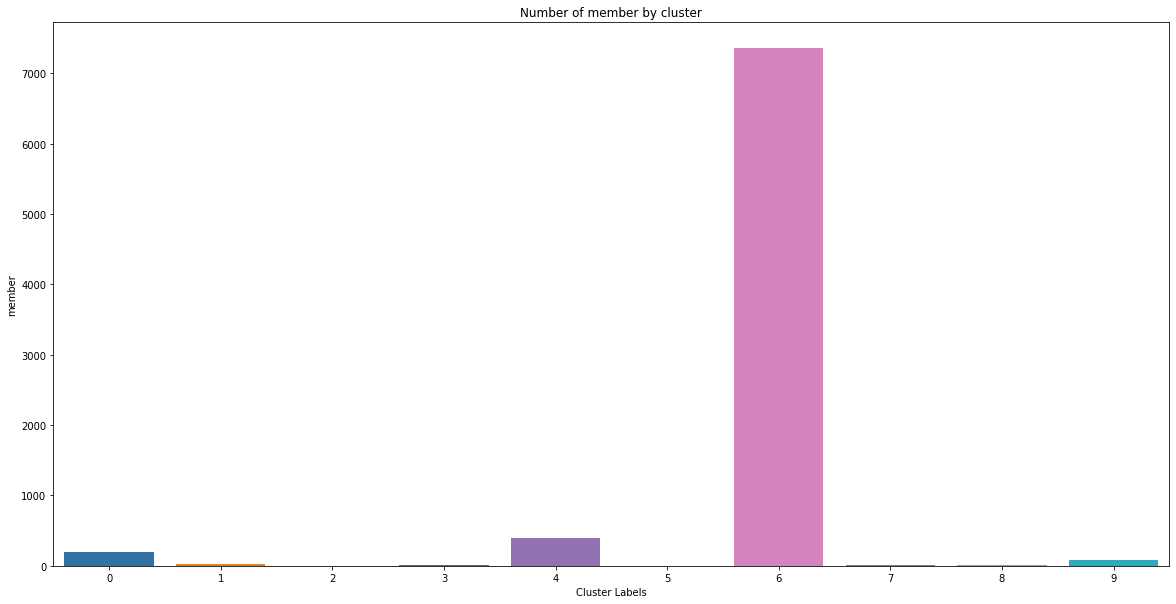

In [34]:
# cluster table
sns.barplot(x="Cluster Labels", y="member", data=newdf2.groupby('Cluster Labels')['memberid'].nunique().to_frame('member').reset_index())
plt.title('Number of member by cluster')
fig = plt.gcf()
fig.set_size_inches(20,10)
fig.show()
plt.show()

In [35]:
newdf2.groupby('Cluster Labels')['memberid'].nunique().to_frame('member').reset_index()

,Cluster Labels,member
0,0,190
1,1,21
2,2,3
3,3,17
4,4,400
5,5,1
6,6,7360
7,7,7
8,8,10
9,9,78


### Evaluation

In [39]:
#we will calculate the inertia of the clusters:
kmeans.inertia_

8305864.389460232

In [37]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newdf2=newdf
del newdf2['memberid']
data_scaled = scaler.fit_transform(newdf2)

Text(0, 0.5, 'Inertia')

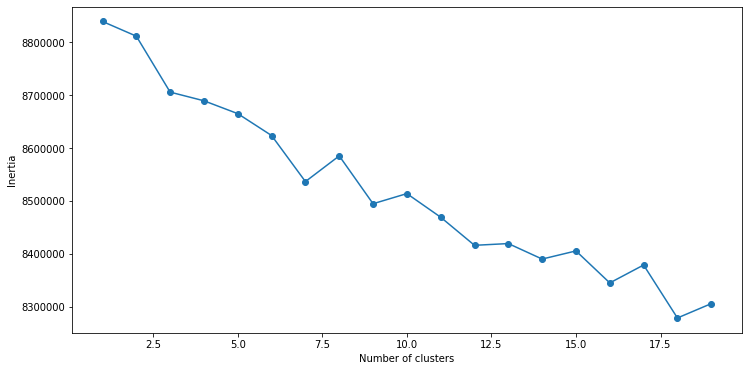

In [38]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#good clustering means having a small value of inertia, and small number of clusters.


#The value of inertia decreases as the number of clusters increase. So, its a trade-off. 

#Rule of thumb: The elbow point in the inertia graph is a good choice because after that the change in the value of inertia isn’t significant.